In [2]:
import os, shutil
train_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/train'
validation_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/validation'
test_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/test'

In [3]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [4]:
from tensorflow import keras
from keras import layers
from keras import models
from keras.preprocessing import image

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

In [6]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [9]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='C:/Users/flavi/Desktop/dl_project_2201707_2211044/ModelosS/ModelS_AdamOptimizer/ModelS_AdamOptimizer.keras',
    save_best_only=True,
    monitor='val_loss'
)

In [8]:
callbacks = [reduce_lr, early_stopping, model_checkpoint]

In [9]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.3771 - loss: 1.6871 - val_accuracy: 0.5870 - val_loss: 1.1636 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6357 - loss: 1.0291 - val_accuracy: 0.6745 - val_loss: 0.9201 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7149 - loss: 0.8169 - val_accuracy: 0.6953 - val_loss: 0.8998 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7659 - loss: 0.6706 - val_accuracy: 0.7026 - val_loss: 0.8813 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8131 - loss: 0.5327 - val_accuracy: 0.7172 - val_loss: 0.9066 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8528 - loss: 0.4181 - val_accuracy: 0.7193 - val_loss: 0.9650 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accura

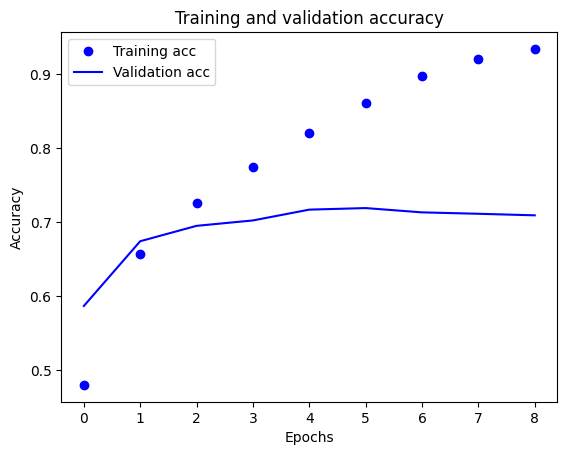

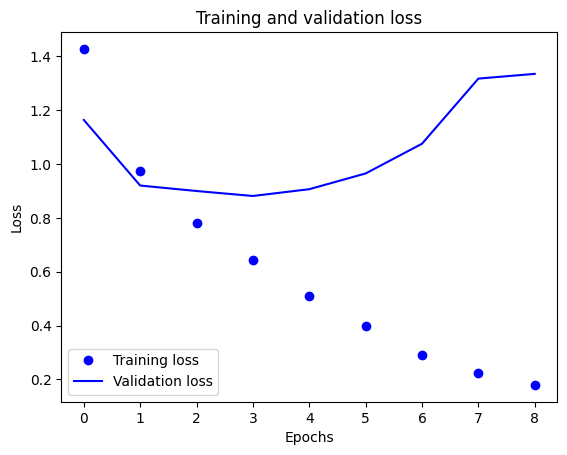

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
import tensorflow as tf

# Load the model from the .keras file
model = tf.keras.models.load_model('C:/Users/flavi/Desktop/dl_project_2201707_2211044/ModelosS/ModelS_AdamOptimizer/ModelS_AdamOptimizer.keras')

# Verify the model structure
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,442,400 (13.13 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,294,934 (8.75 MB)

In [12]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('Validation Accuracy:', val_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6988 - loss: 0.8941
Validation Accuracy: 0.7026000022888184


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Análise métrica:
              precision    recall  f1-score   support

           0       0.11      0.11      0.11      1000
           1       0.12      0.11      0.11      1000
           2       0.09      0.10      0.10      1000
           3       0.09      0.11      0.10      1000
           4       0.11      0.11      0.11      1000
           5       0.09      0.07      0.08      1000
           6       0.12      0.10      0.10      1000
           7       0.11      0.12      0.11      1000
           8       0.09      0.10      0.09      1000
           9       0.12      0.13      0.12      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



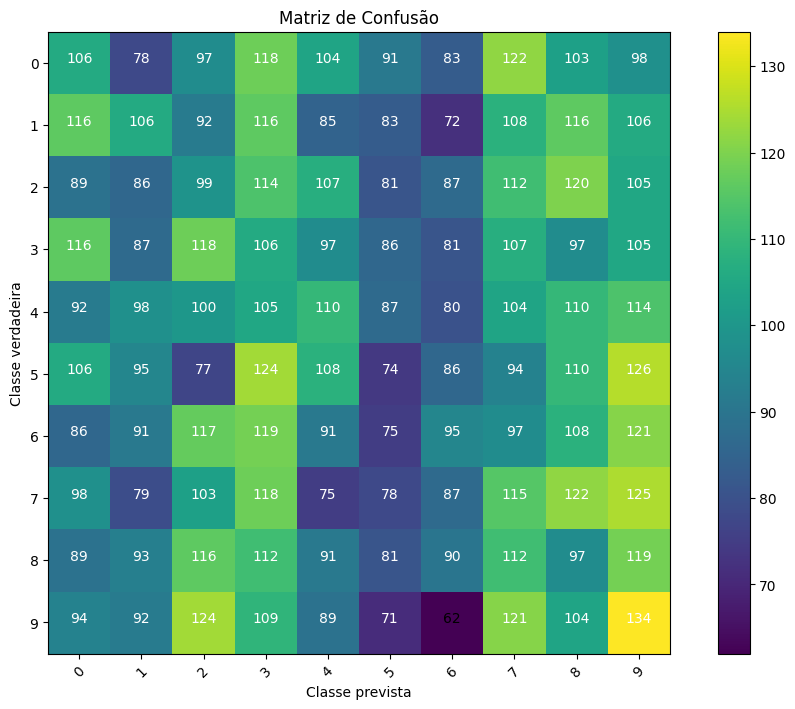

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obter as verdadeiras classes do conjunto de teste
y_true = np.concatenate([y for _, y in test_dataset], axis=0)


#Análise métrica accuracy, precision, recall e F1 score
print('Análise métrica:')
print(classification_report(y_true, y_pred_classes))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
plt.show()

Found 10000 files belonging to 10 classes.


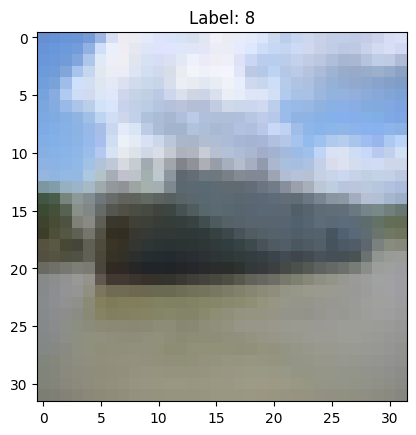

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


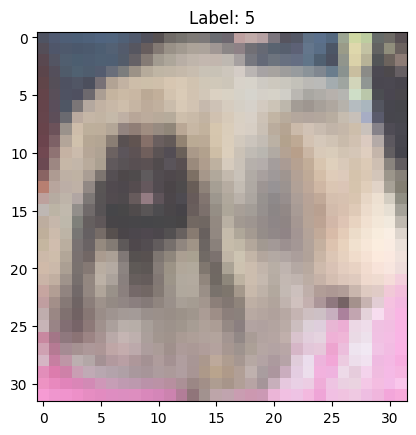

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


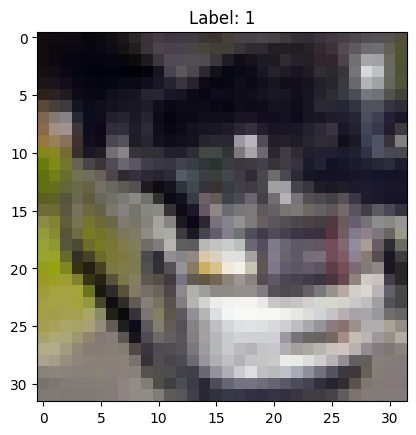

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


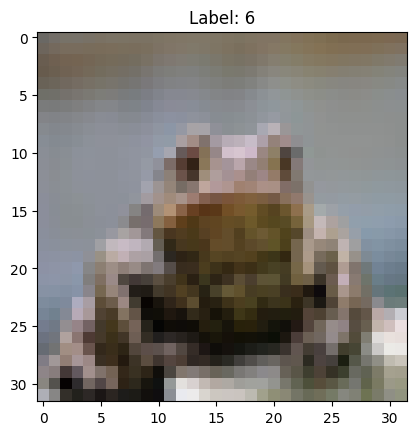

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


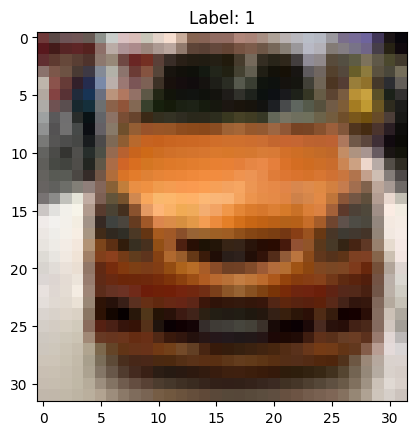

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


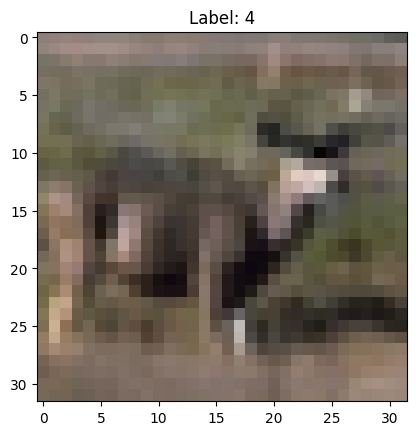

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


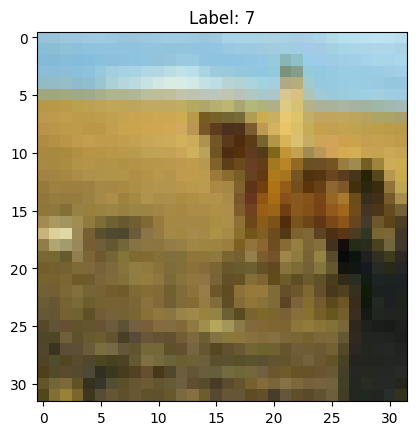

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


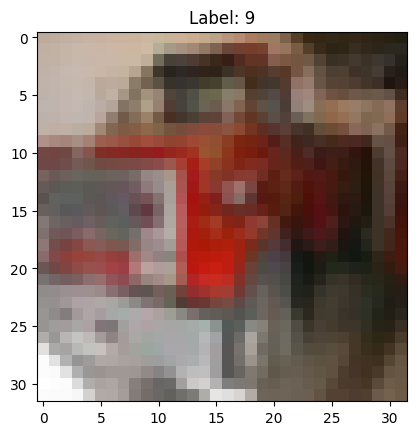

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


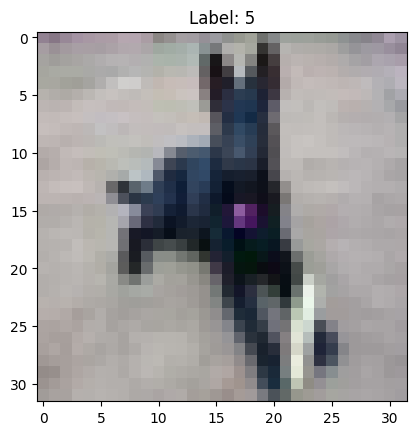

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


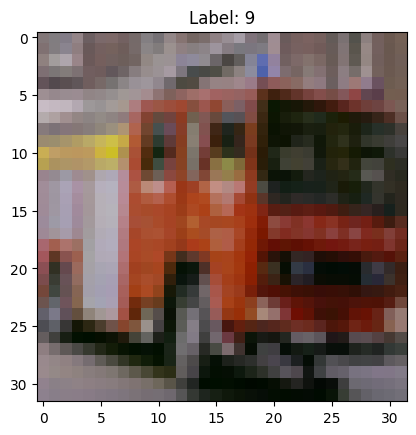

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


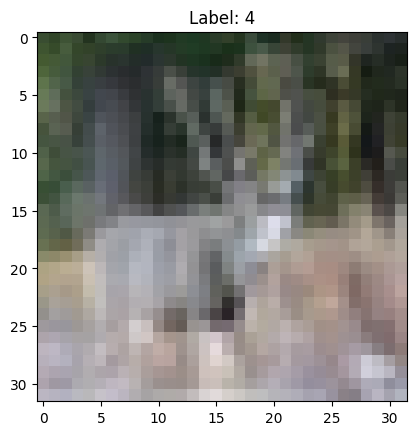

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


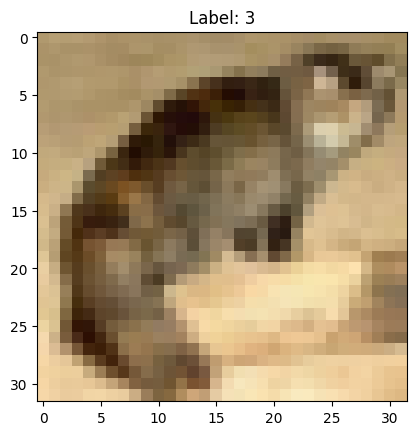

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


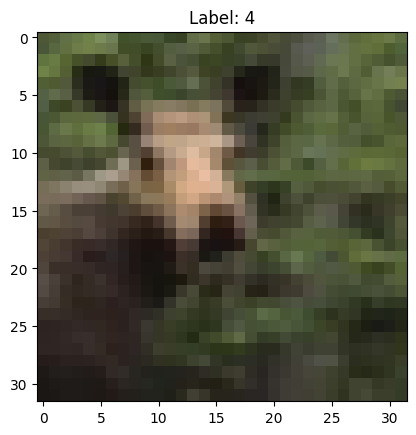

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


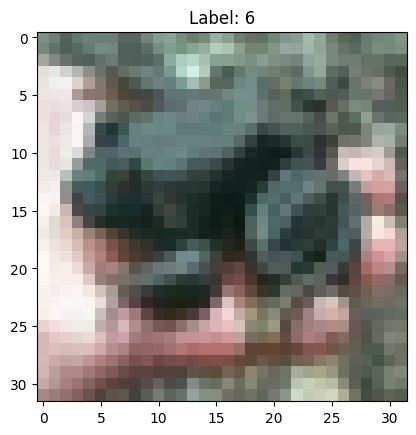

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


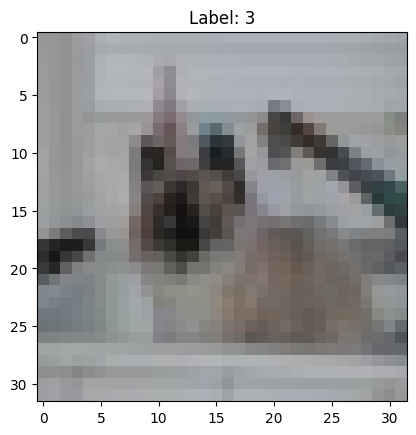

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


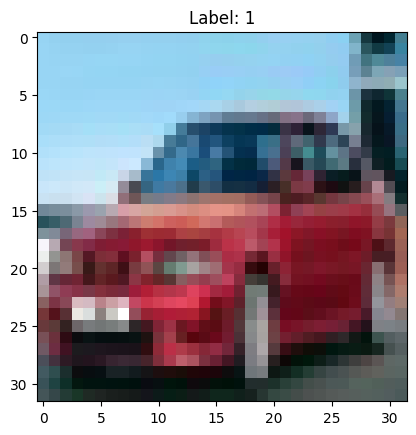

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


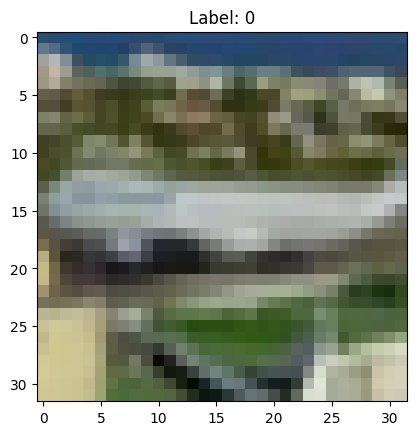

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


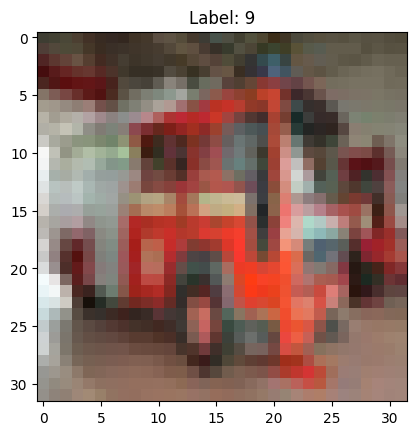

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


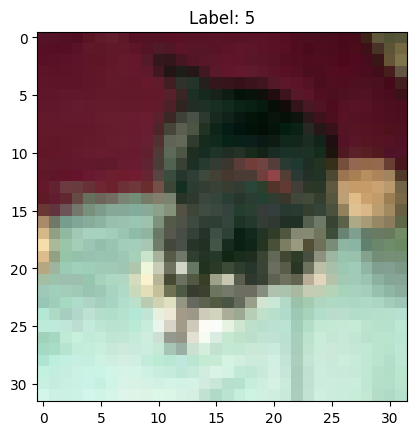

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


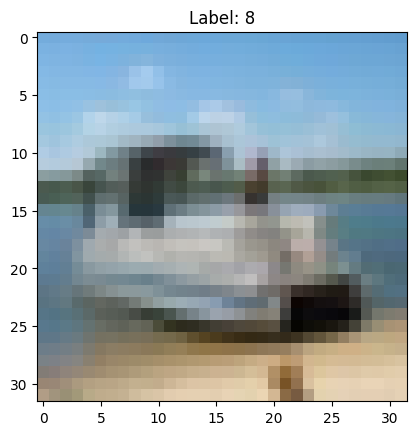

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


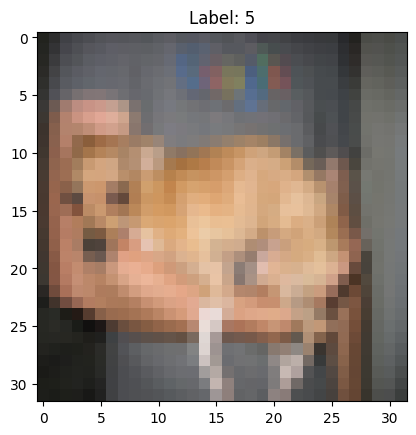

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


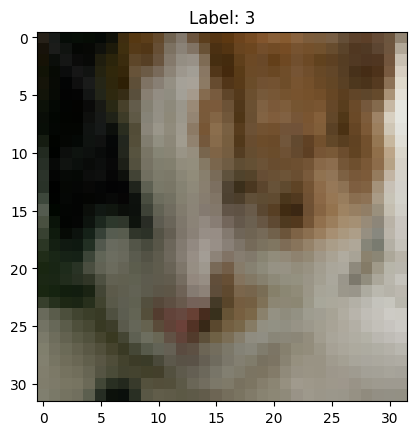

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


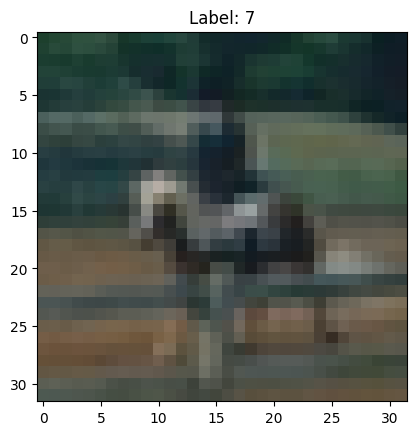

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


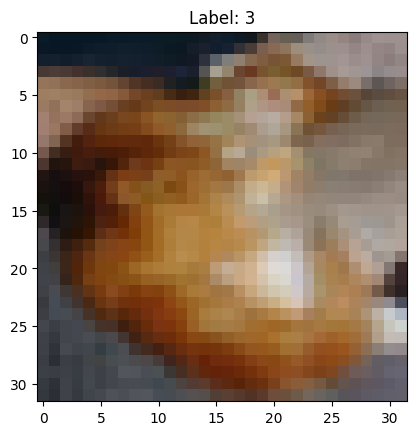

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


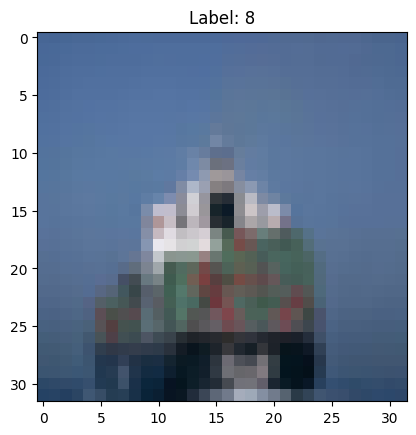

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


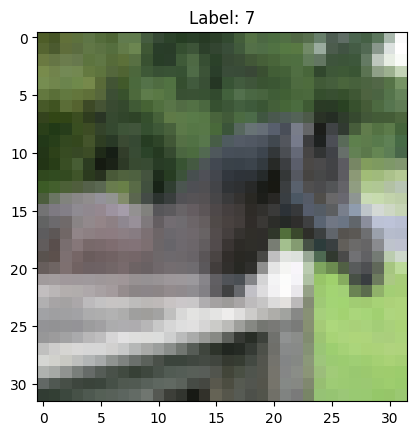

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


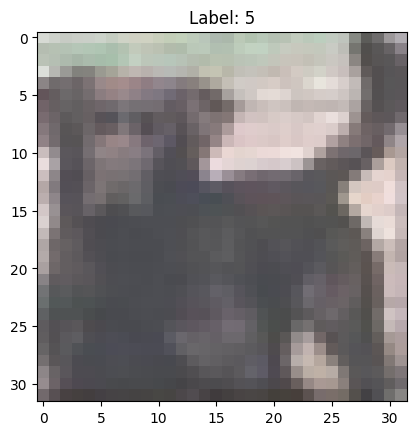

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


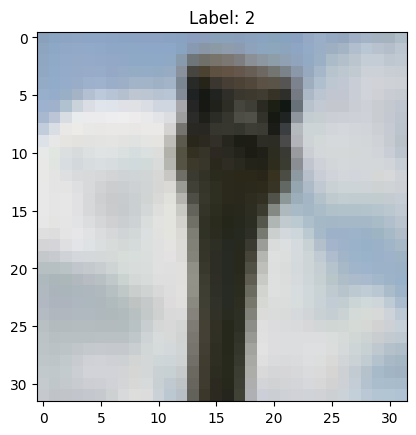

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


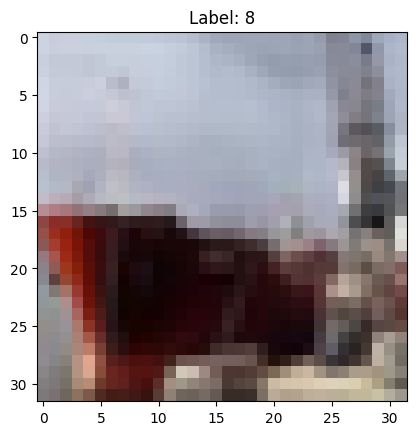

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


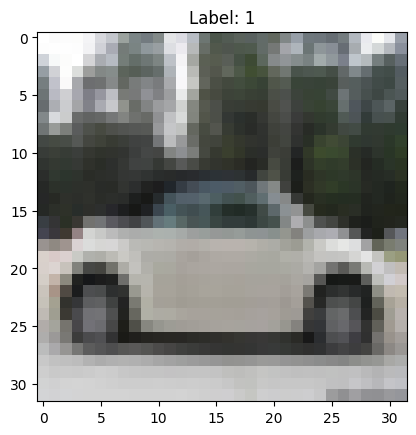

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


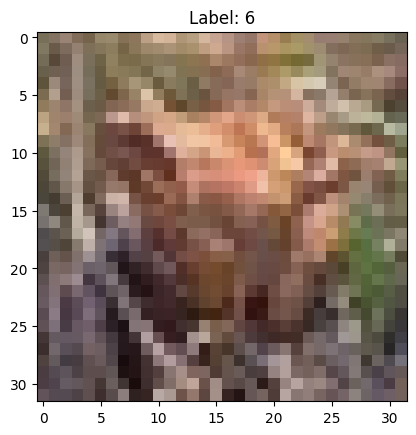

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


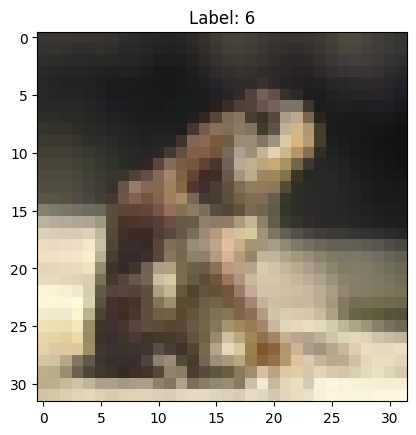

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


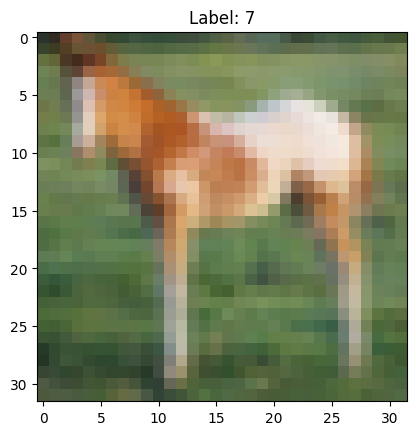

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


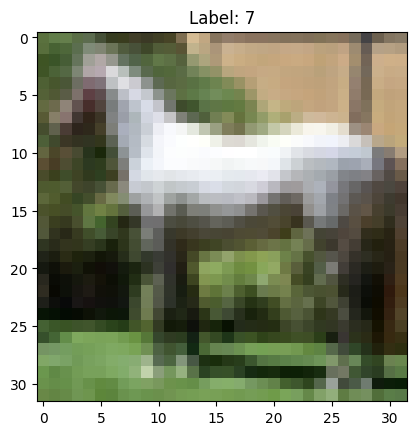

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


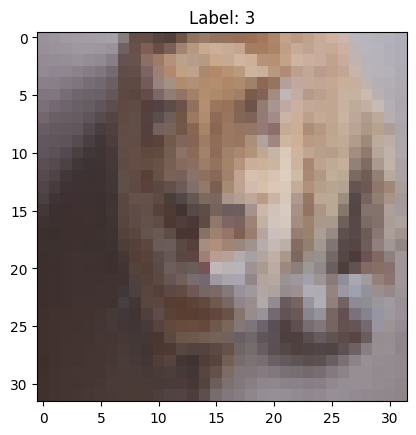

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


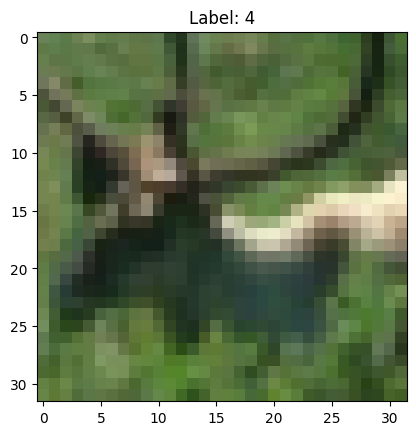

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


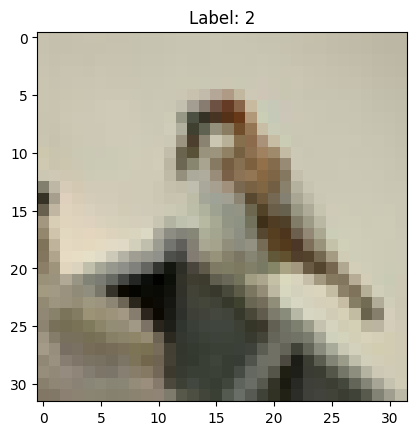

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


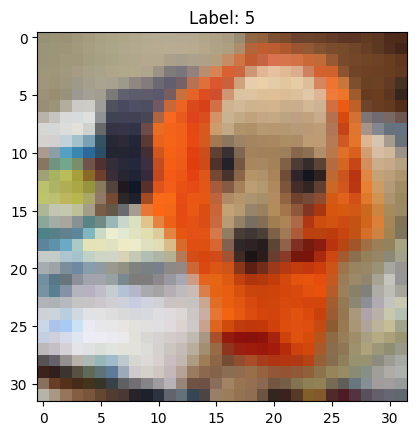

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


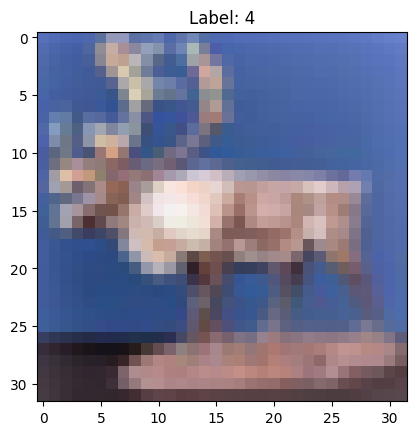

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


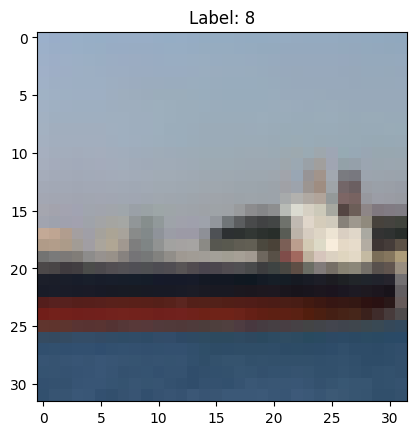

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


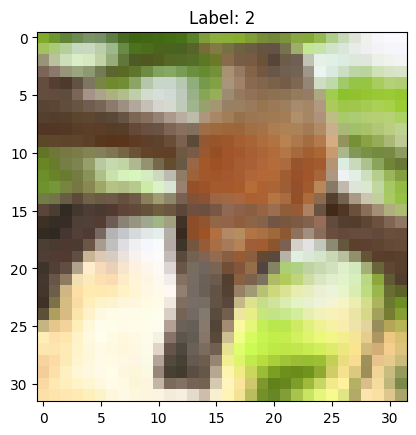

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


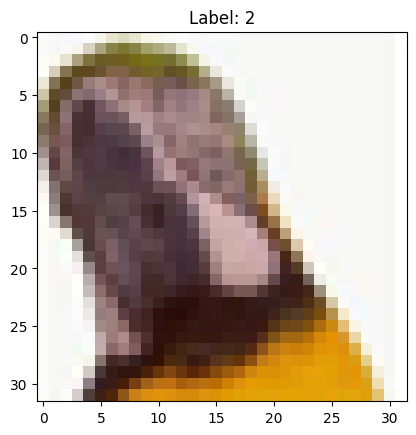

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


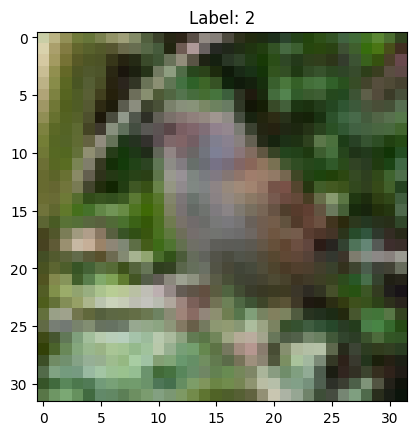

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


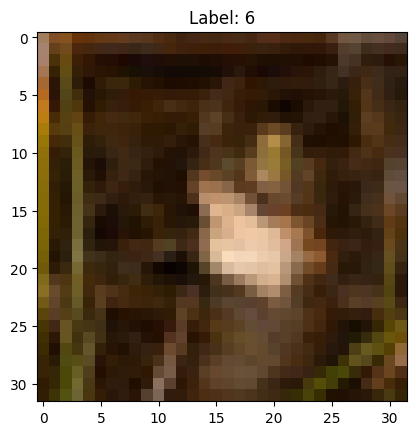

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


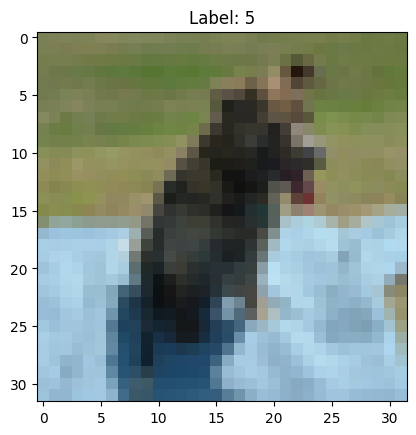

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


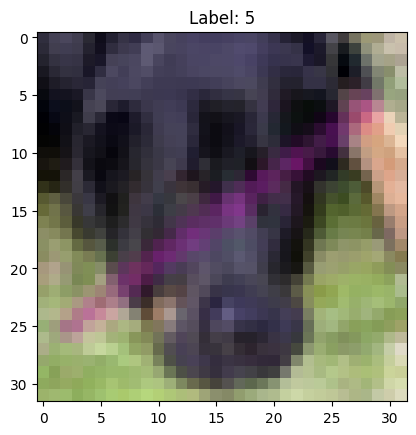

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


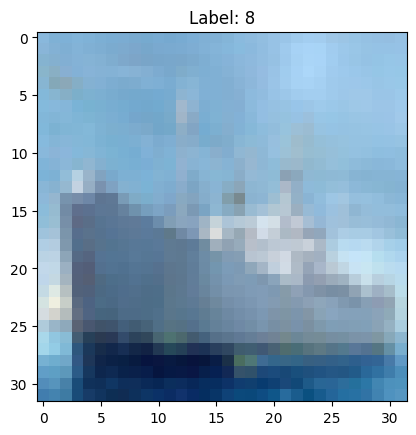

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


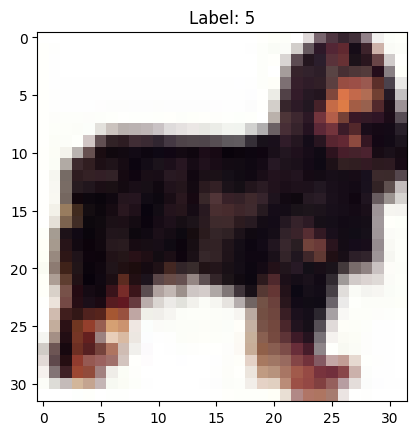

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


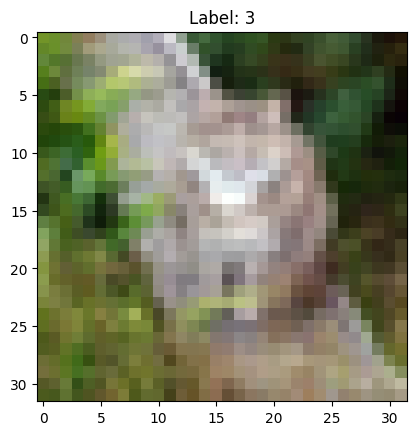

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


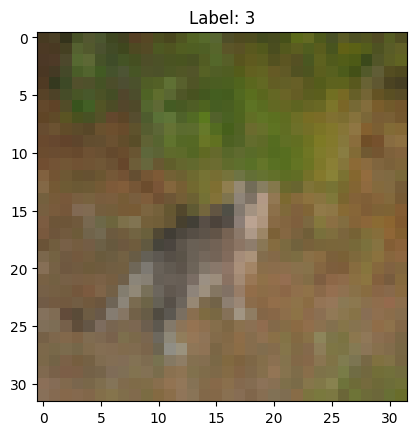

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


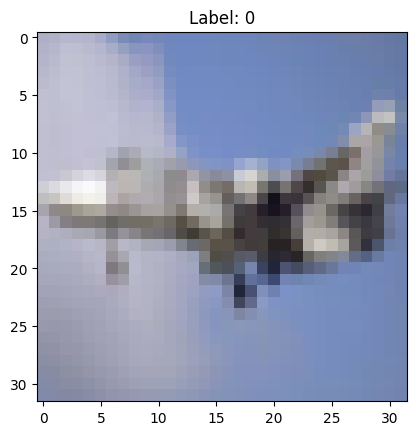

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


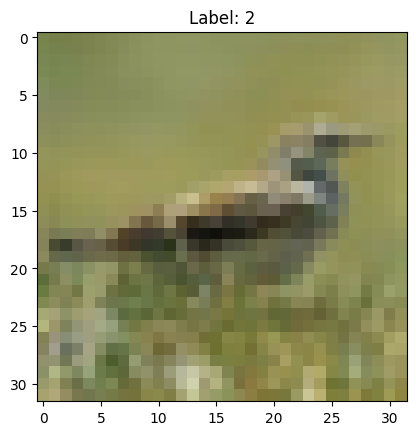

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


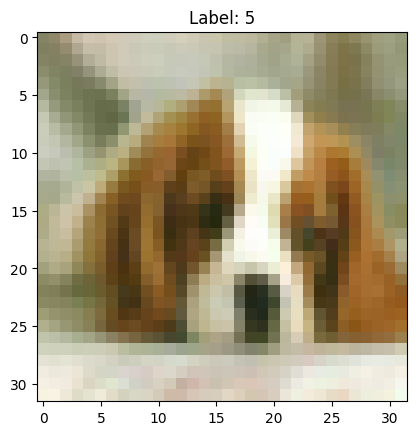

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


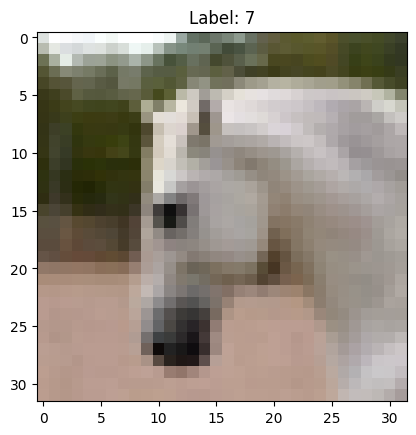

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


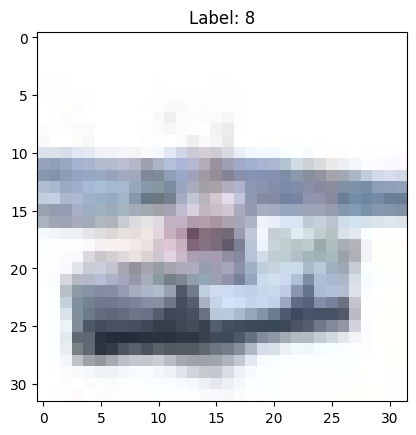

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


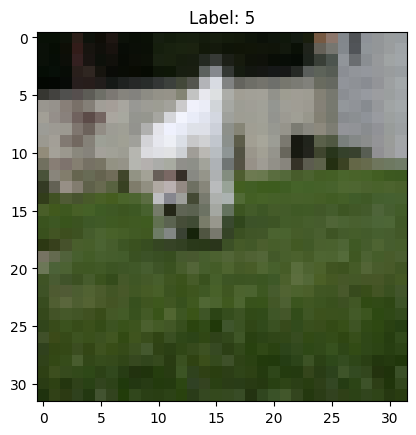

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


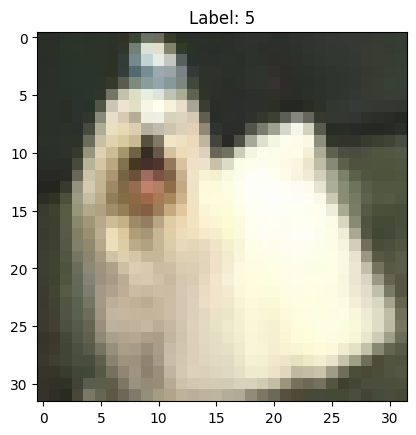

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


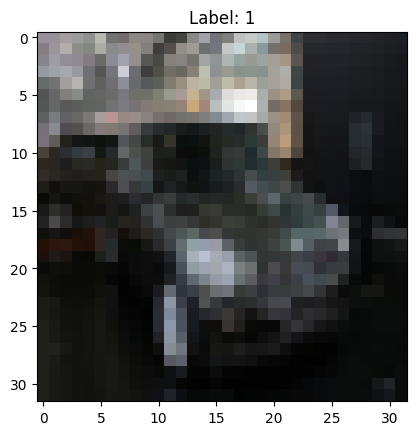

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


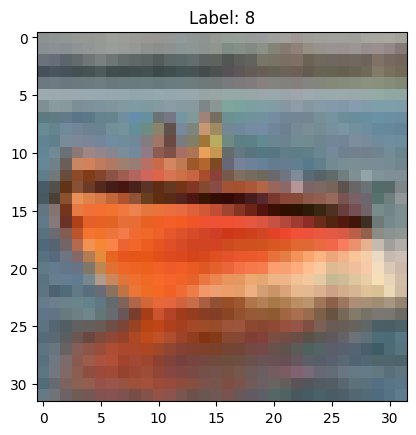

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


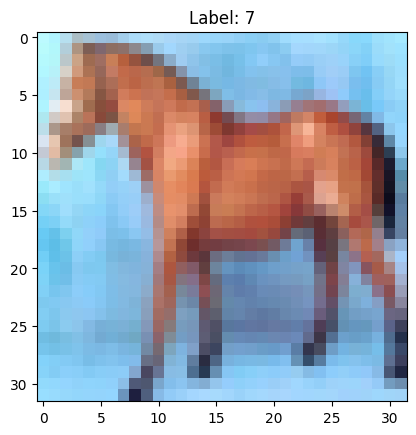

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


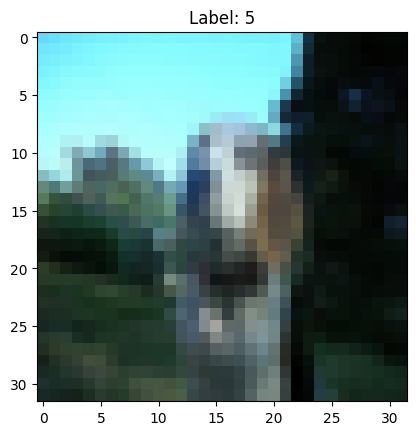

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


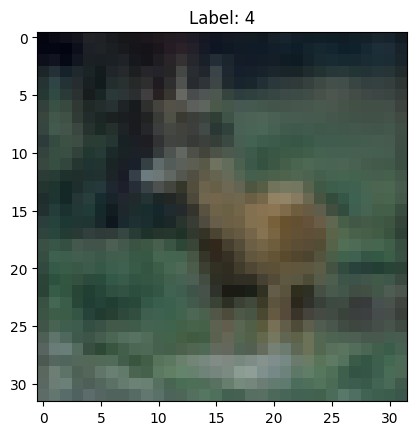

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


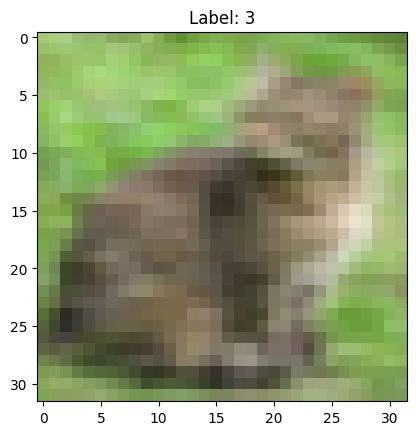

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


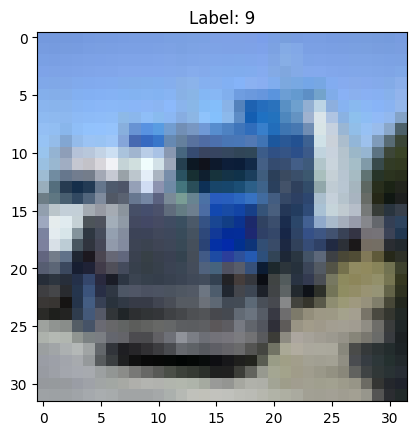

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


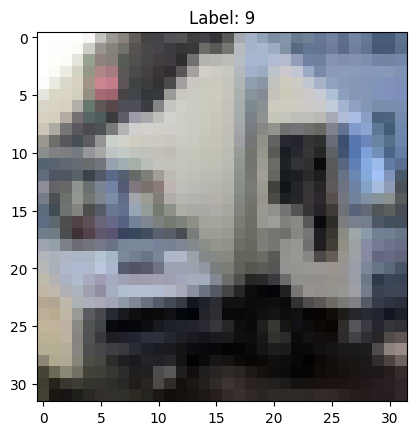

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


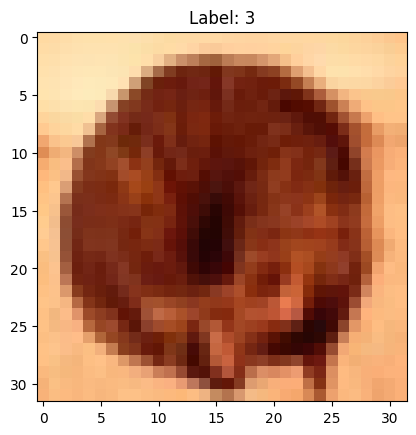

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


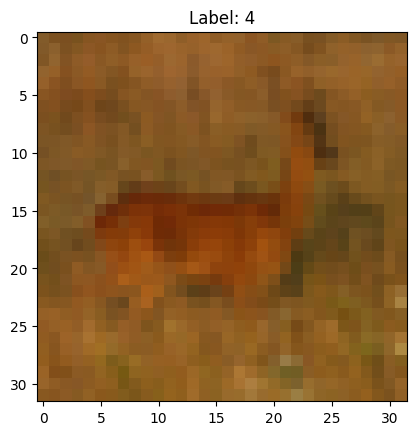

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


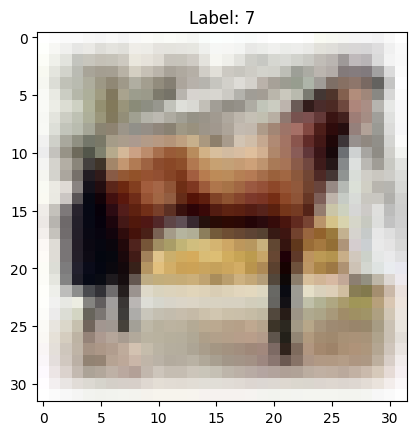

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


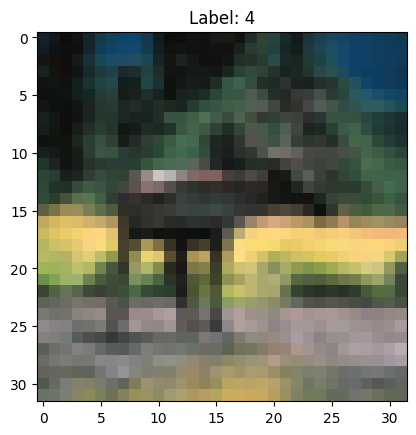

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


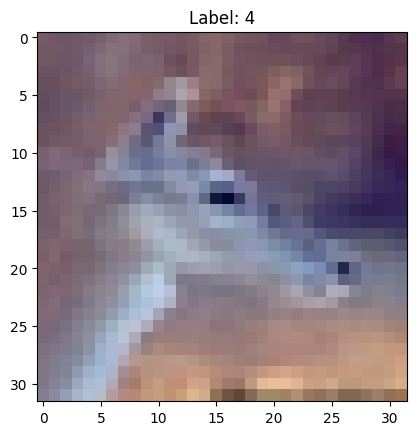

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


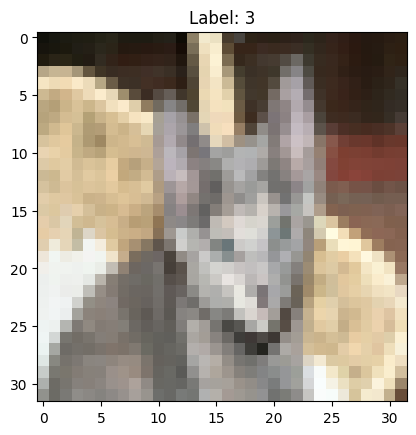

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


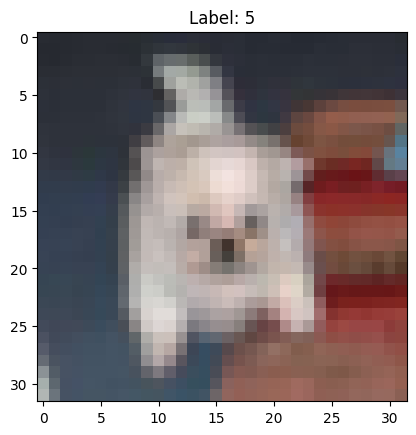

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


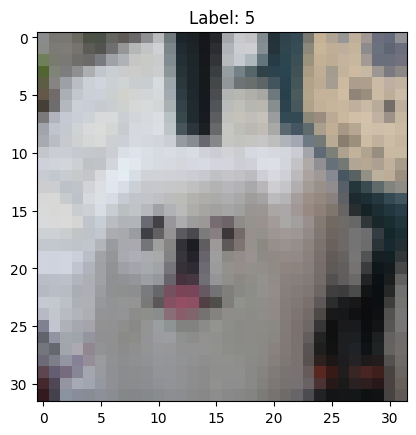

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


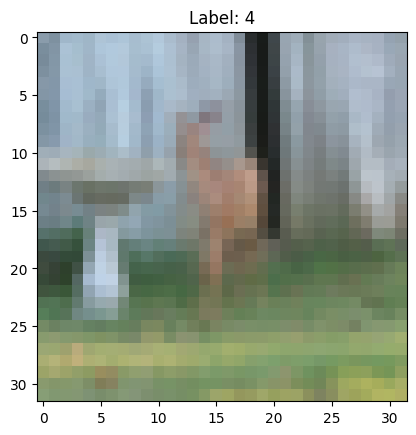

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


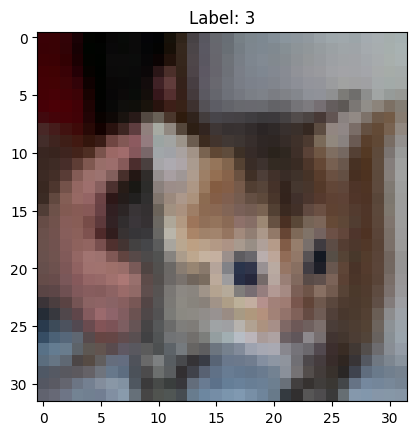

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


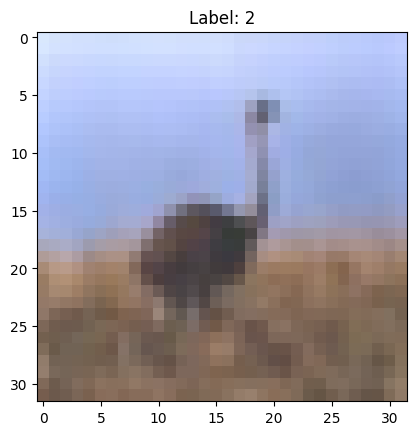

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


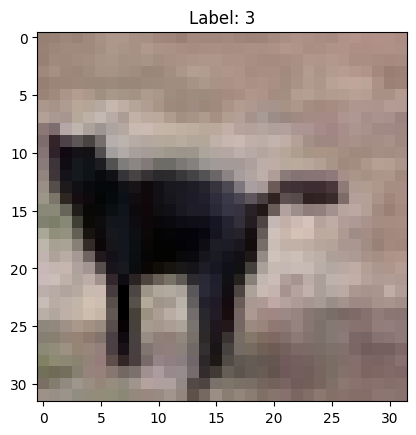

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


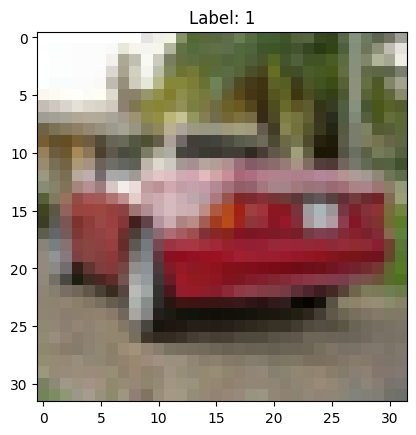

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


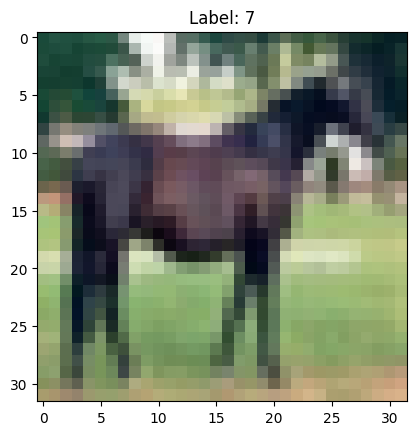

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


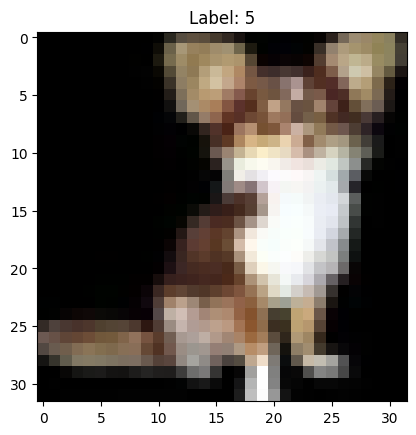

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


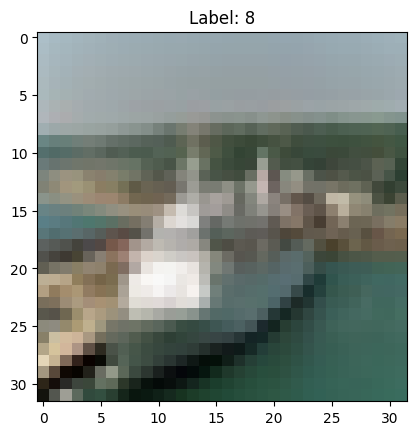

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


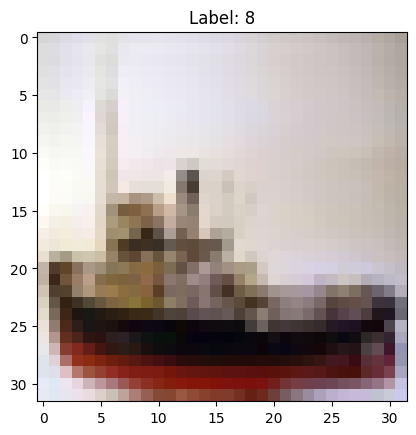

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


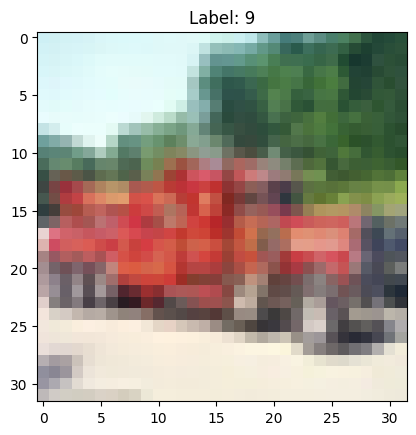

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


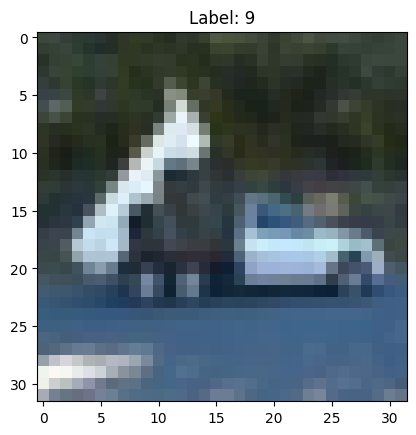

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


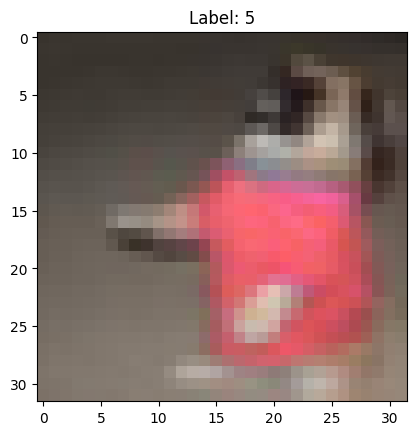

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


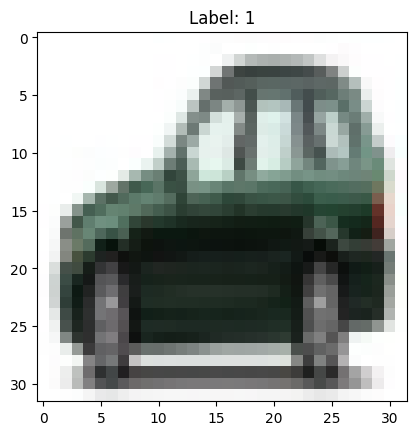

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


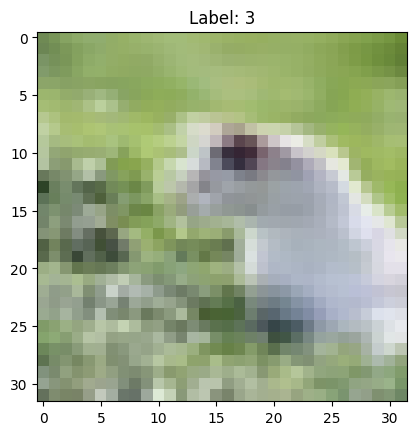

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


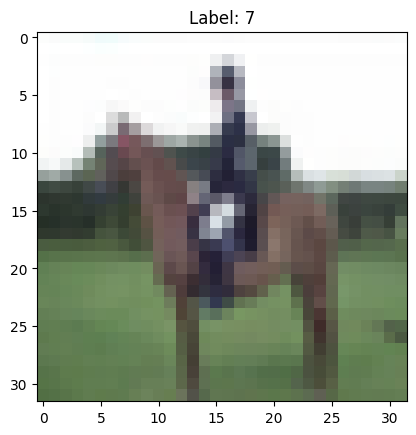

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


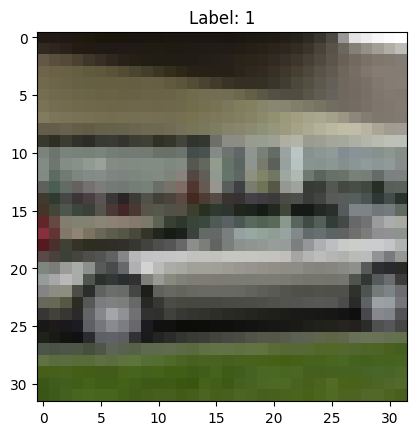

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


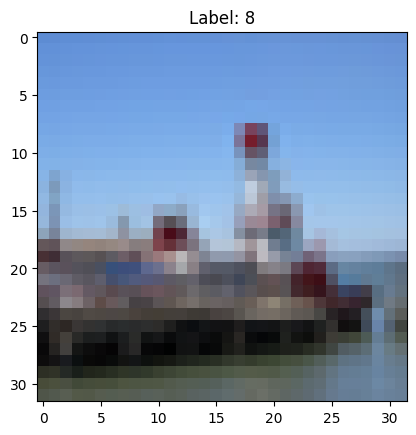

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


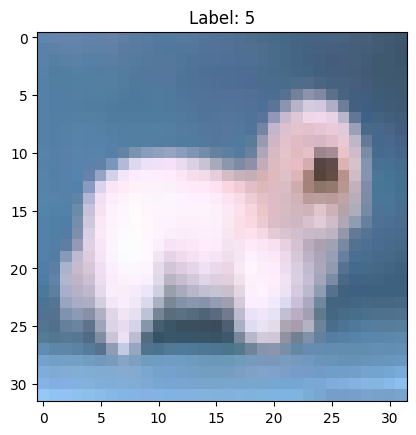

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


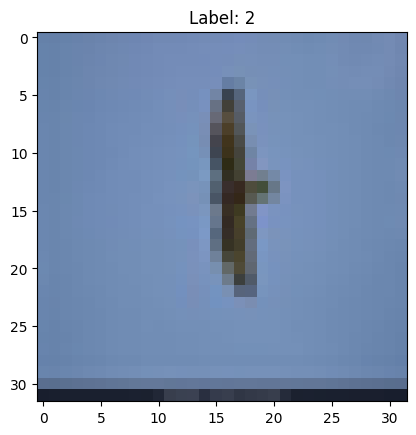

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


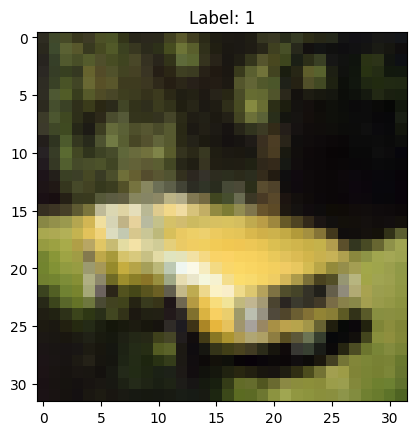

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


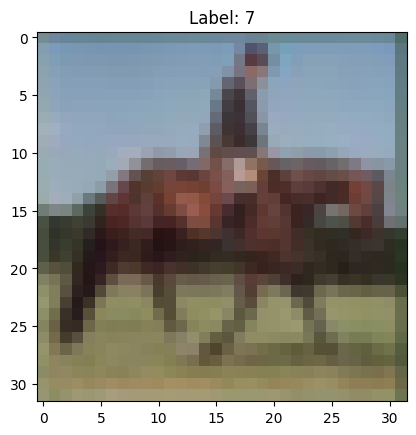

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


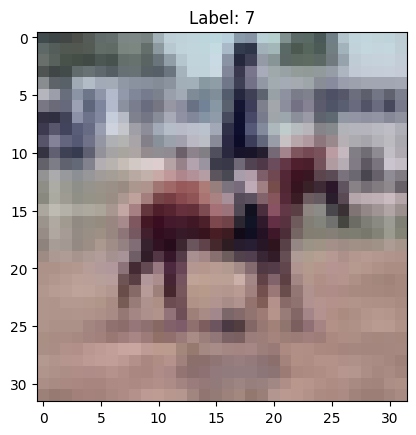

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


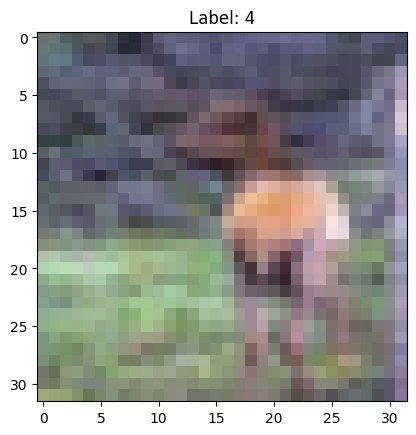

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


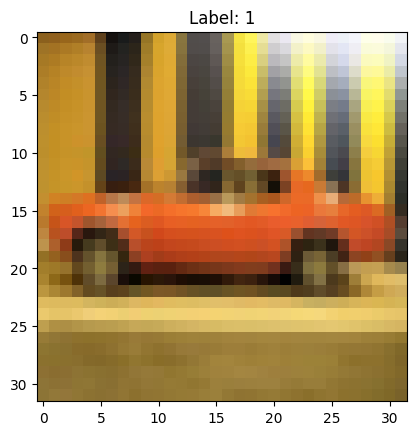

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


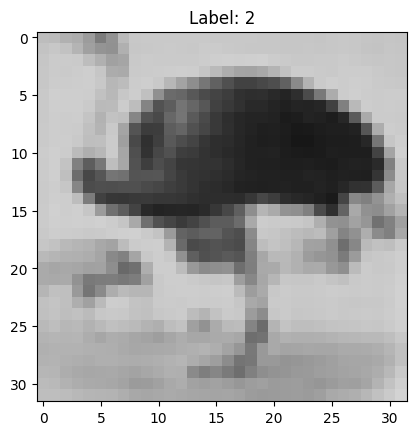

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


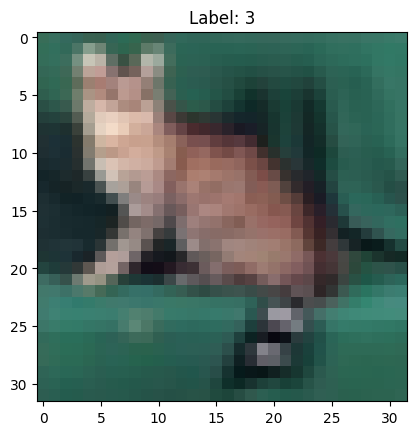

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


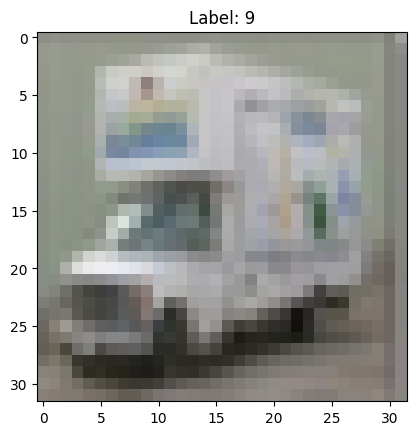

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


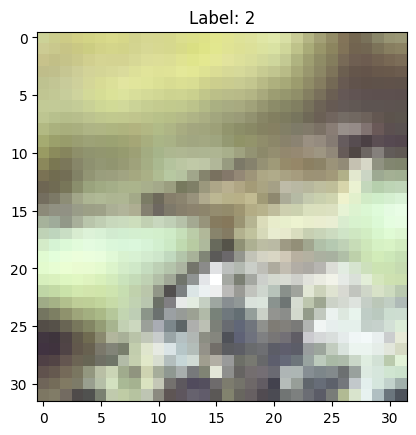

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


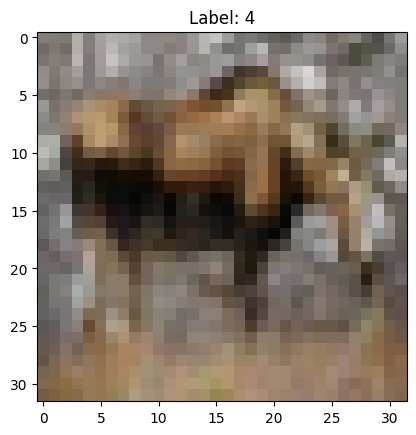

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


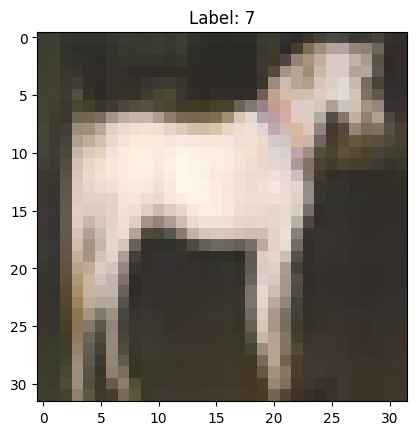

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


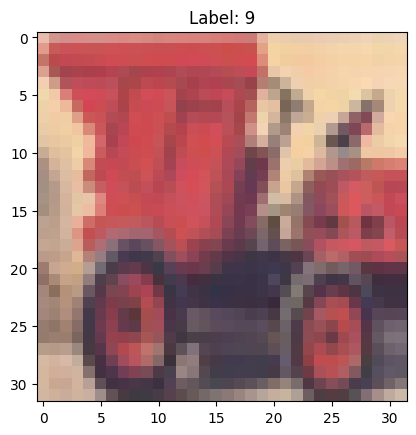

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


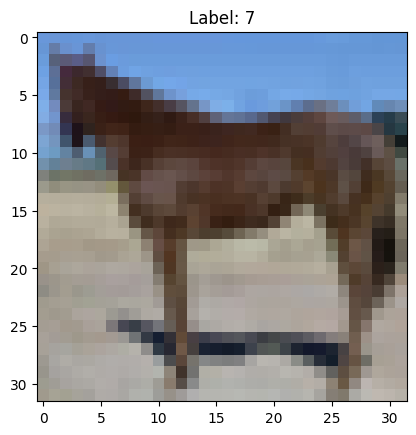

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


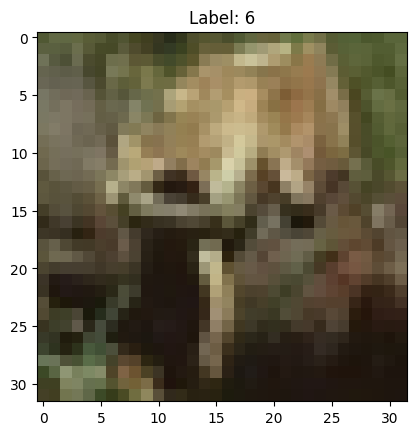

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


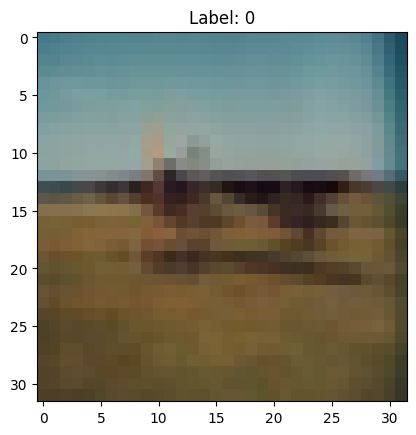

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


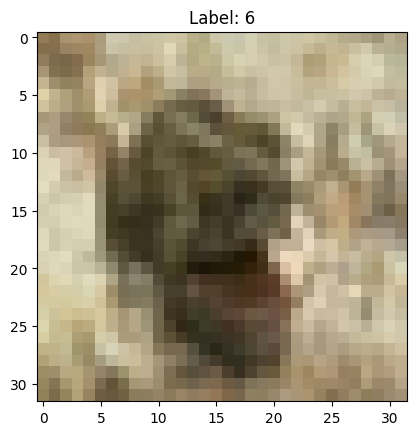

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


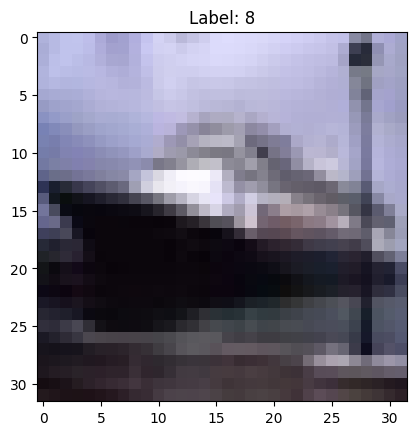

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


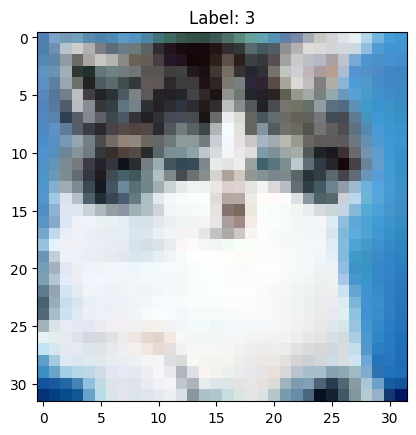

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


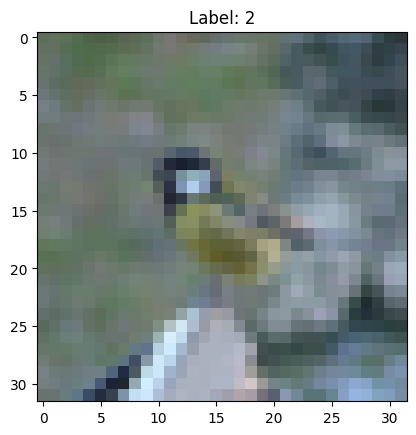

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


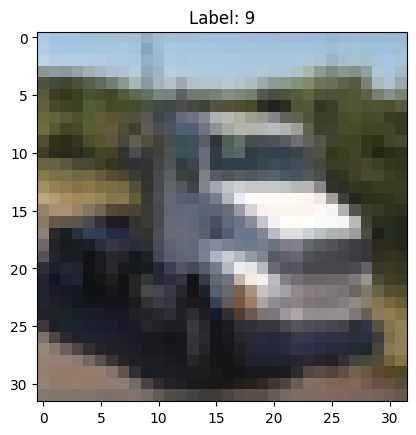

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


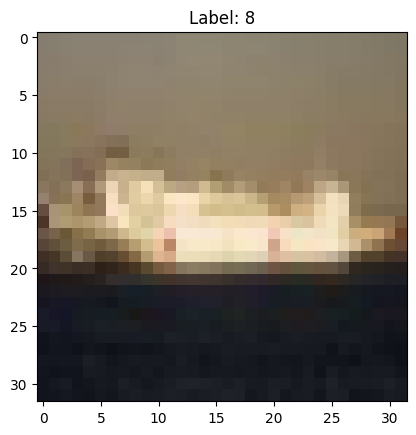

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


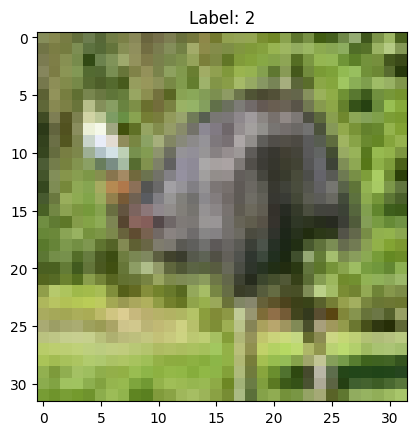

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


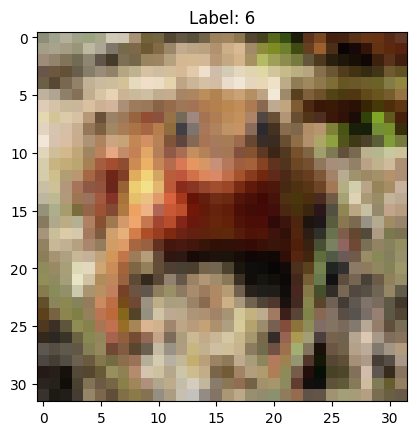

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


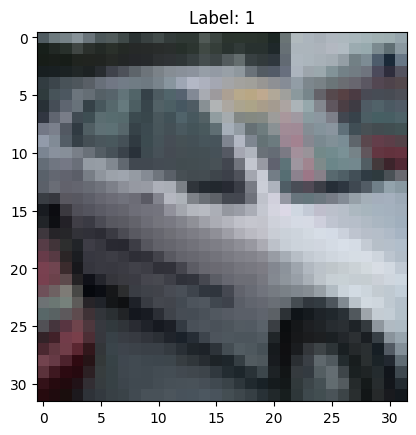

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


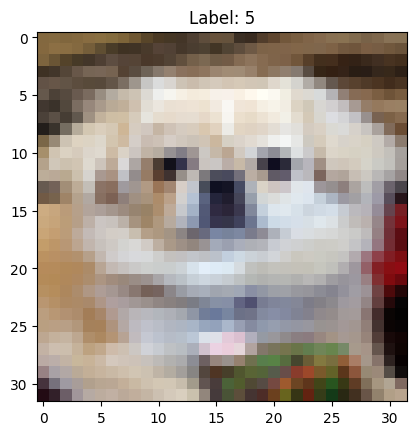

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


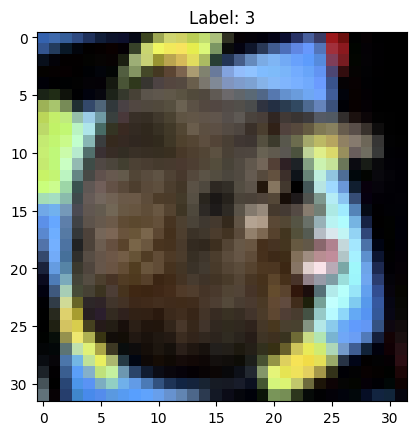

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


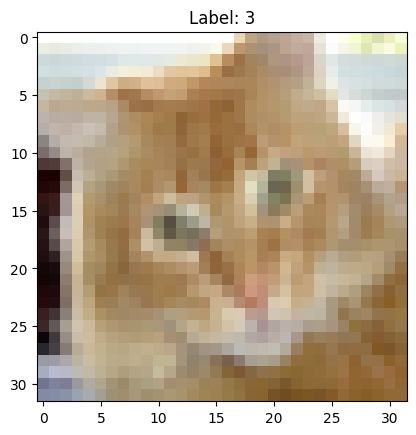

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


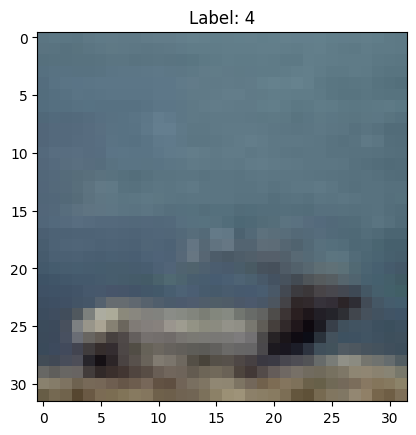

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


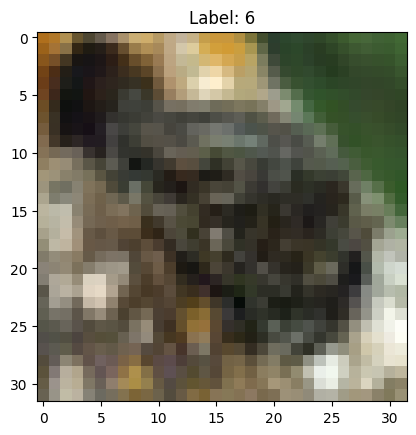

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


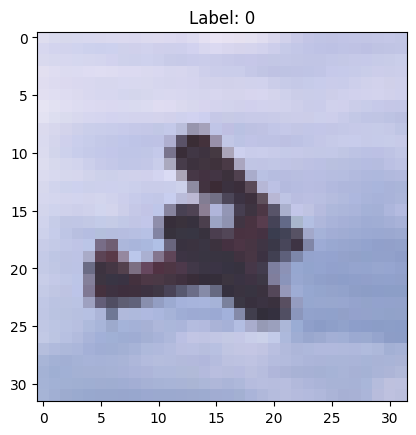

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


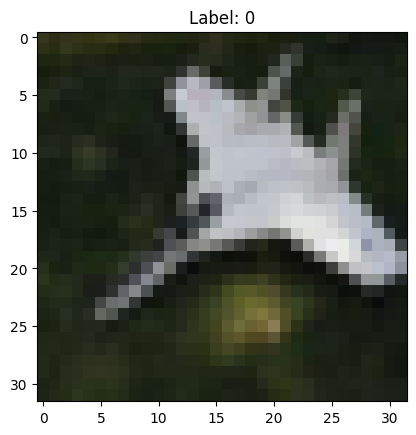

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


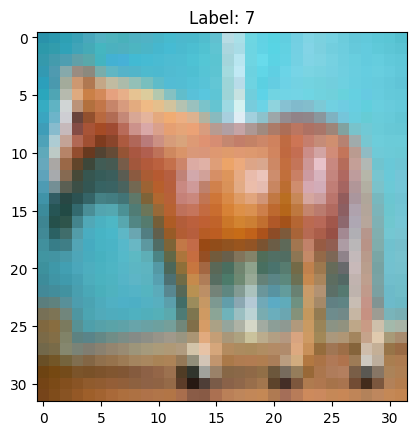

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


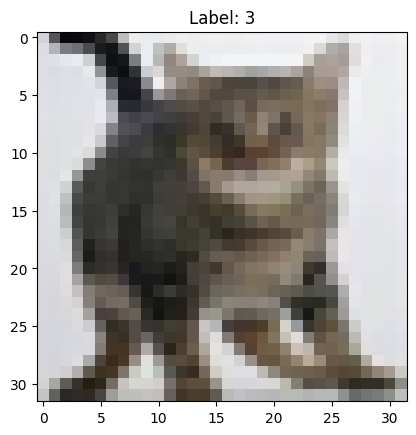

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


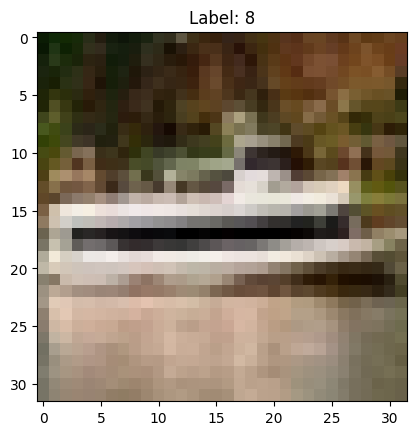

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


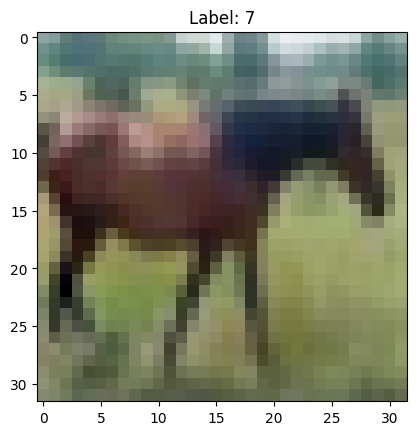

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


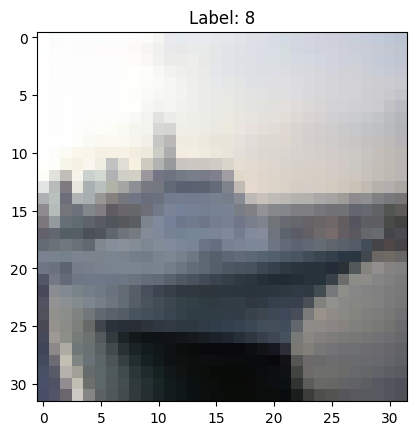

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


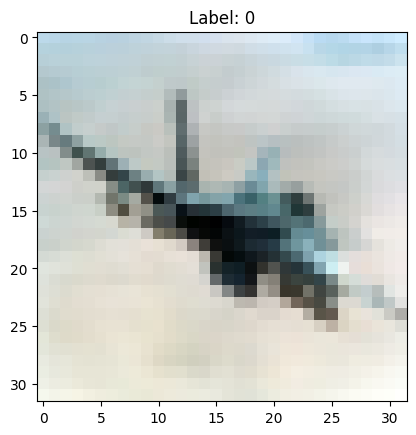

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


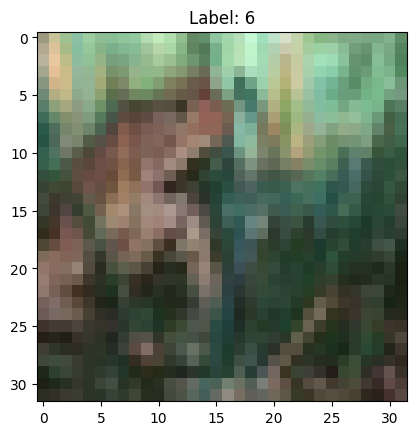

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


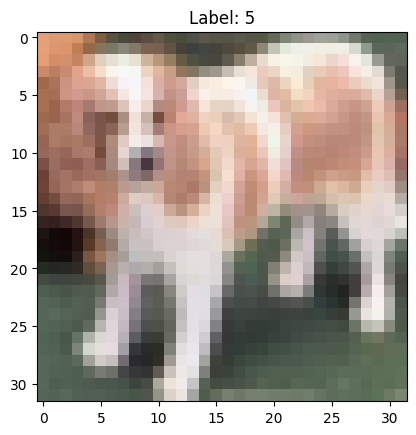

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


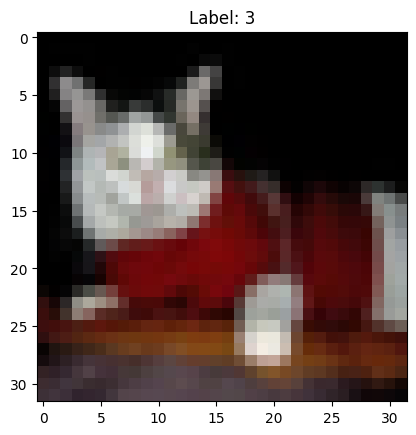

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


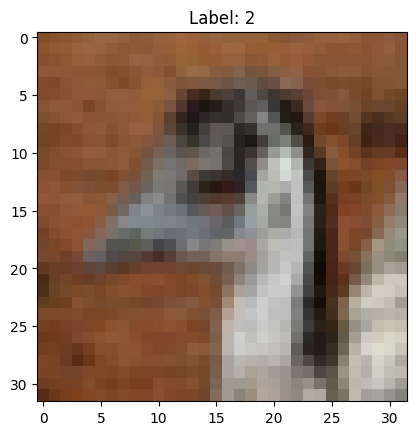

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


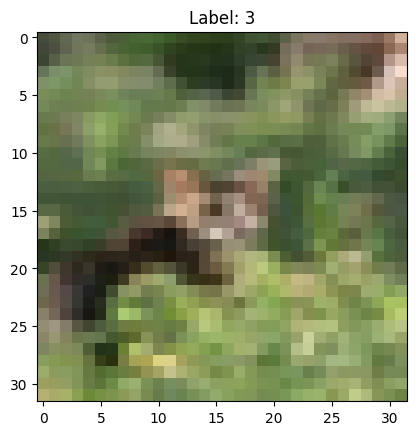

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


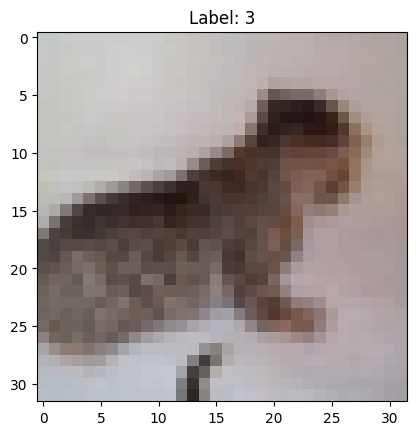

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


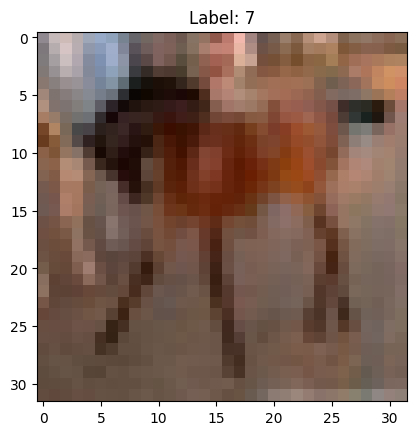

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


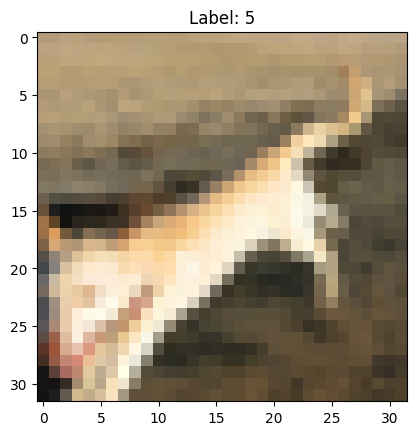

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


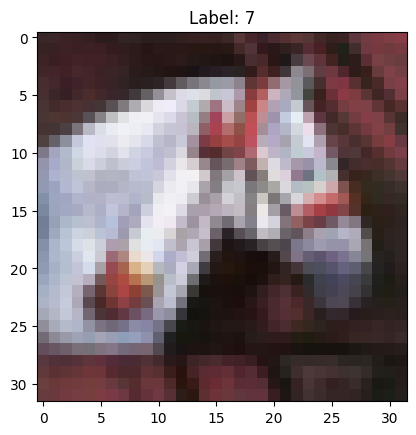

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


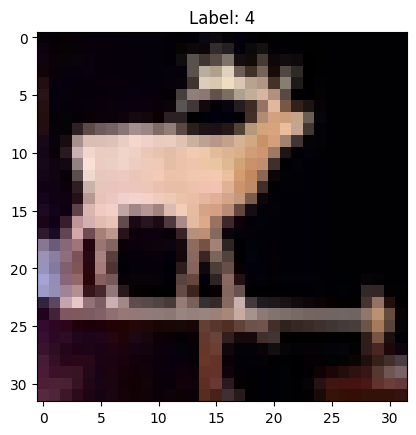

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


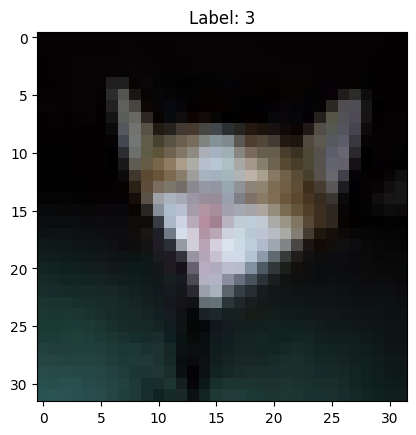

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


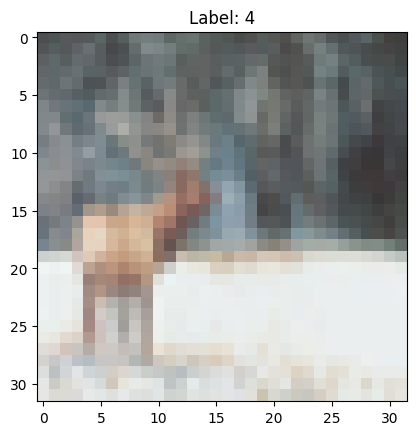

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


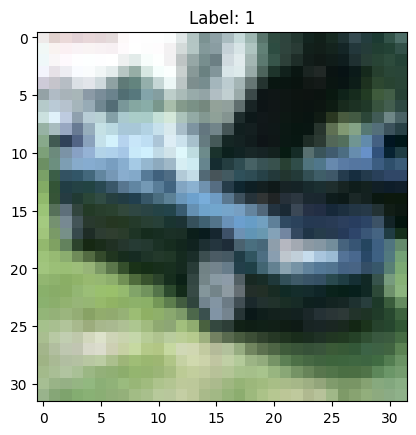

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


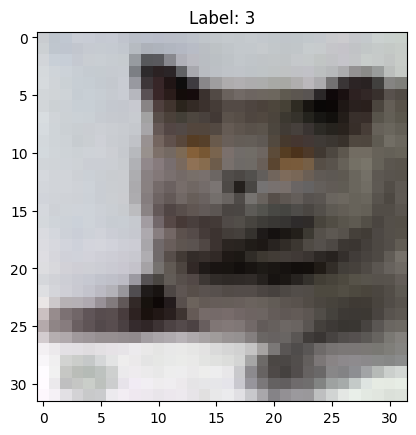

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


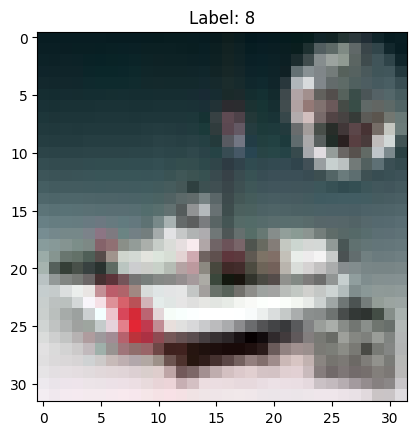

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


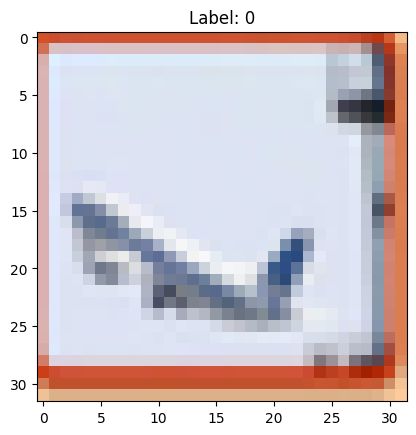

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


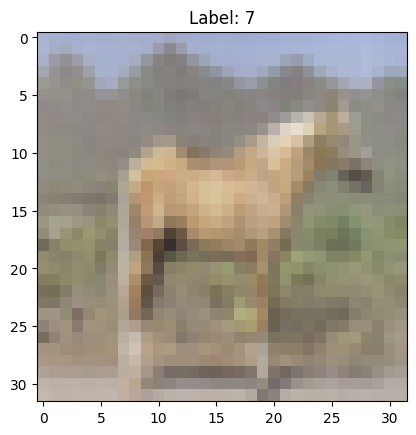

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


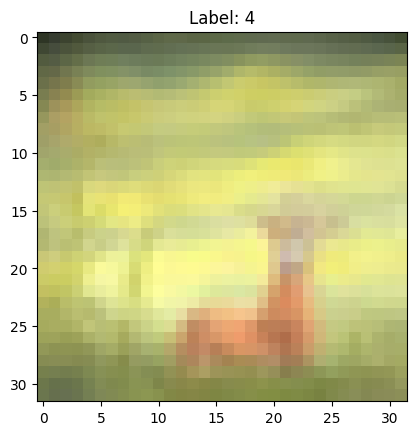

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


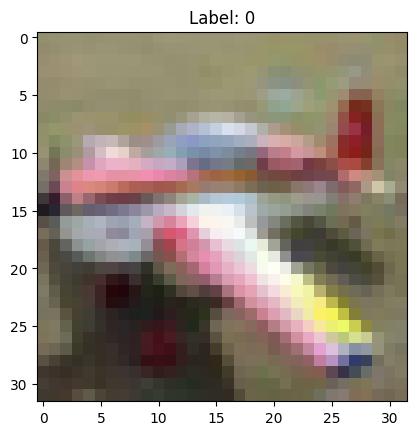

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


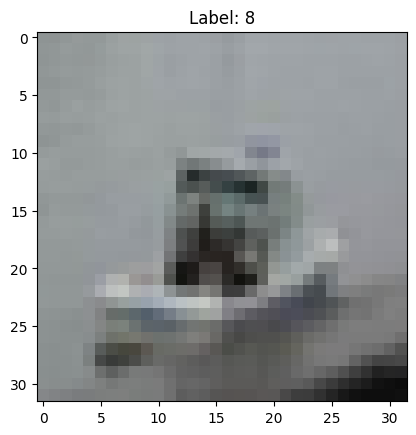

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


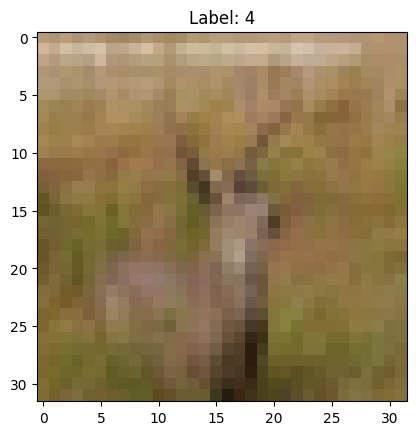

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


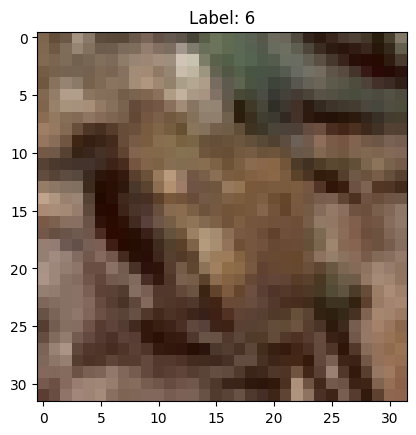

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


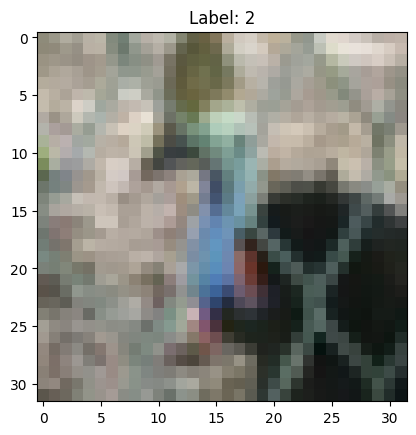

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


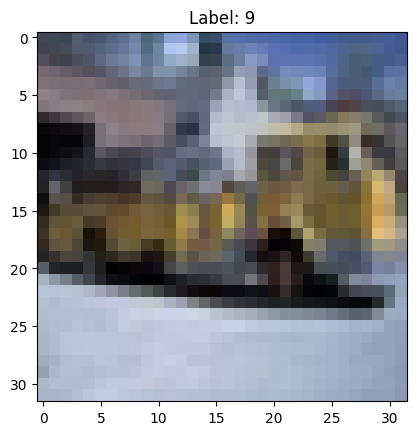

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


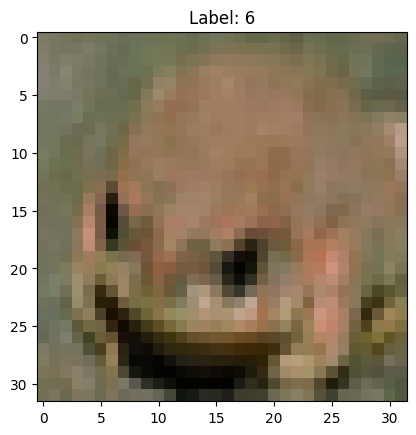

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


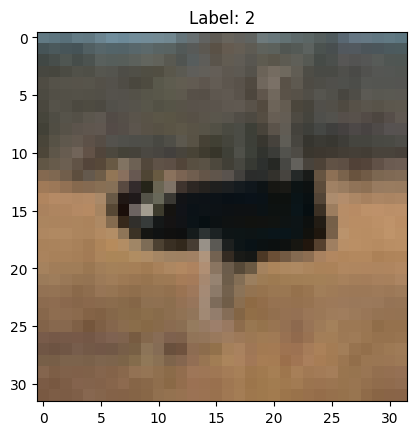

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


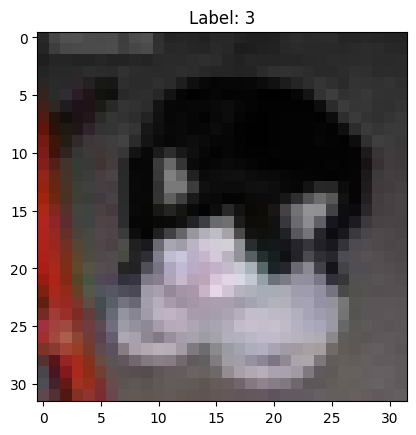

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


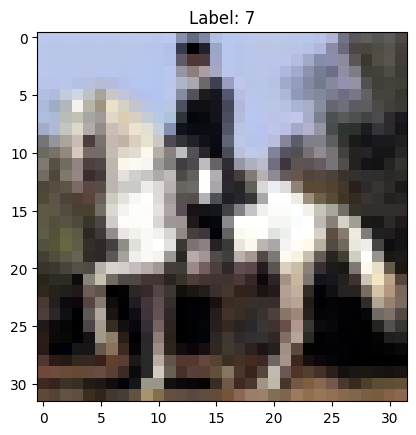

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


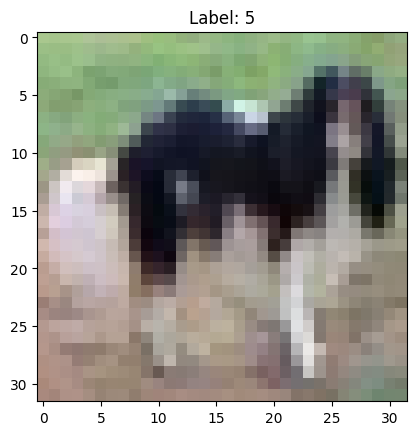

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


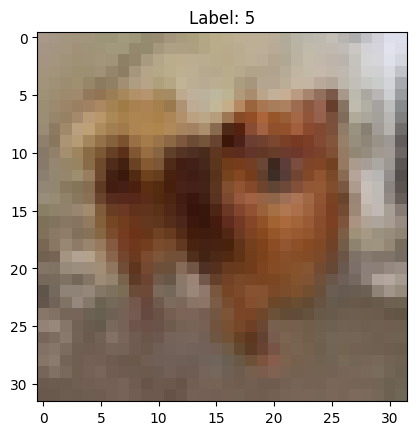

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


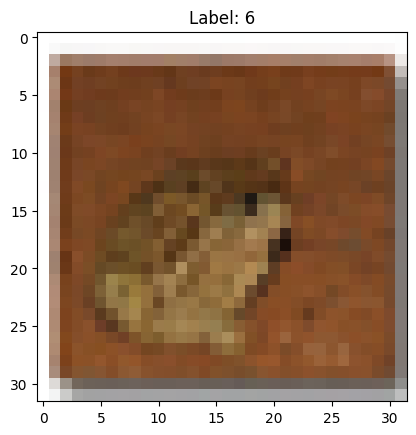

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


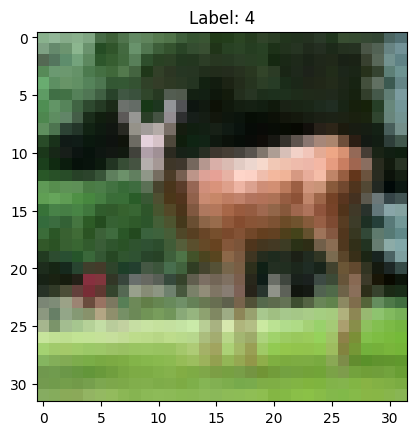

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


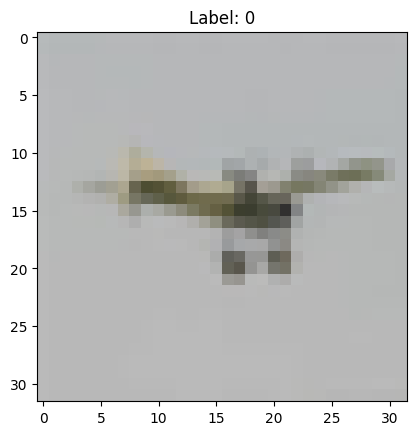

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


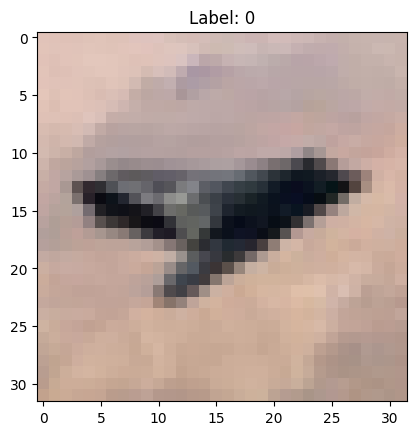

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


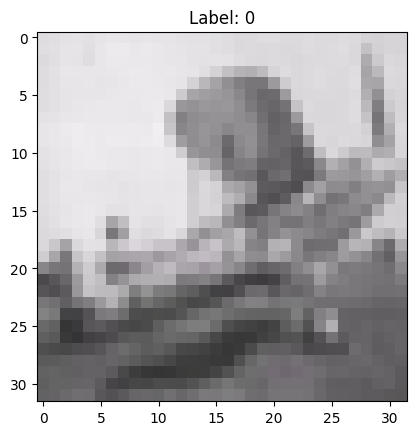

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


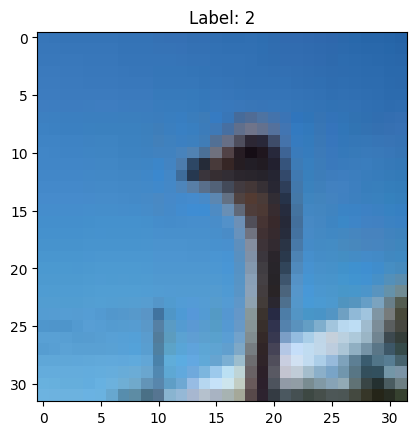

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


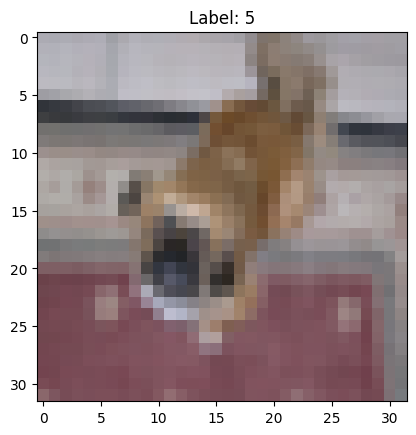

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


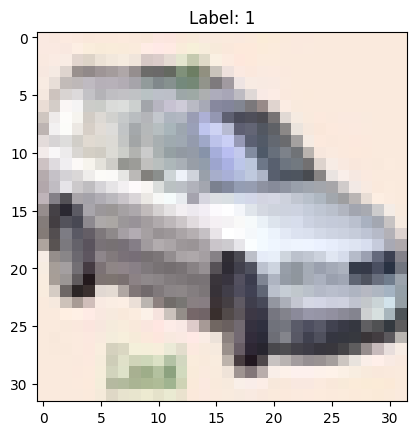

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


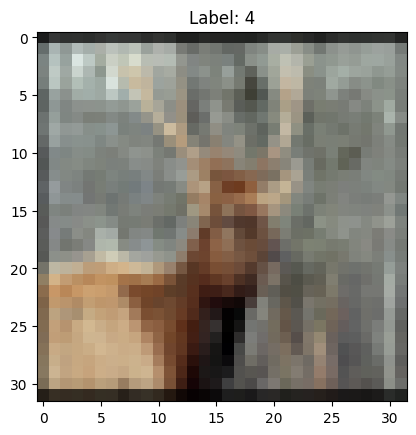

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


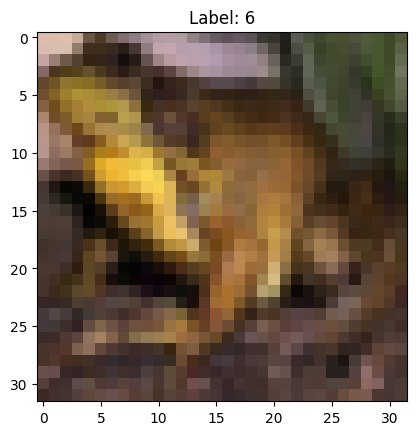

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


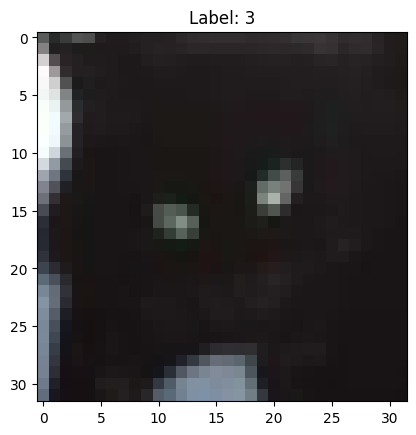

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


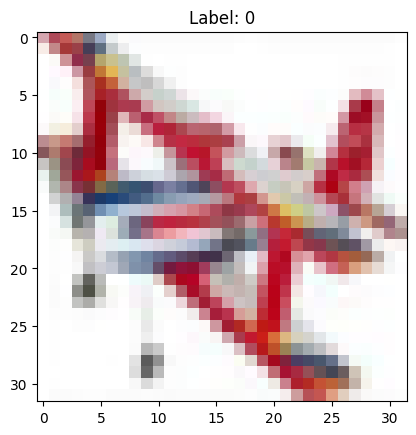

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


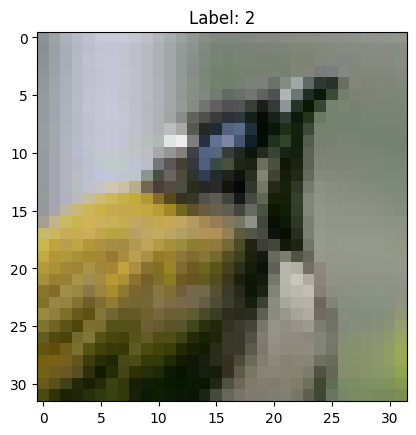

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


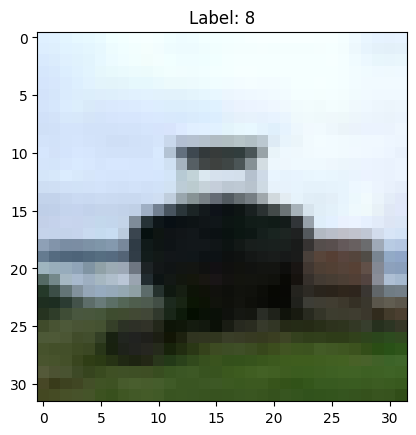

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


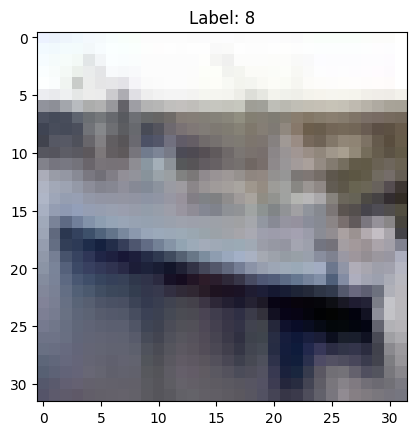

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


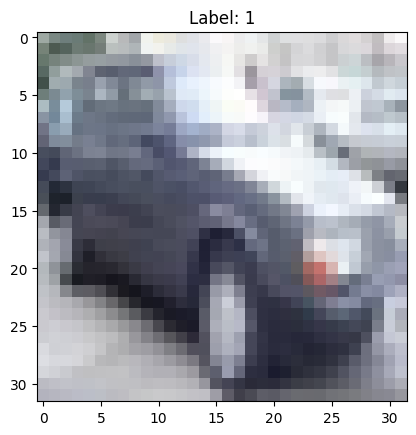

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


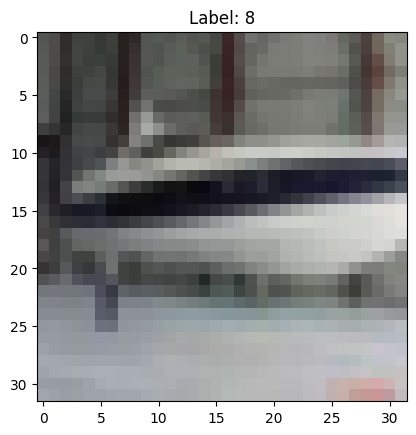

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


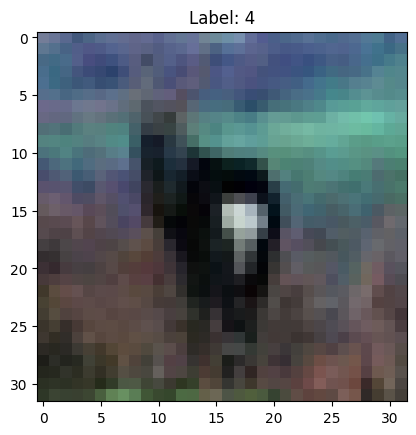

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


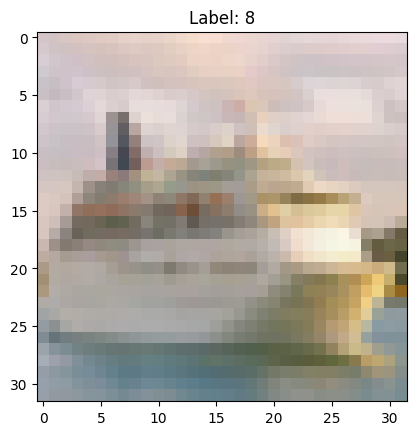

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


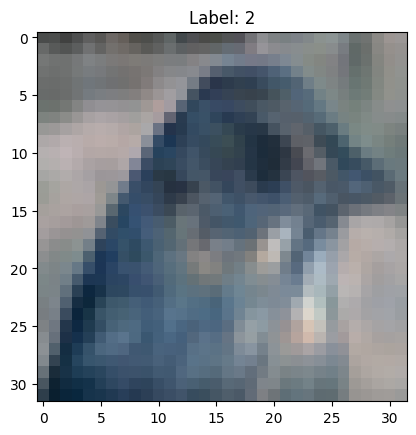

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


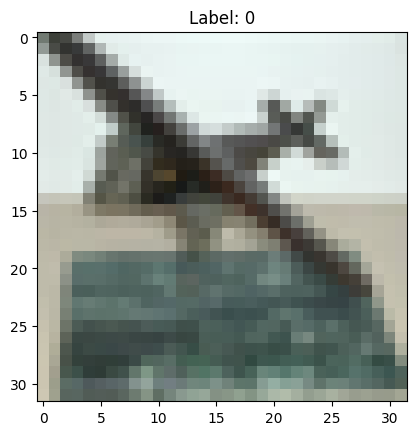

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


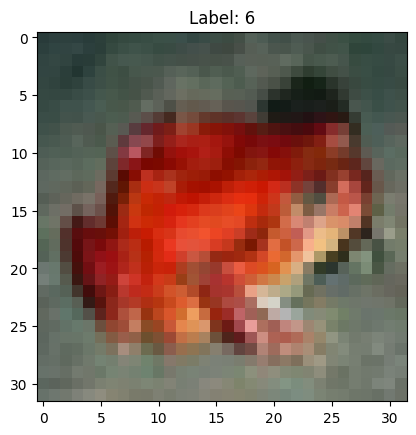

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


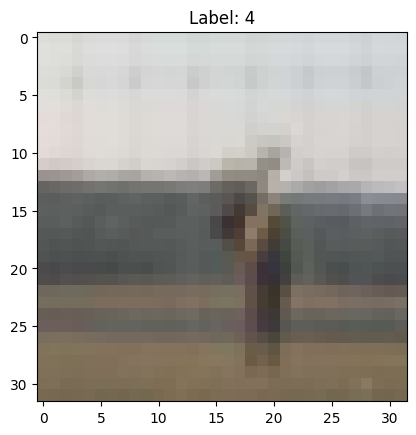

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


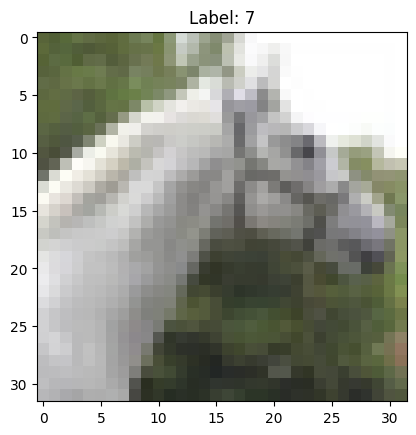

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


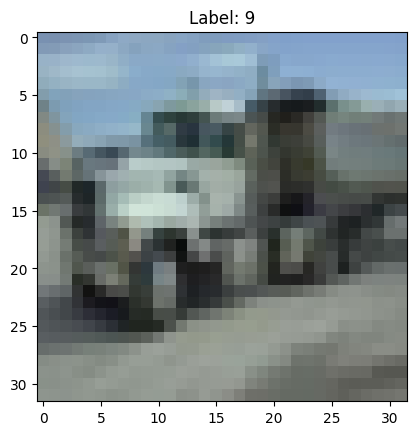

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


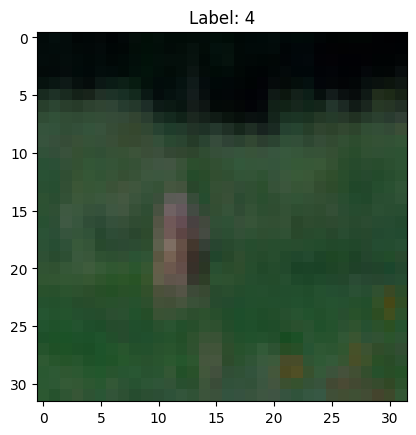

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


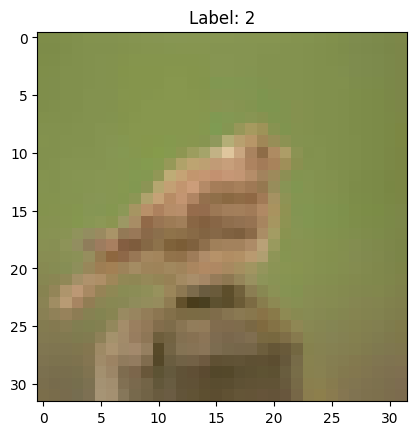

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


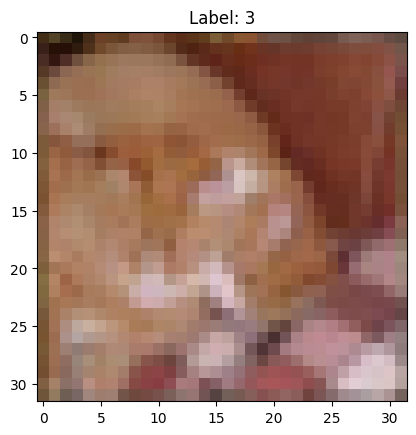

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


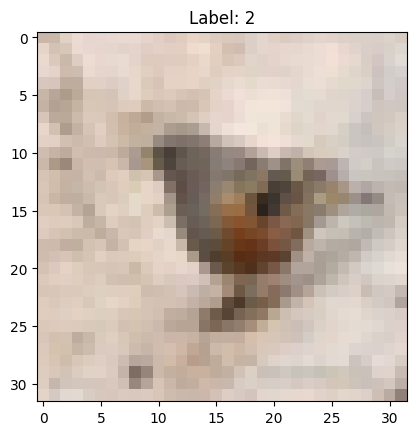

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


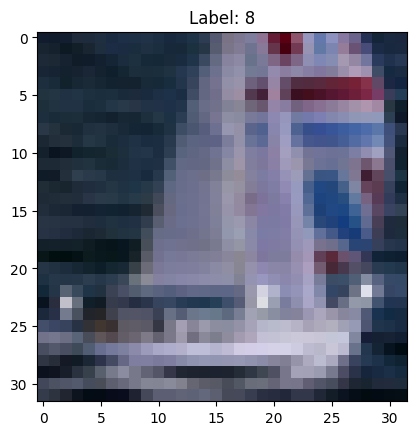

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


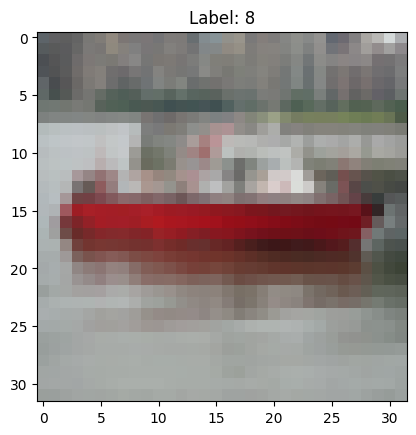

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


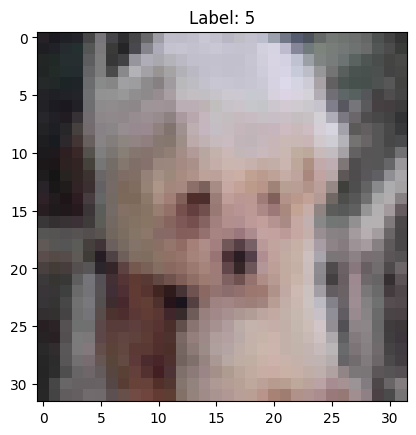

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


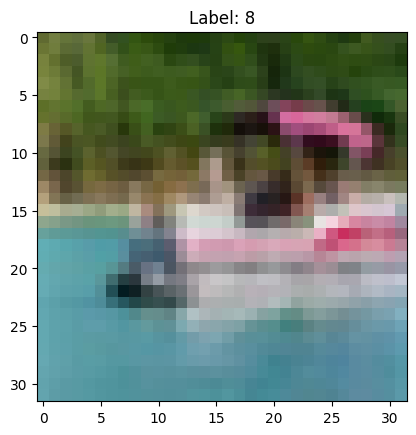

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


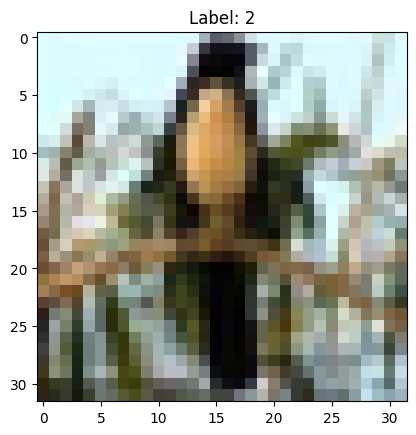

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


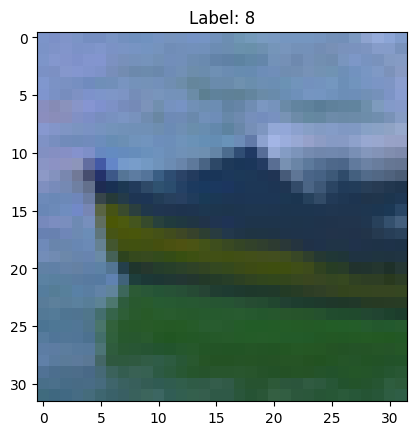

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


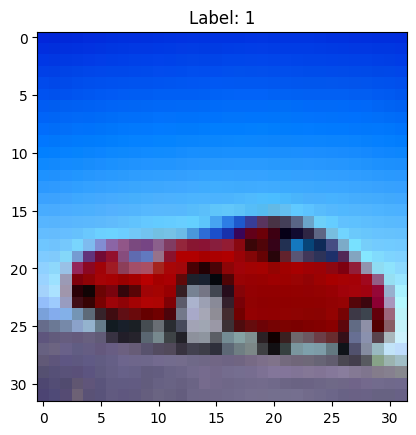

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


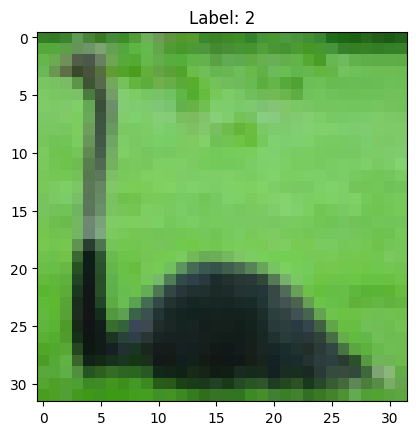

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


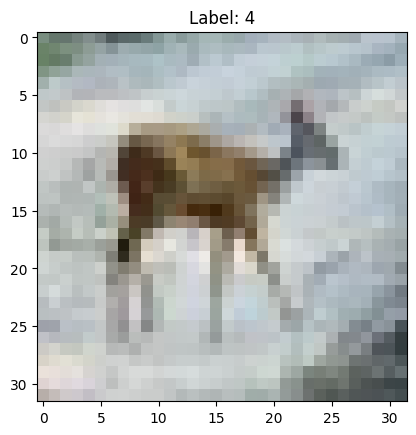

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


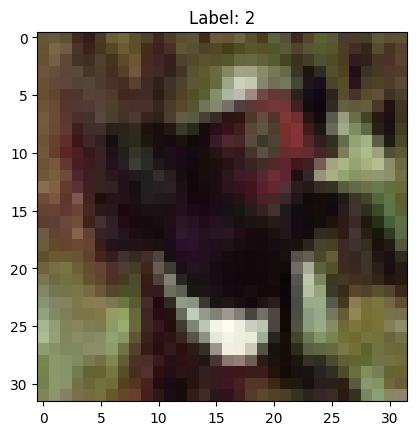

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


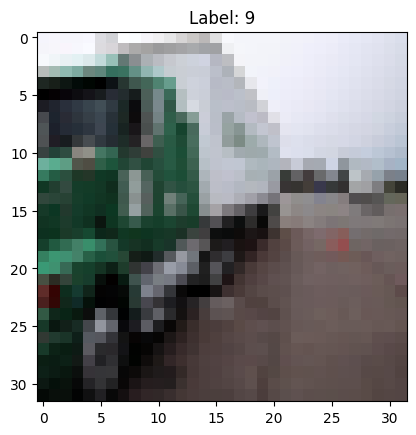

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


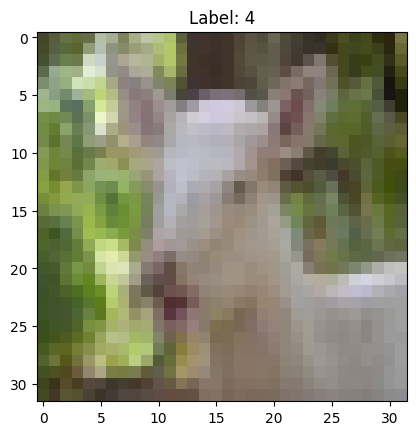

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


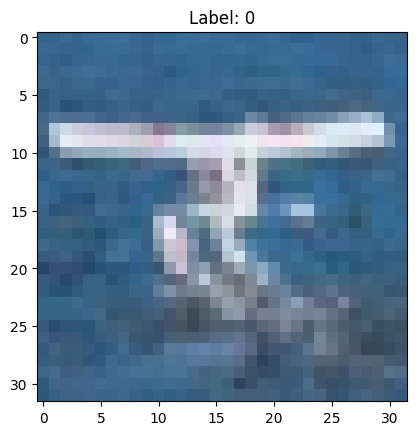

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


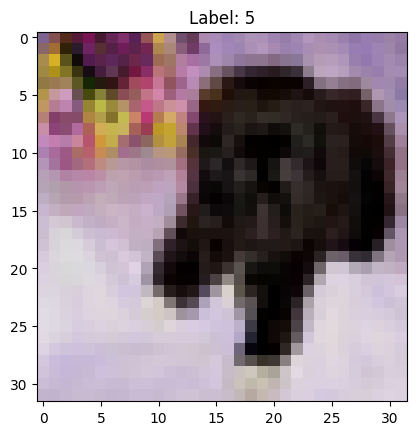

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


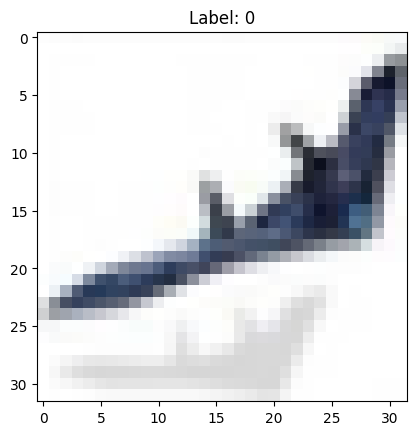

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


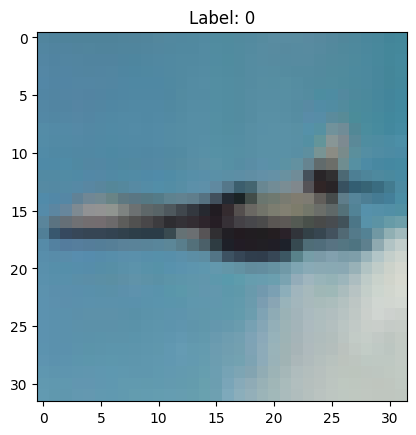

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


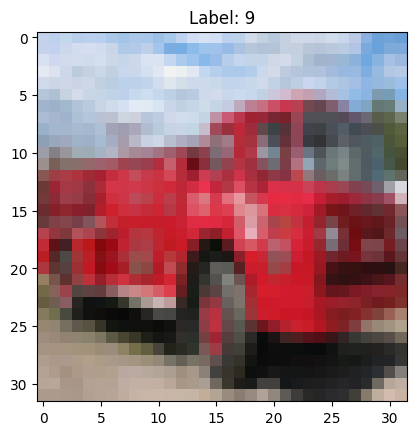

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


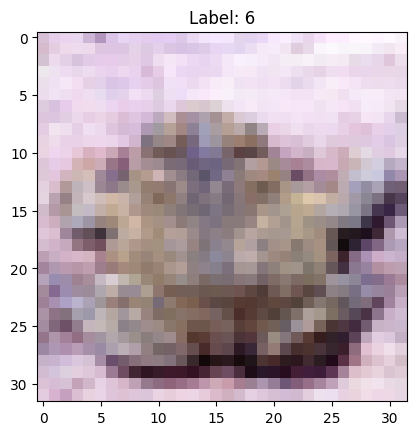

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


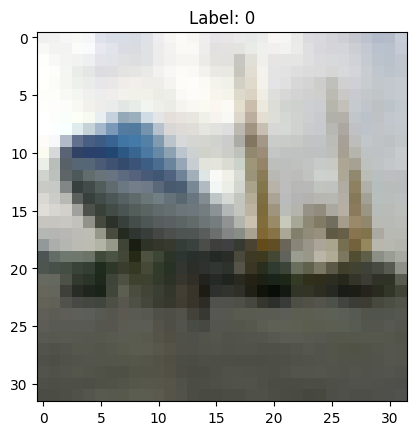

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


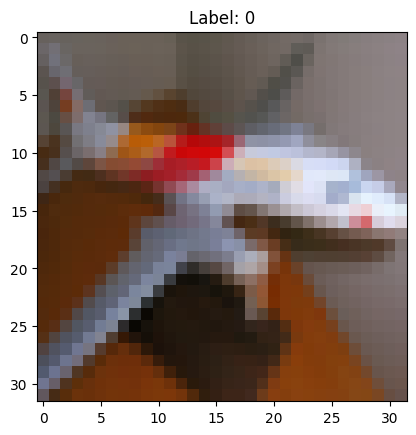

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


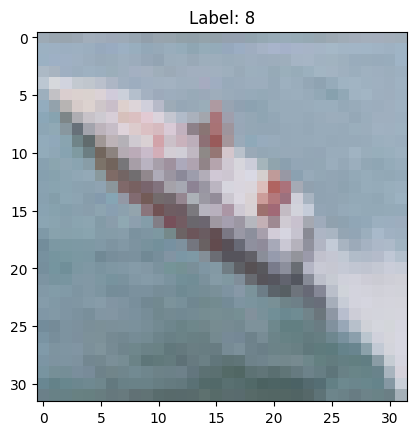

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


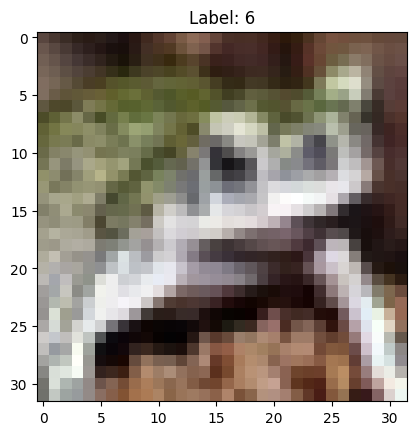

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


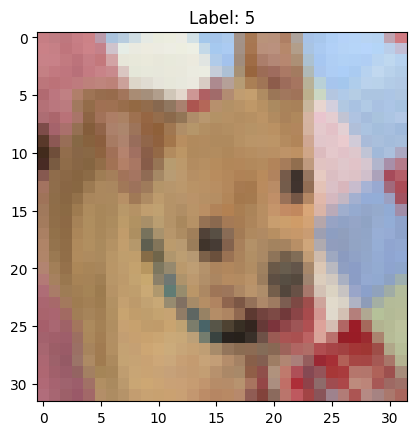

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


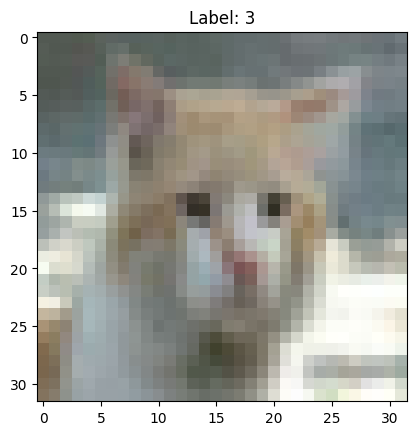

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


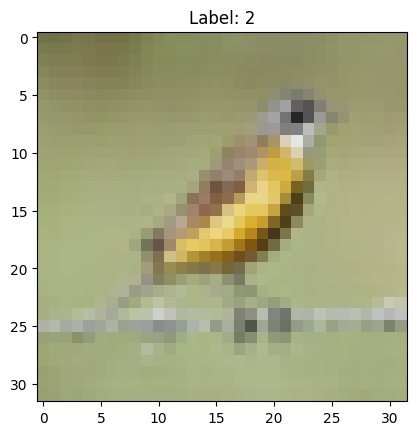

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


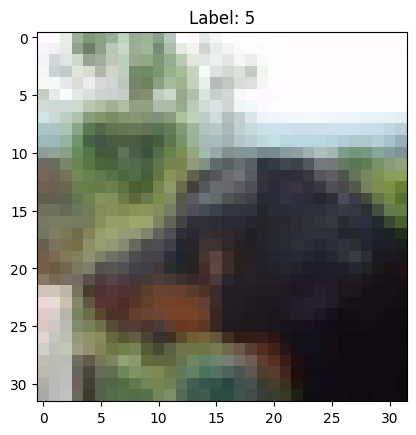

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


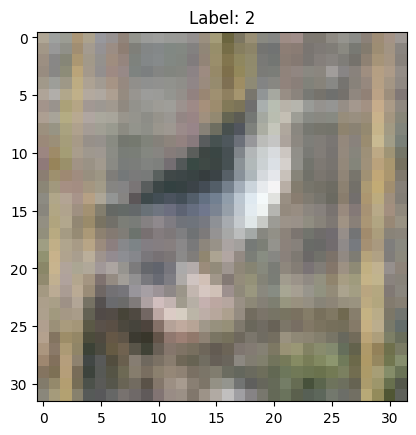

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


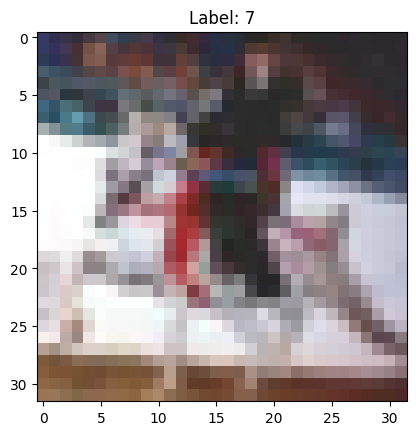

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


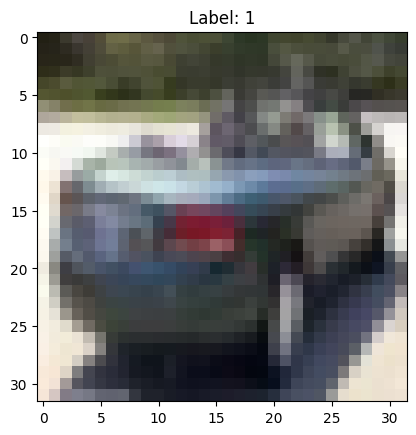

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


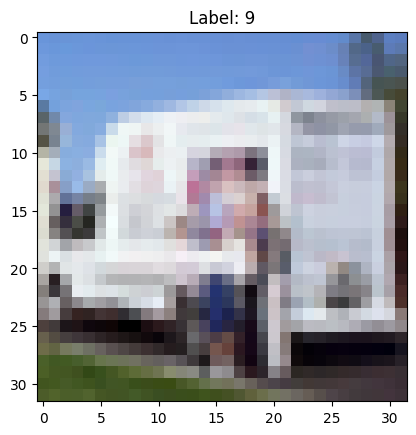

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


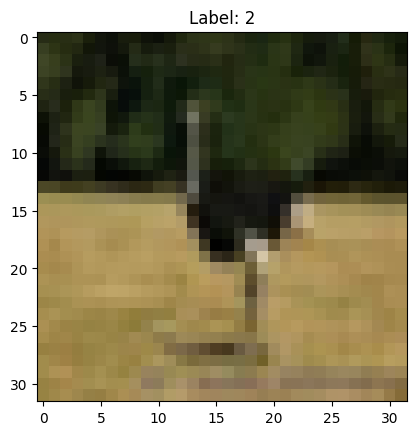

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


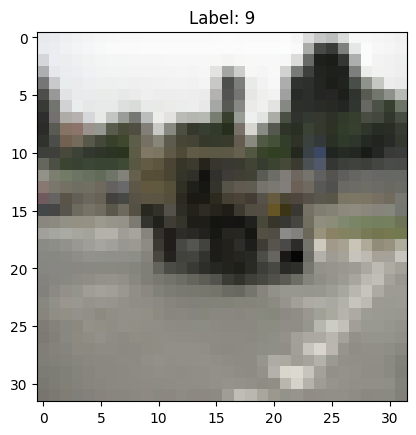

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


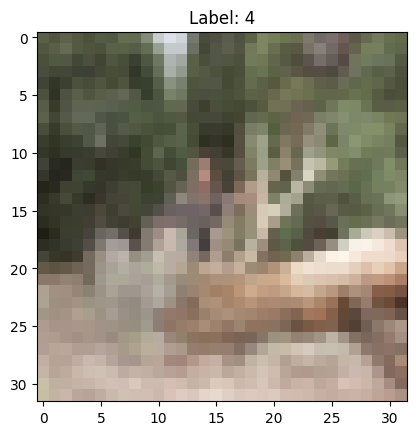

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


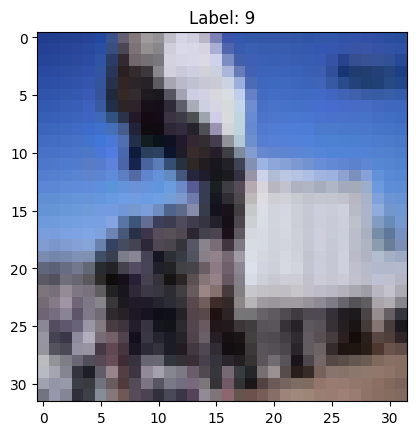

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


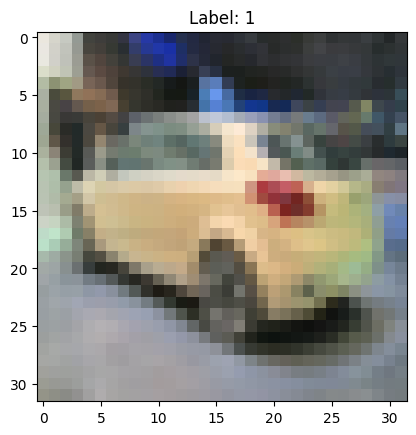

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


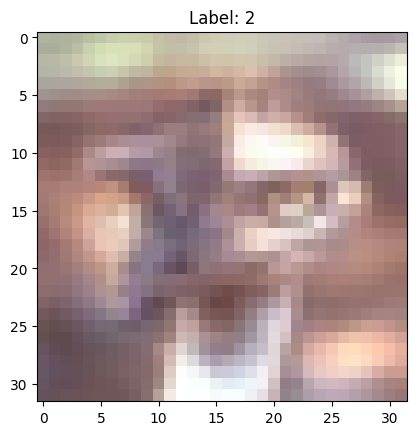

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


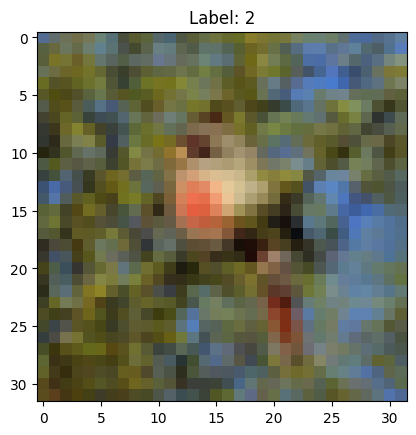

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


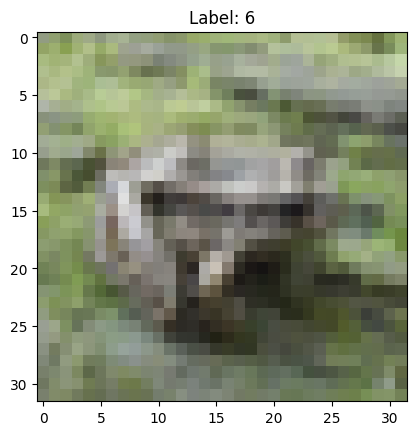

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


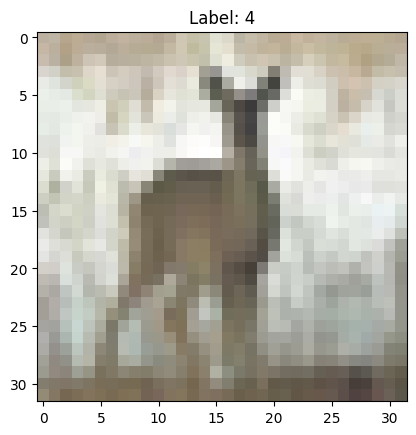

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


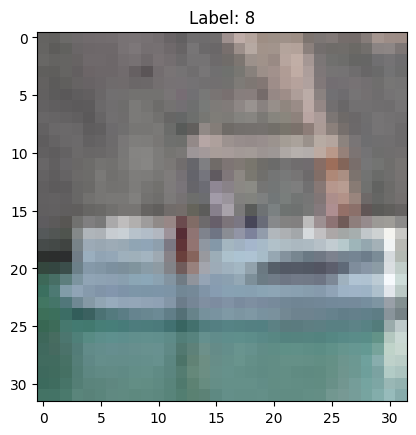

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


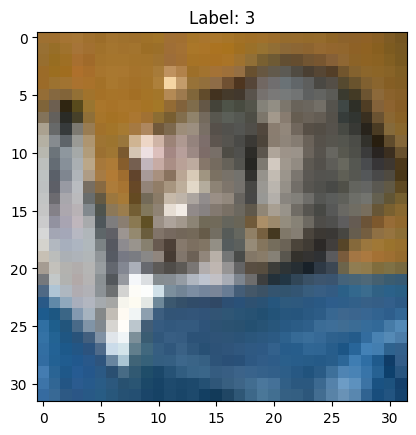

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


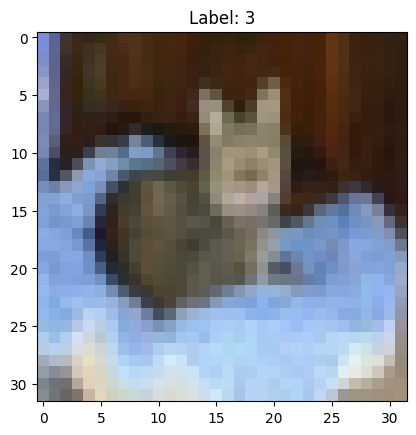

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


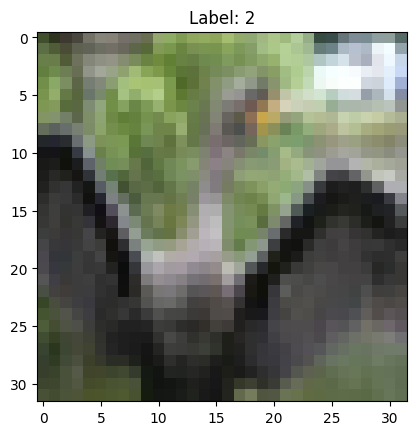

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


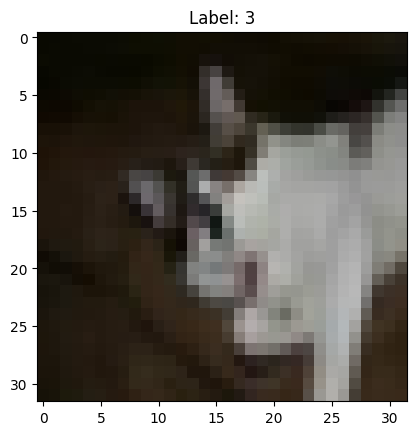

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


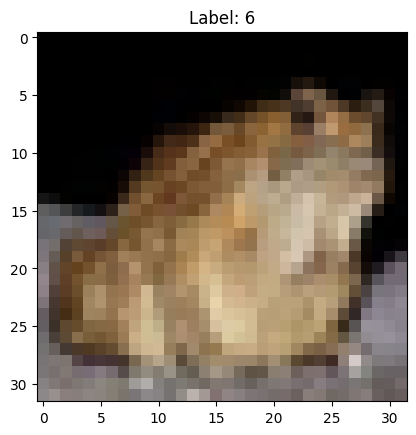

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


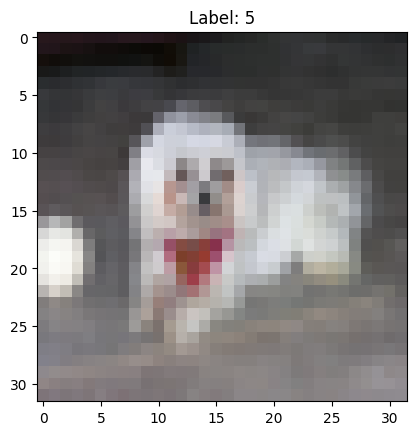

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


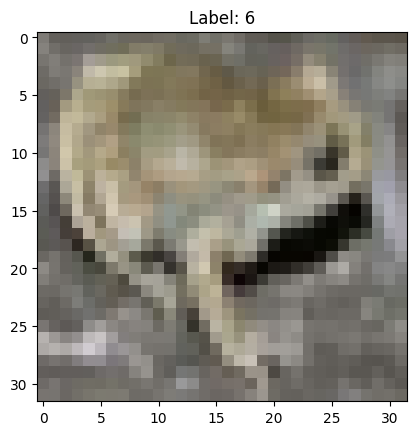

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


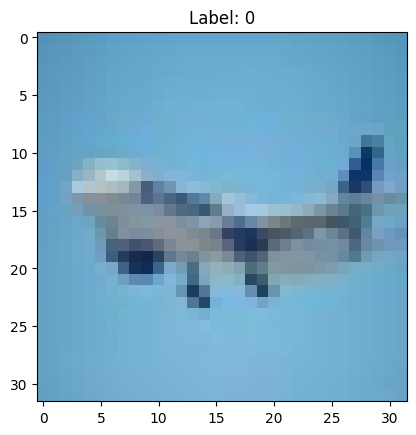

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


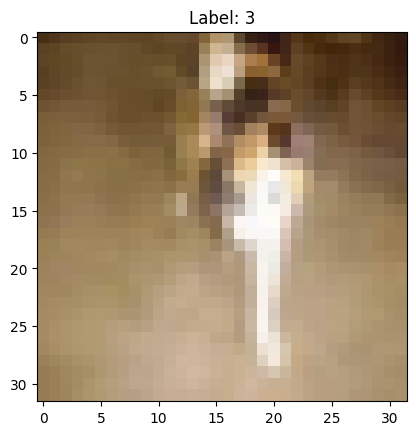

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


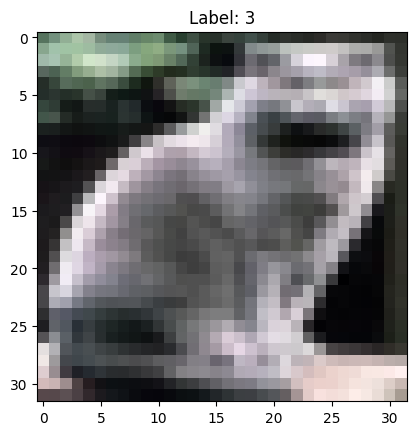

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


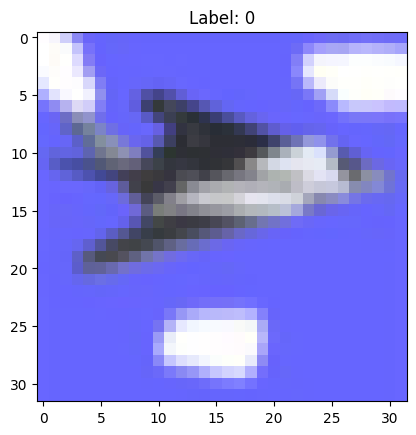

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


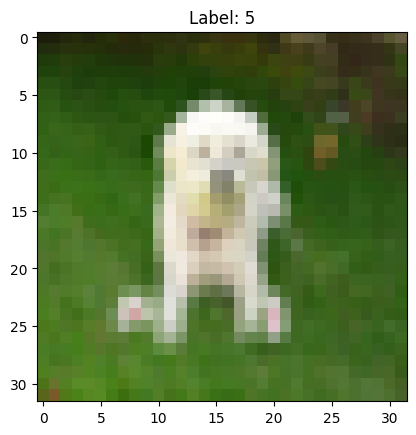

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


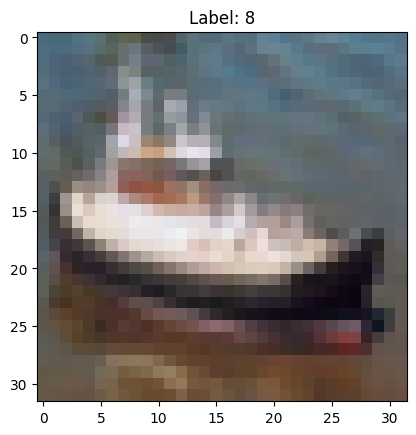

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


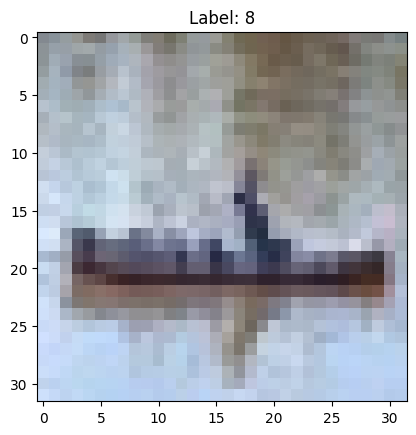

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


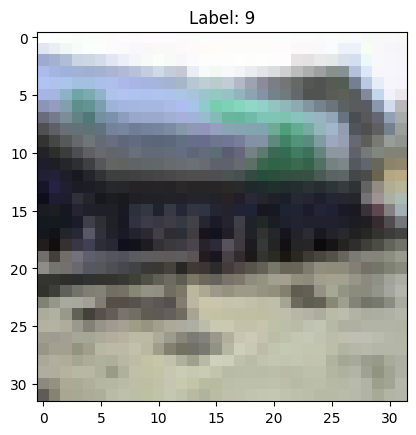

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


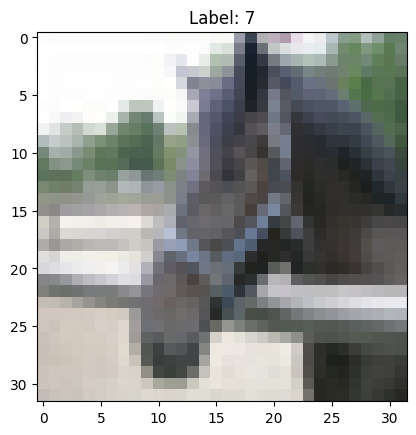

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


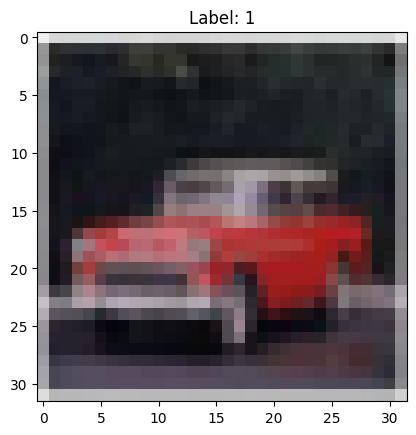

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


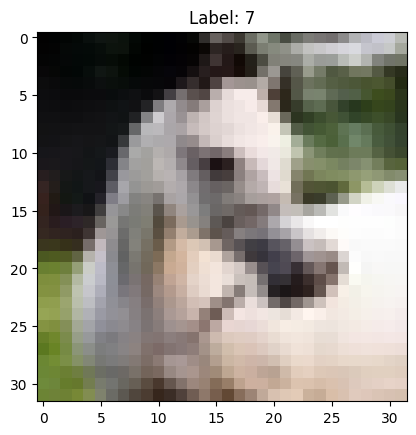

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


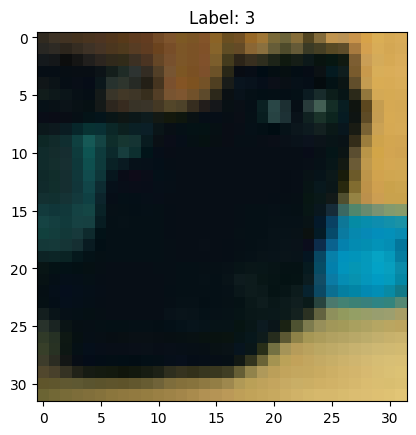

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


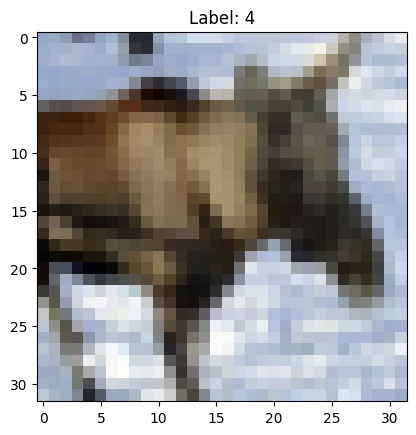

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


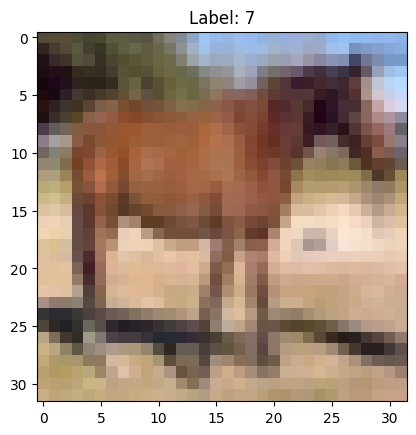

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


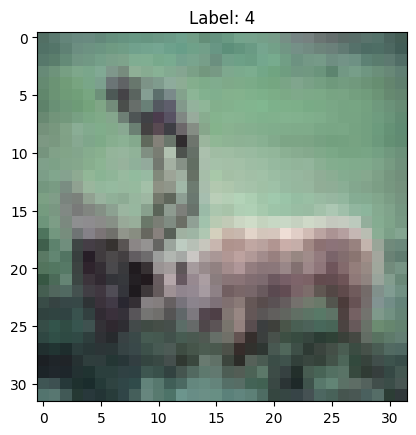

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


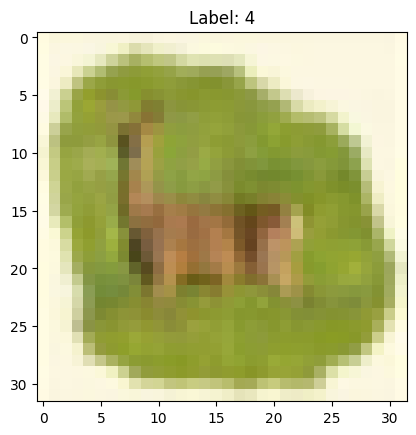

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


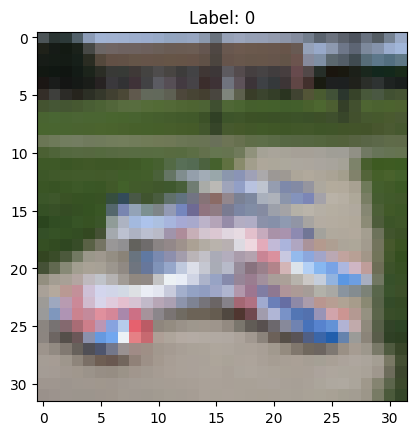

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


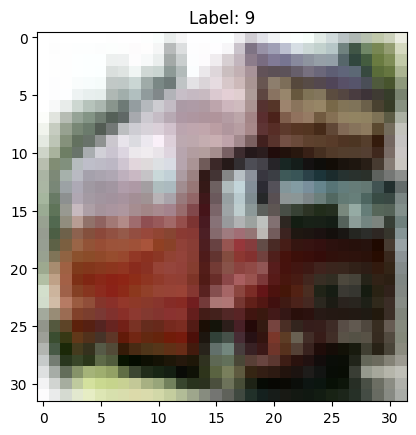

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


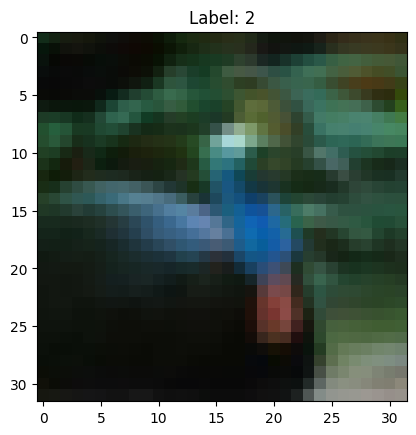

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


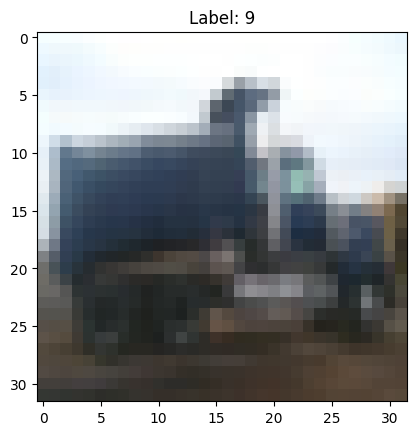

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


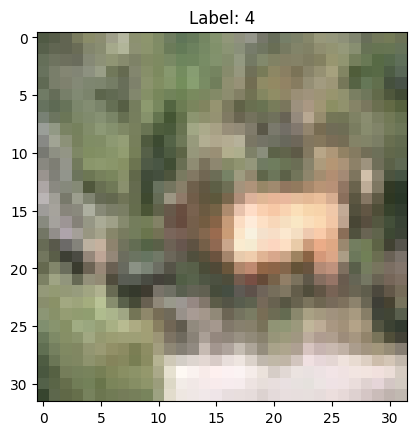

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


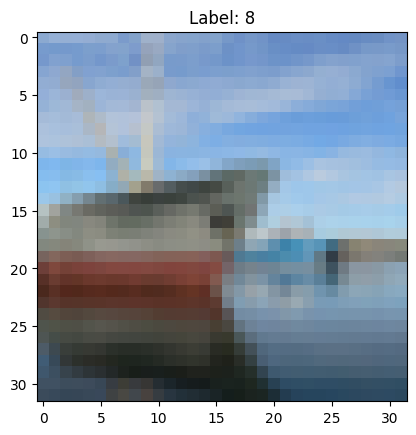

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


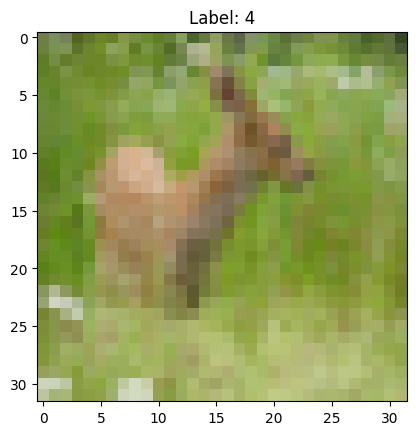

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


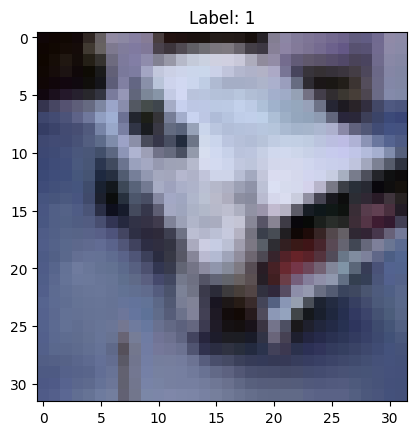

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


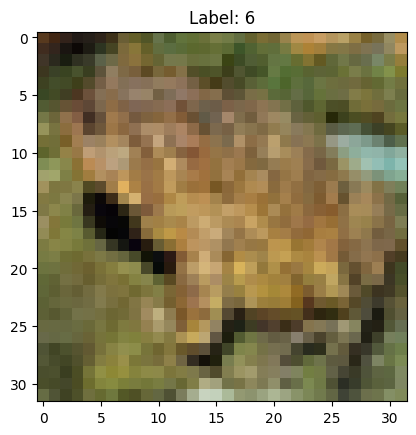

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


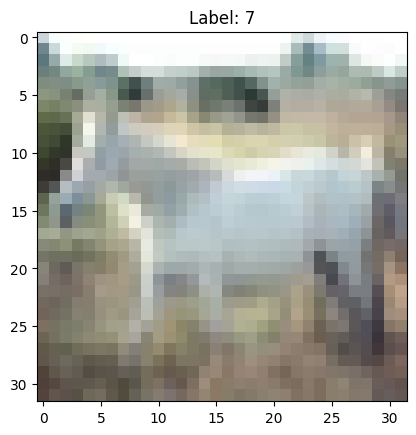

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


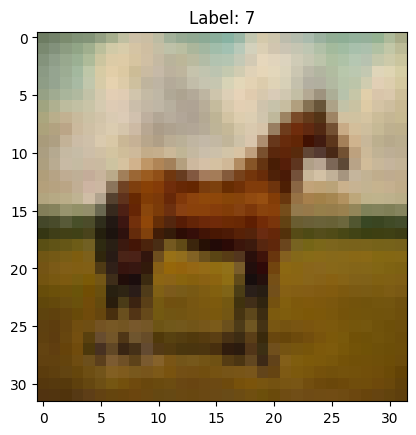

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


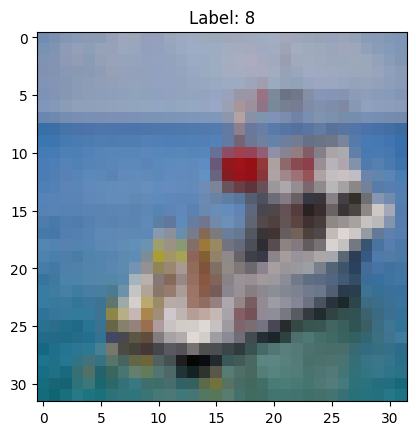

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


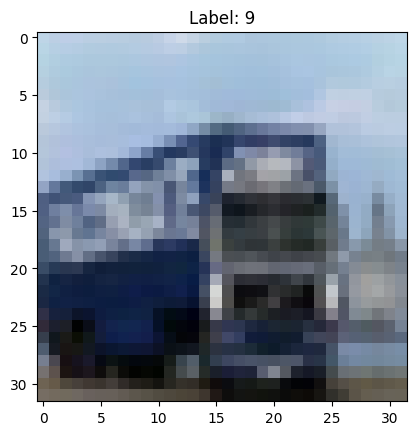

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


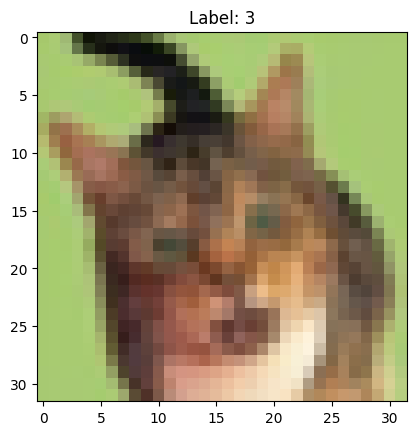

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


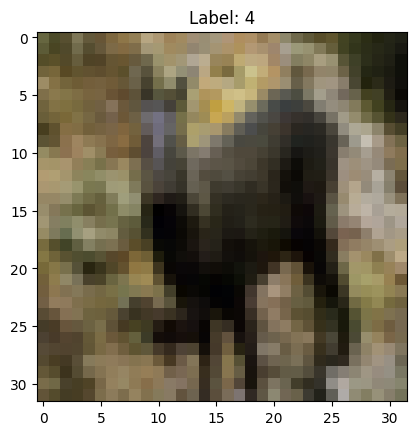

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


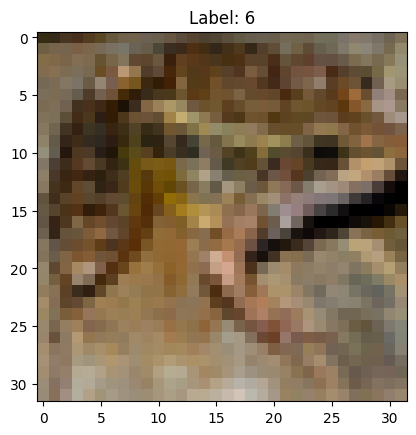

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


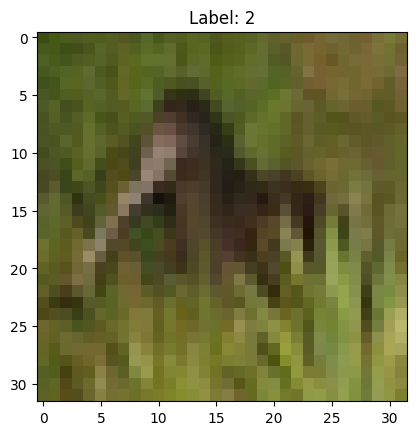

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


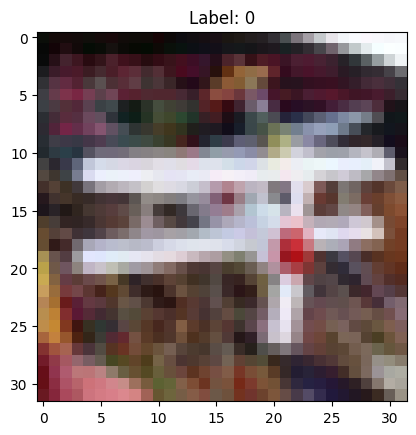

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


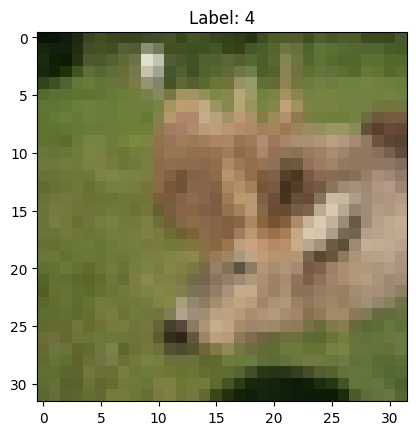

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


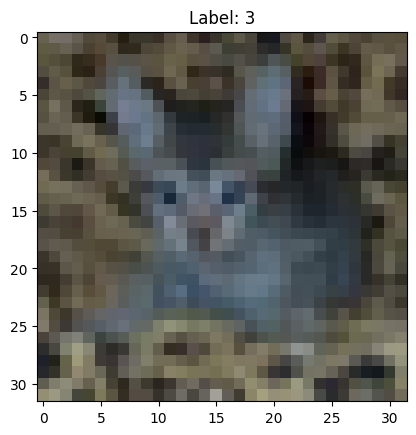

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


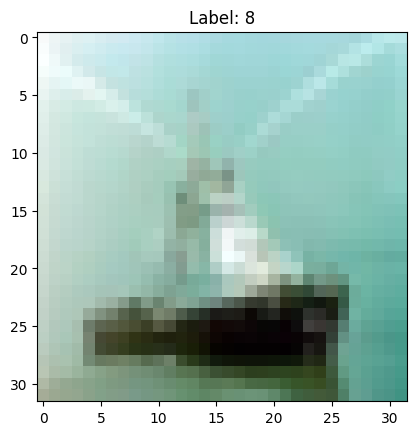

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


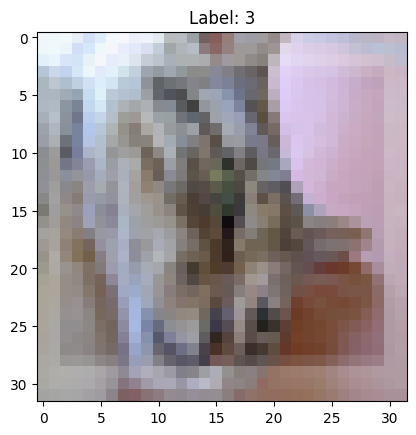

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


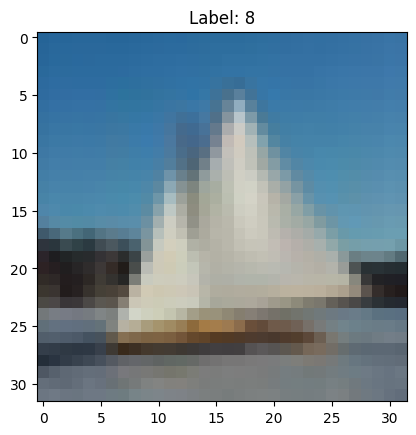

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


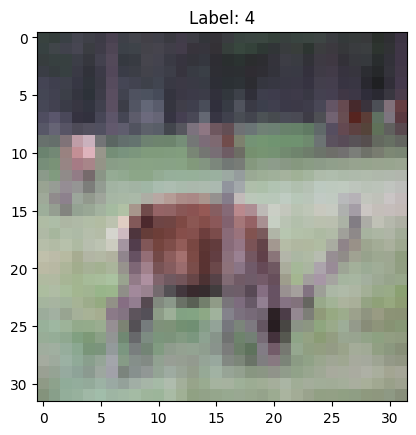

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


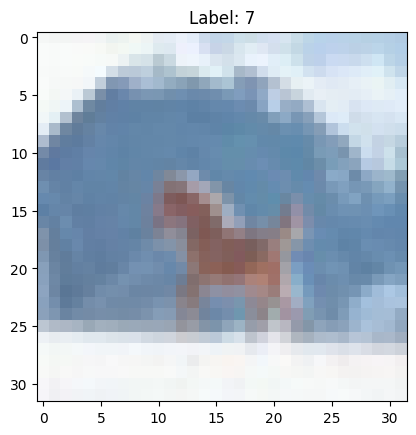

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


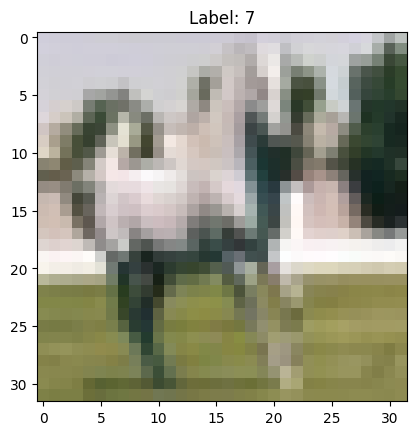

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


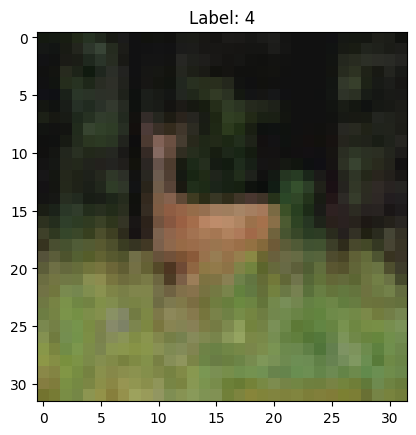

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


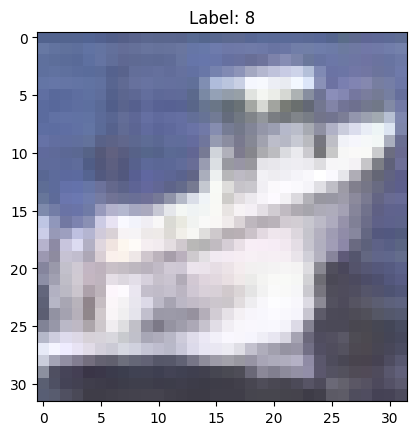

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


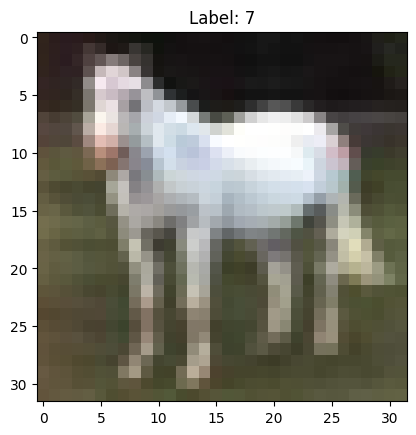

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


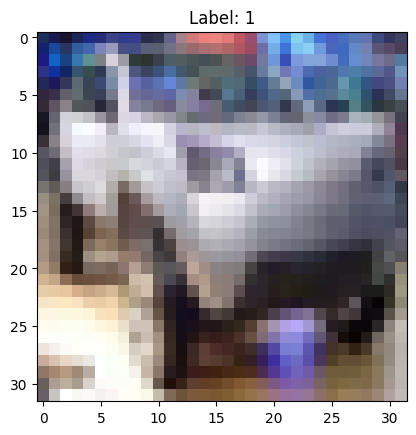

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


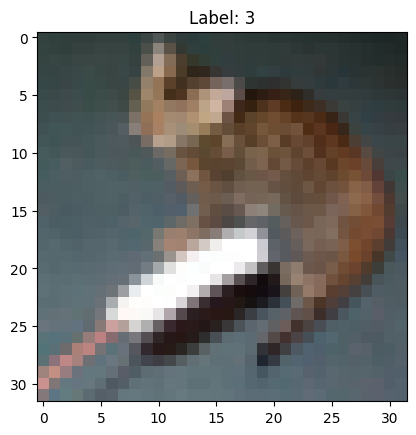

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


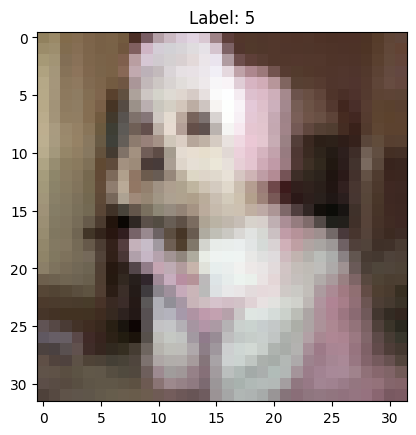

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


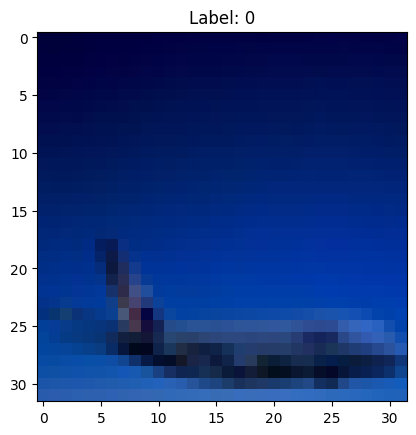

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


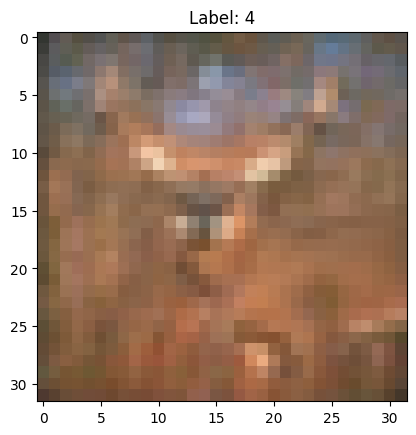

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


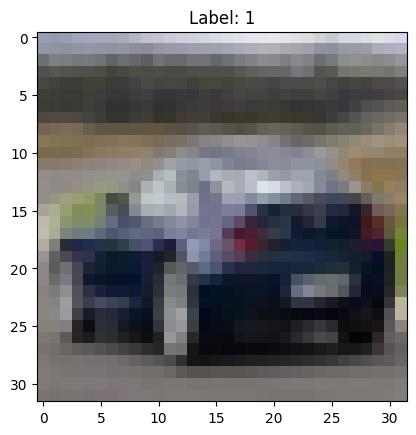

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


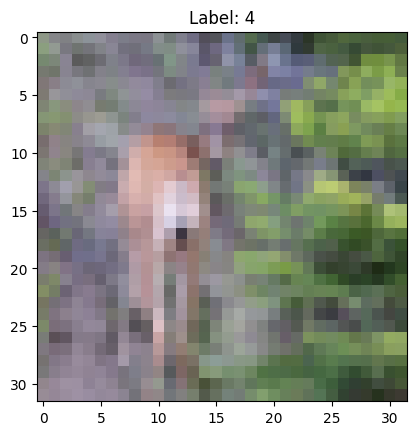

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


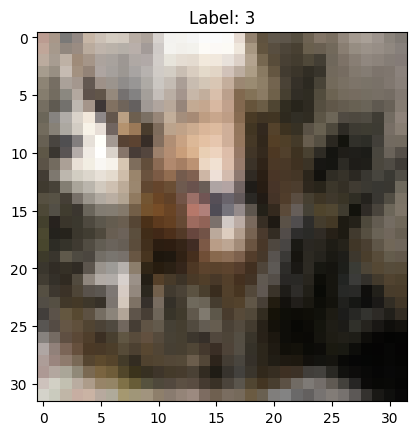

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


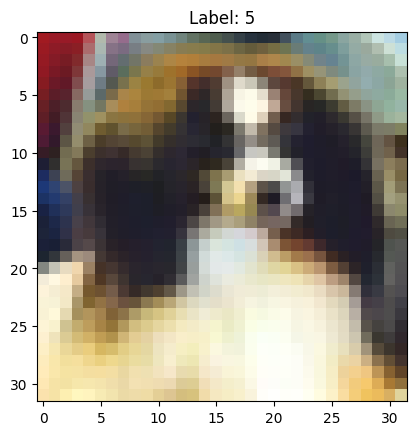

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


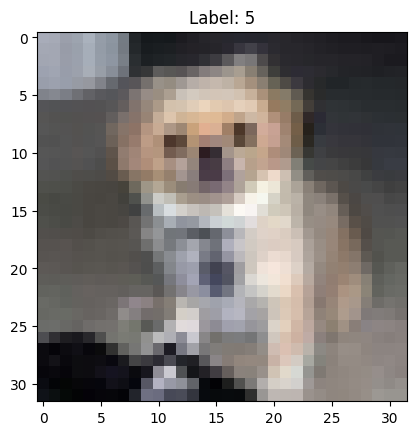

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


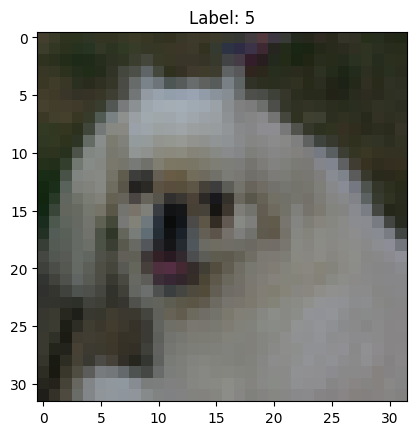

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


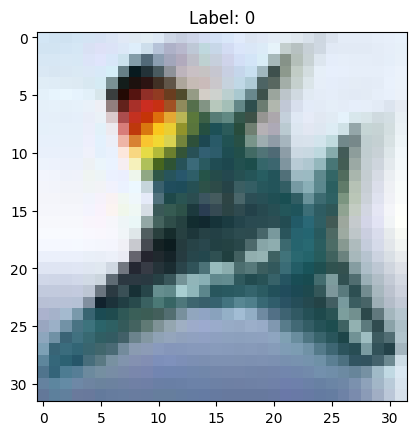

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


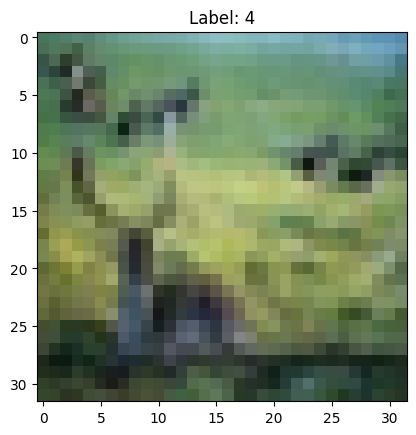

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


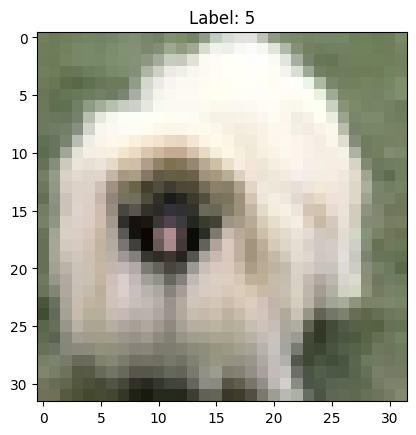

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


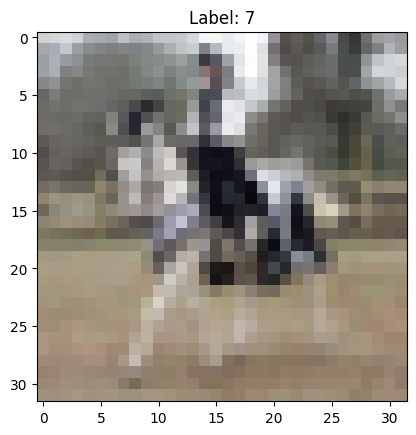

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


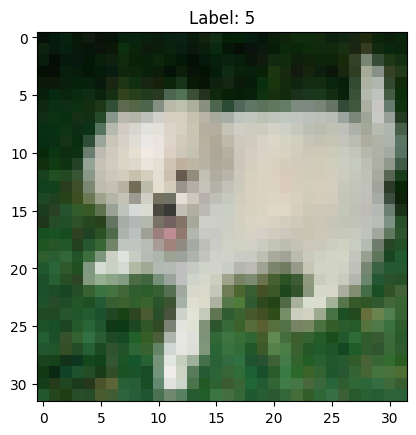

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


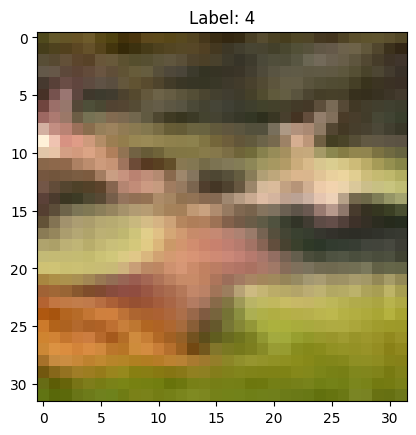

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


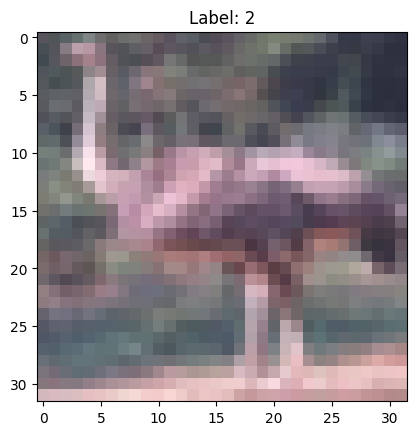

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


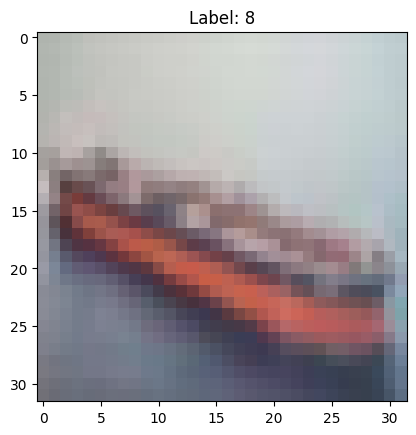

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


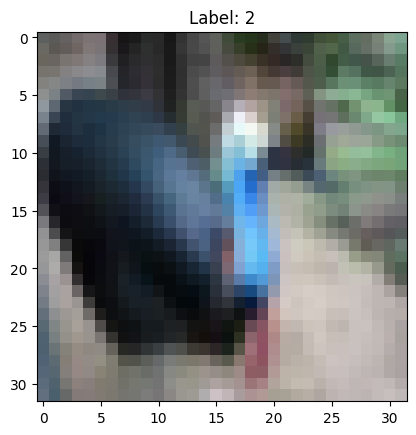

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


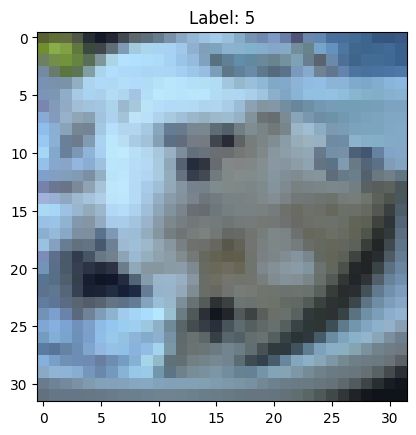

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


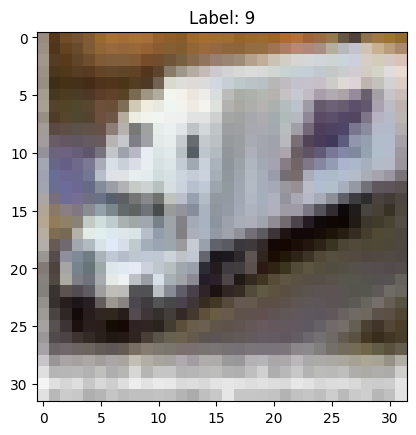

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


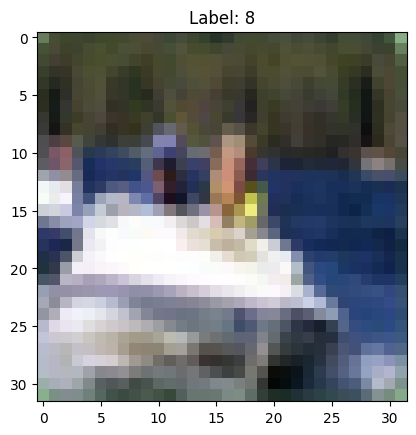

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


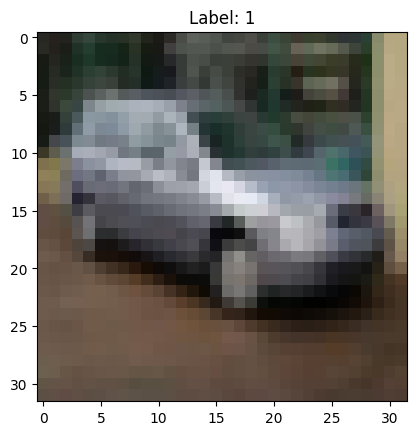

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


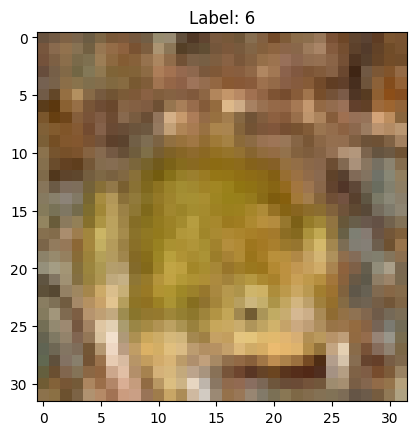

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


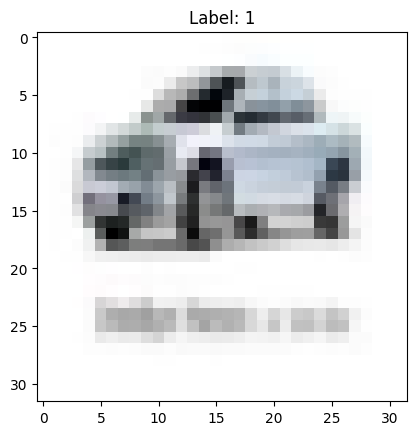

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


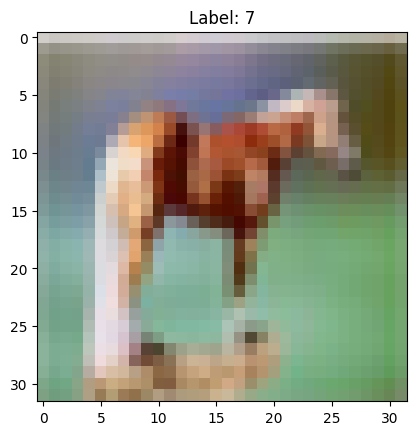

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


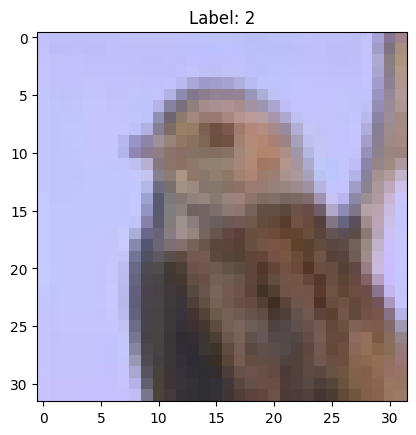

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


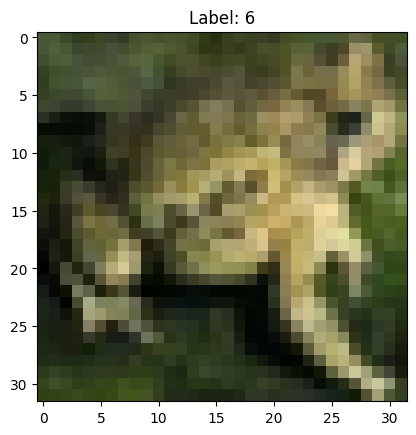

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


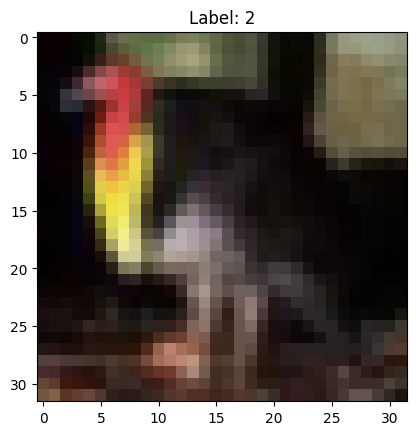

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


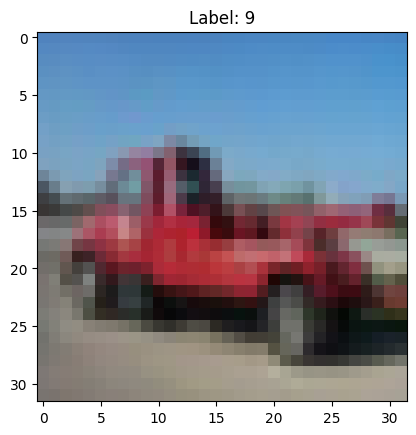

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


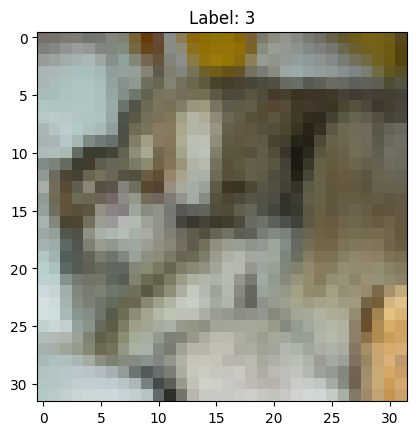

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


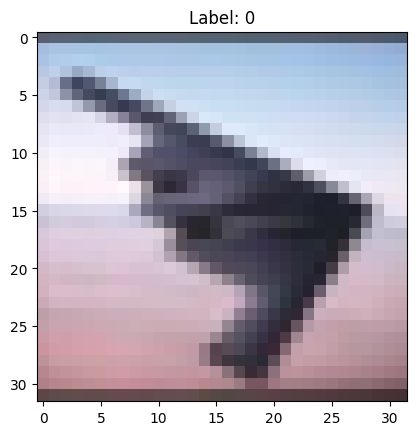

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


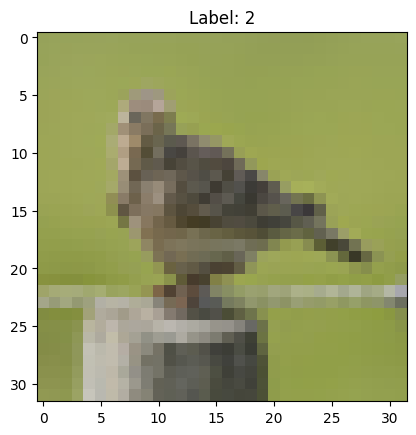

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


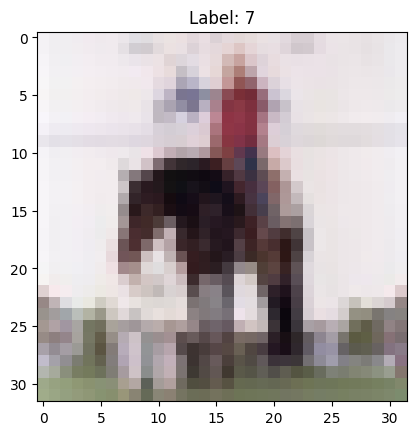

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


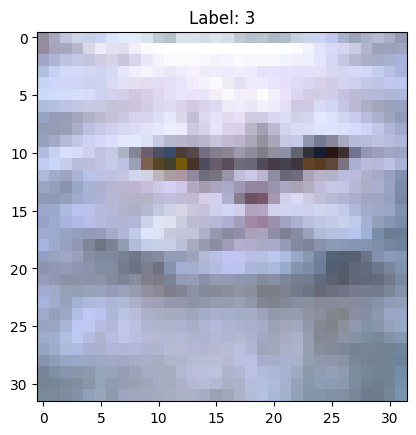

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


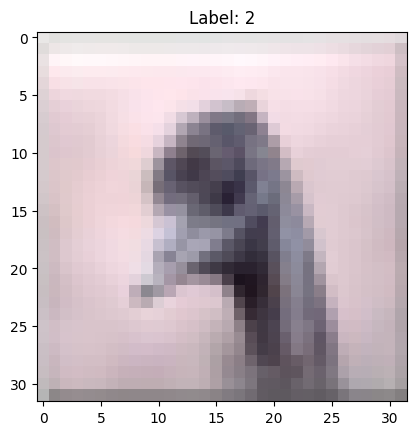

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


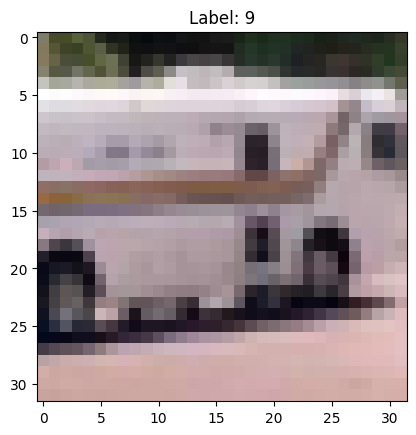

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


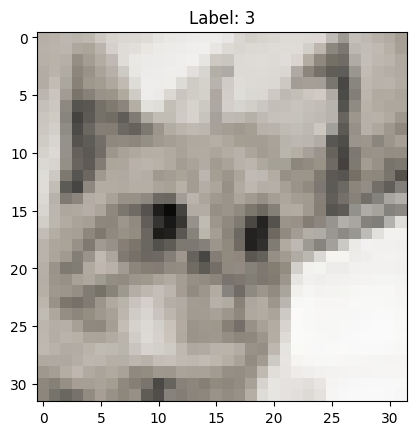

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


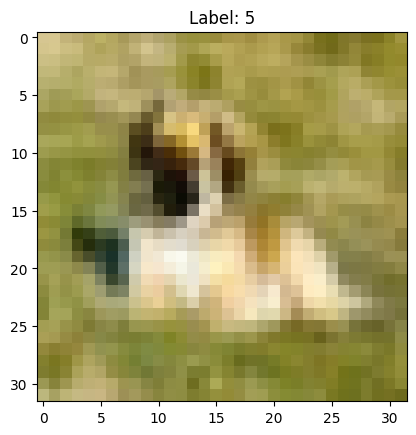

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


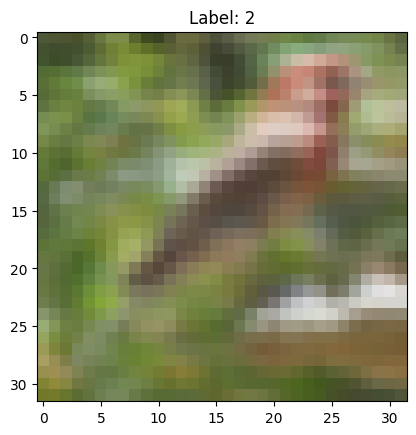

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


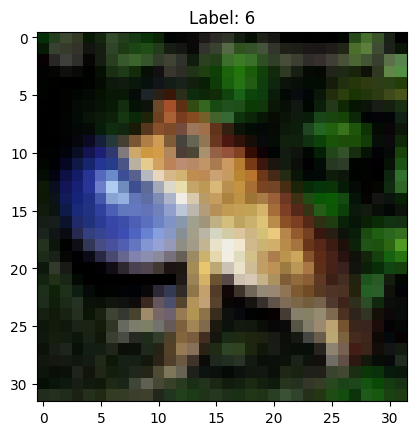

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


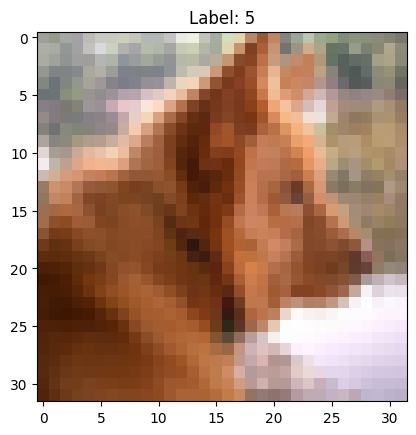

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


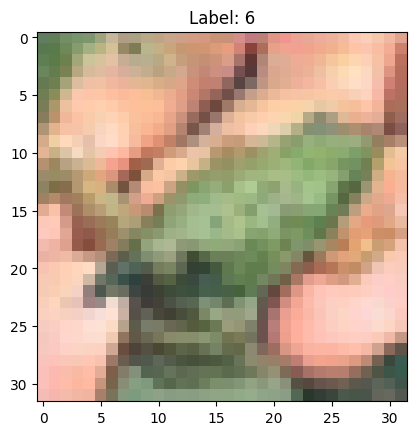

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


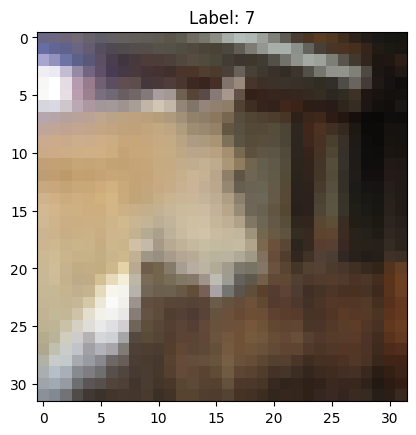

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


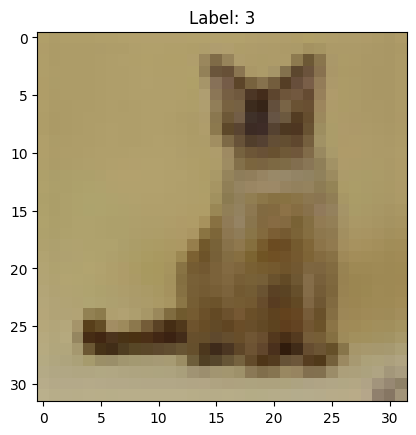

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


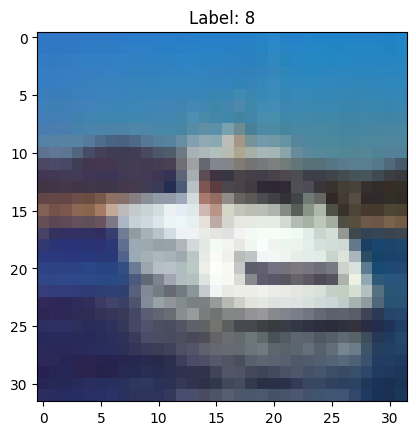

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


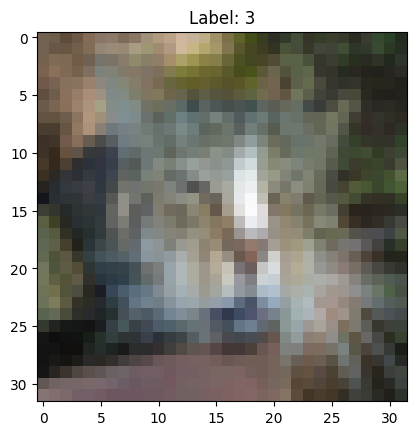

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


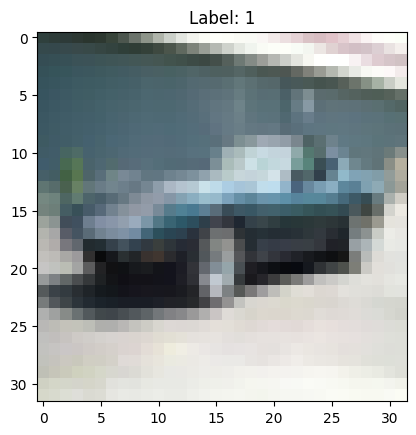

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


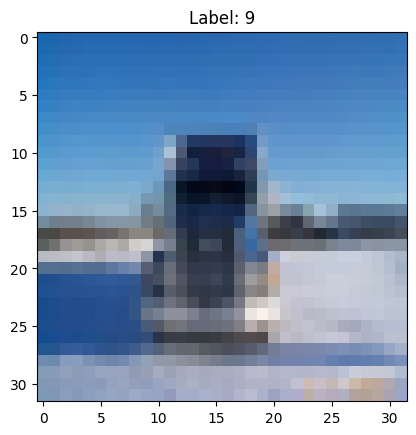

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


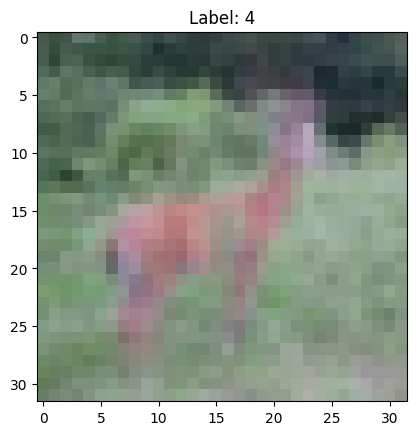

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


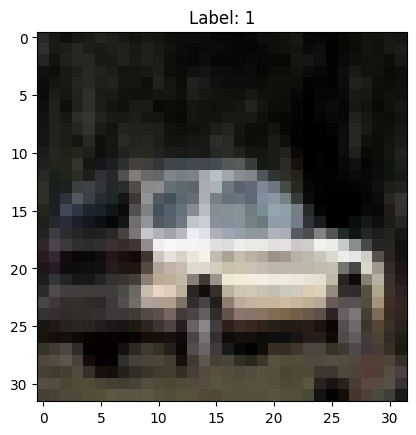

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


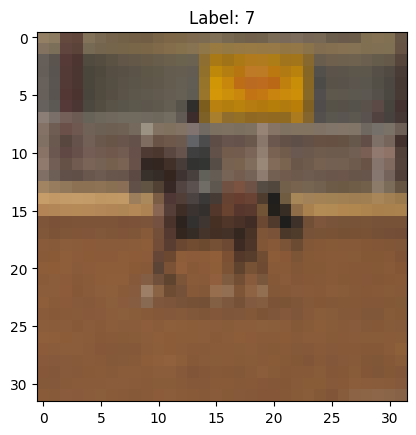

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


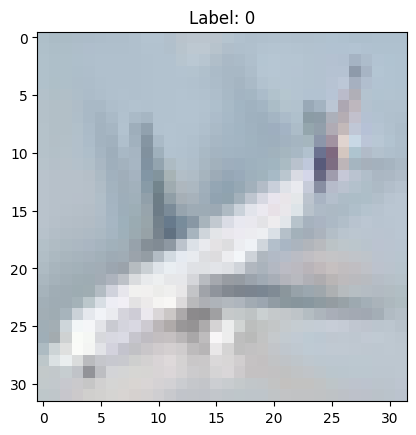

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


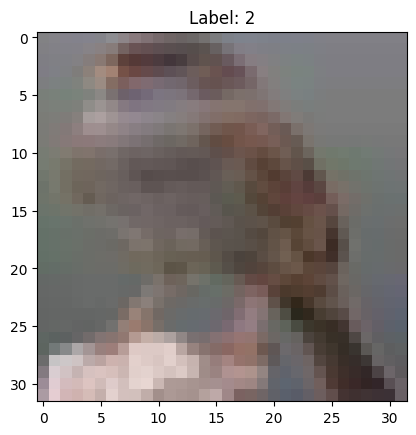

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


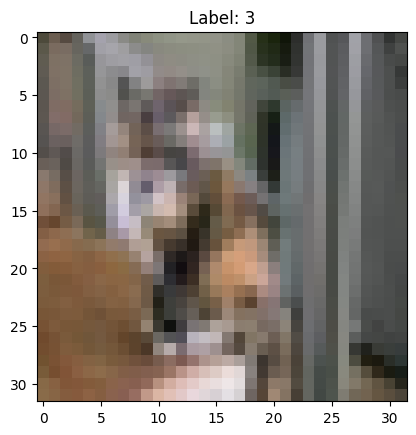

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


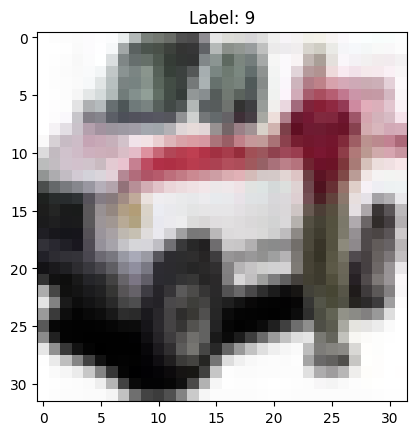

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


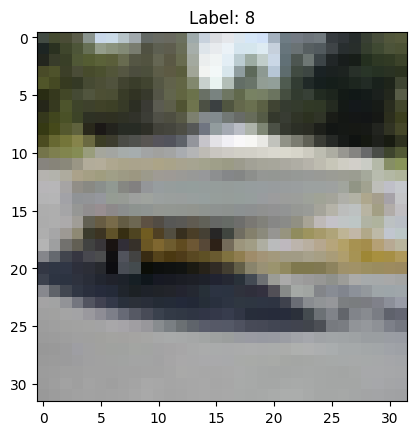

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


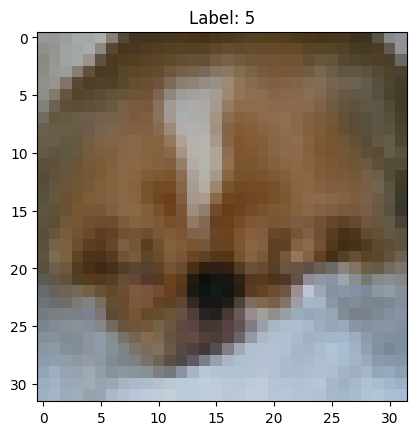

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


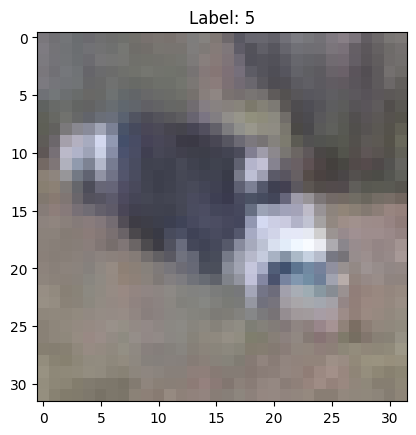

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


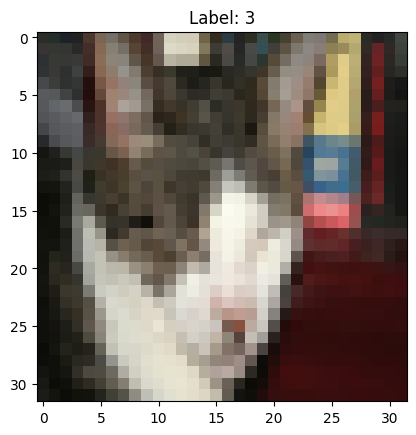

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


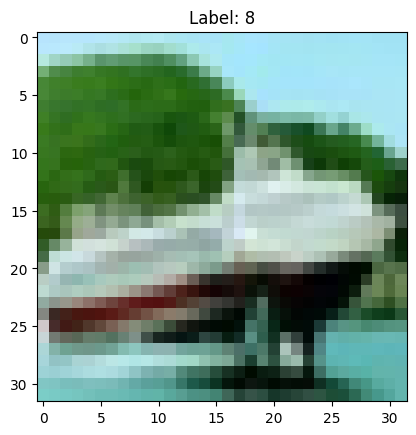

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


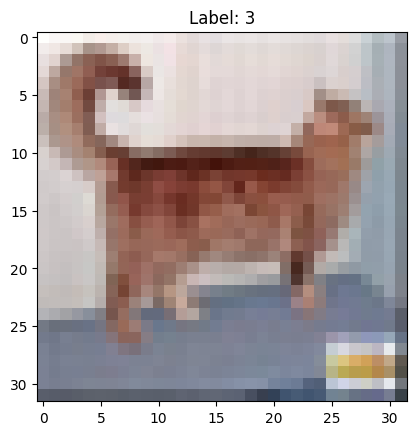

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


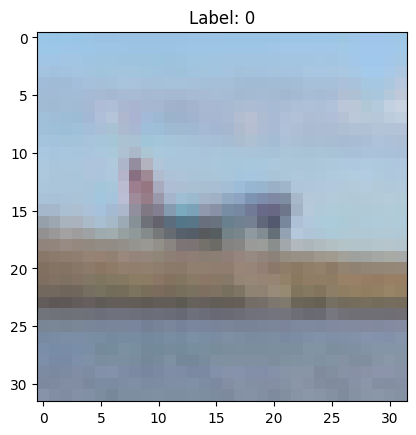

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


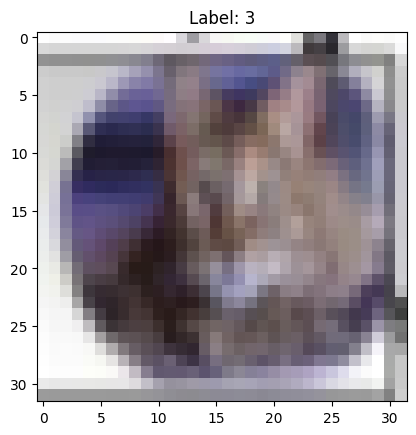

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


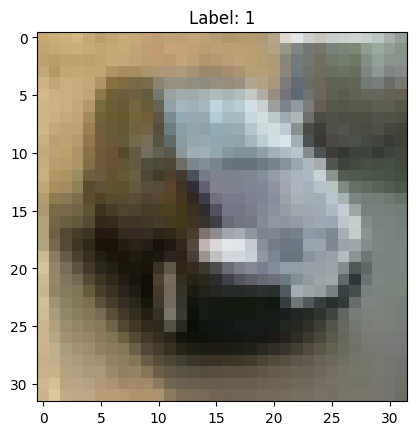

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


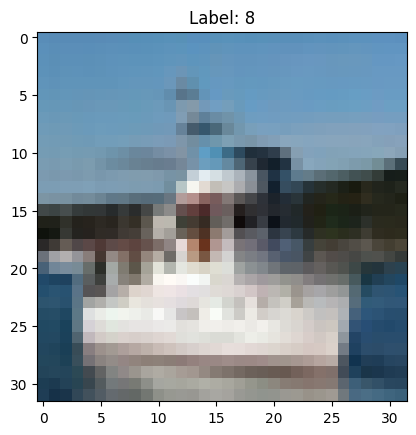

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


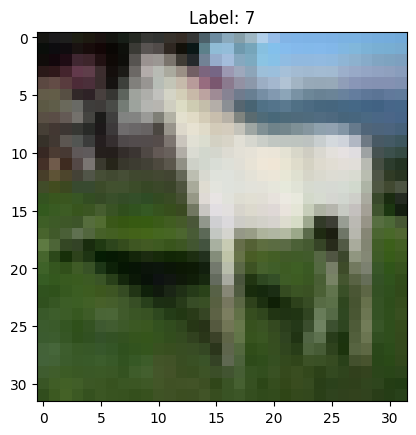

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


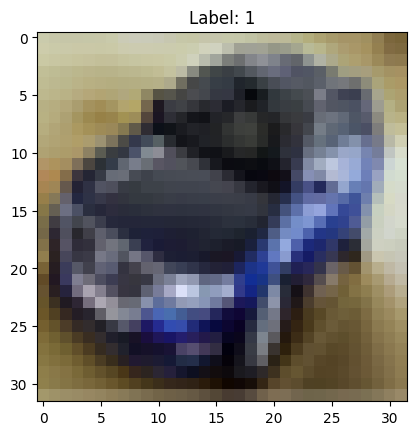

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


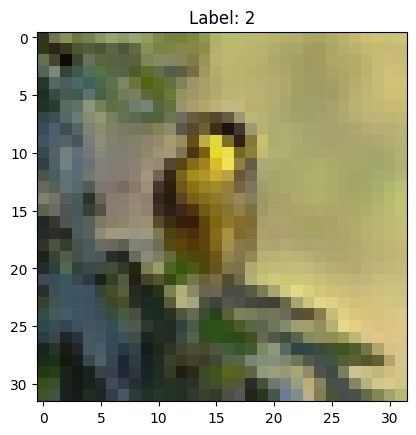

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


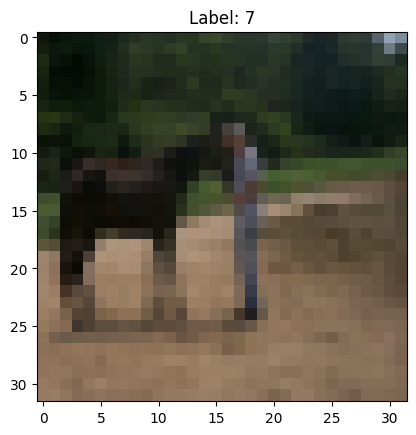

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


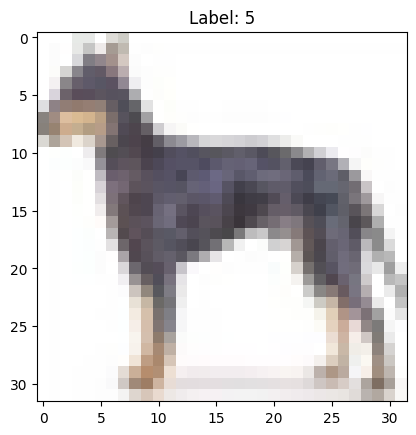

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


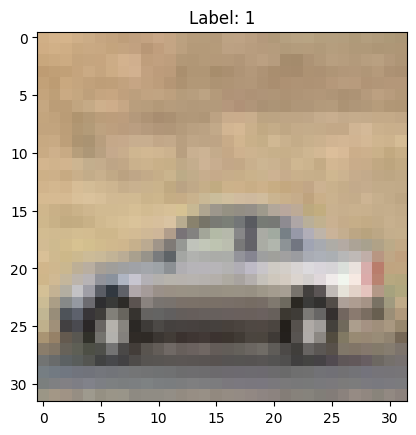

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


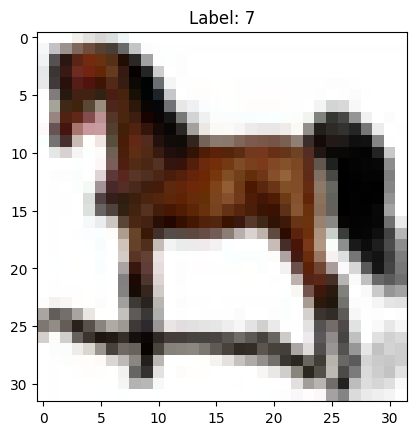

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


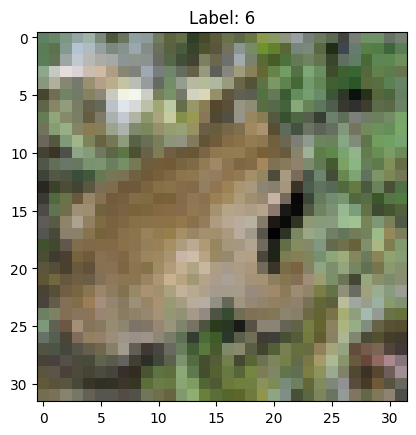

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


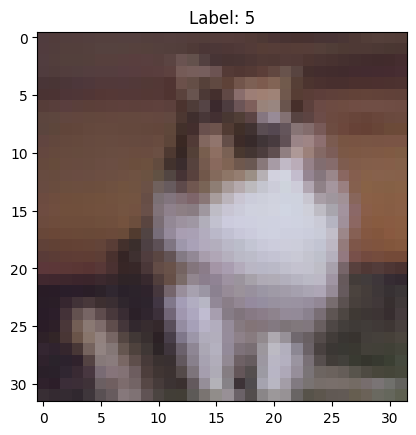

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


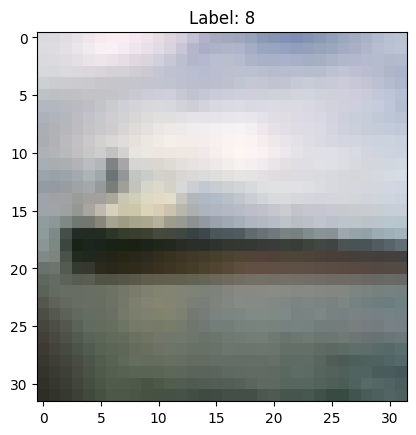

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


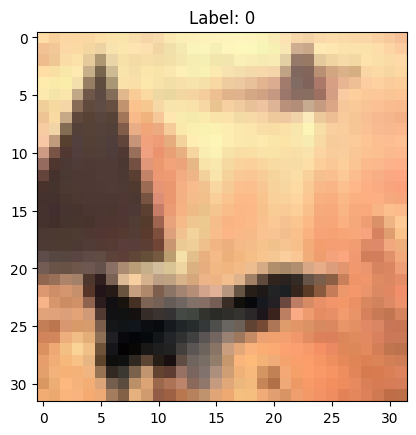

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


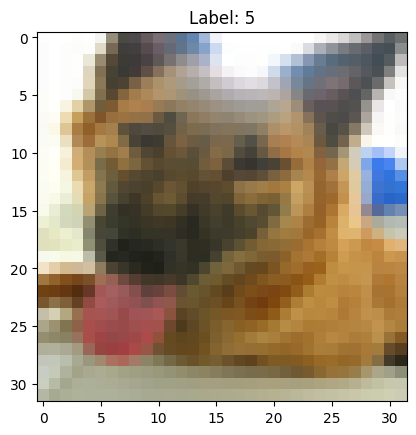

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


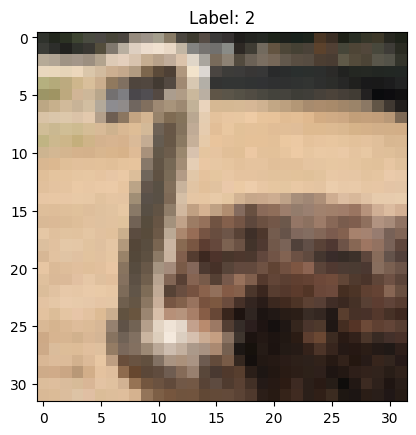

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


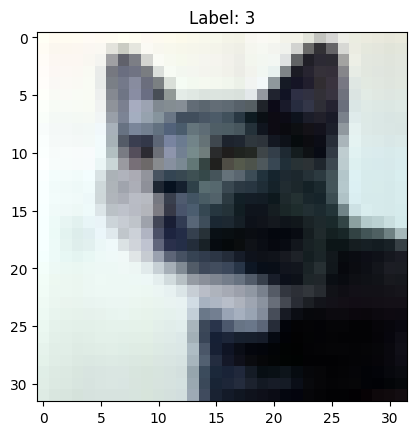

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


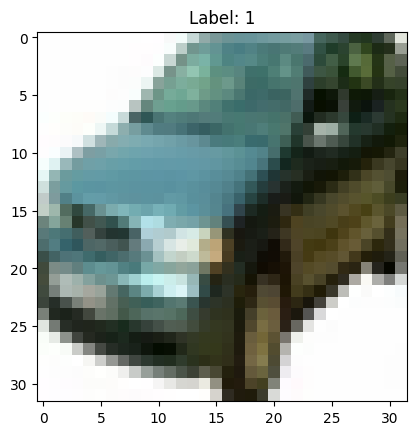

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


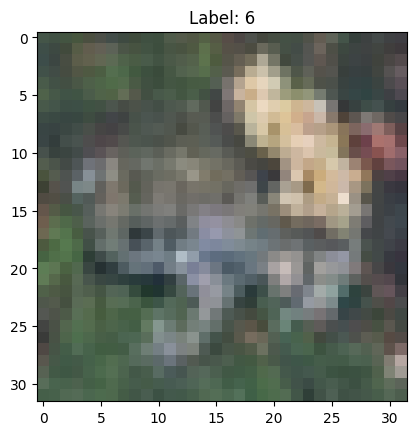

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


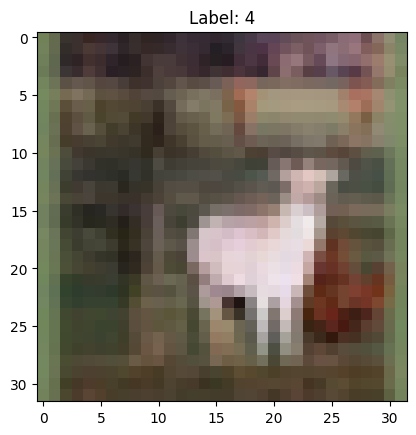

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


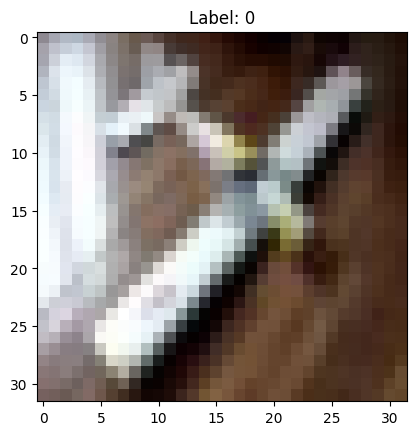

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


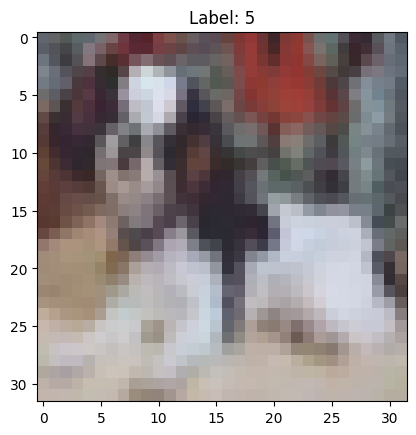

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


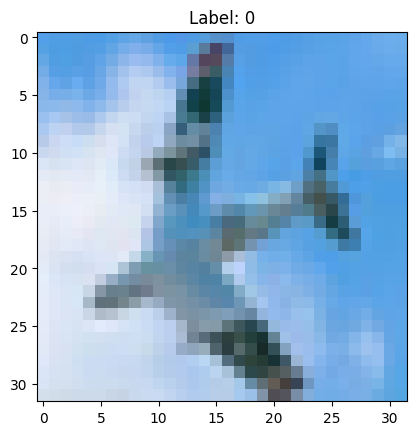

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


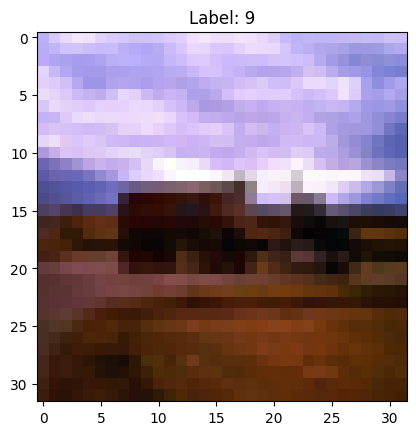

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


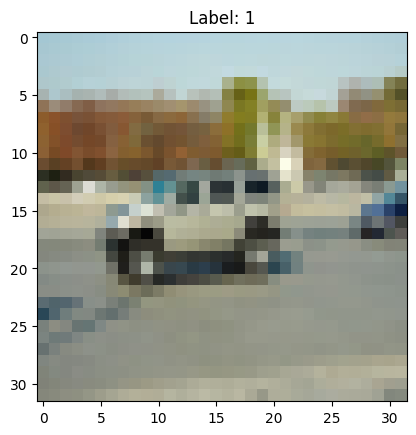

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


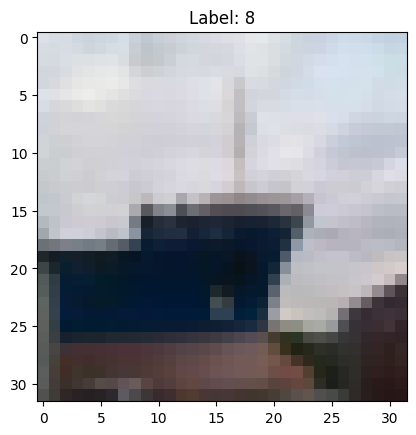

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


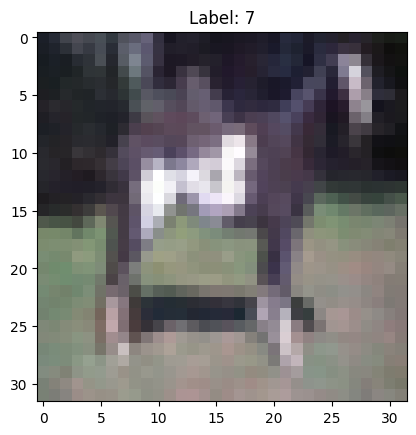

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


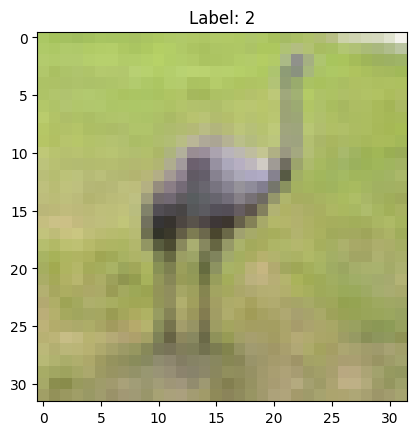

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


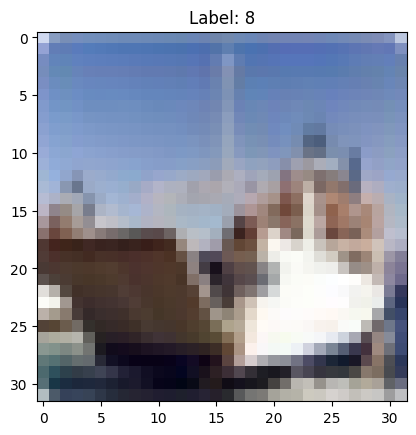

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


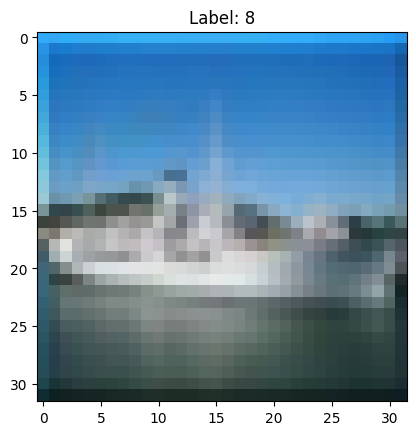

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


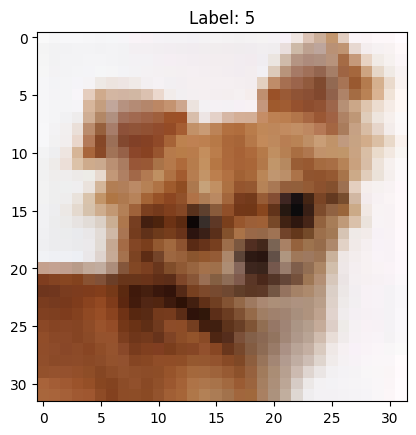

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


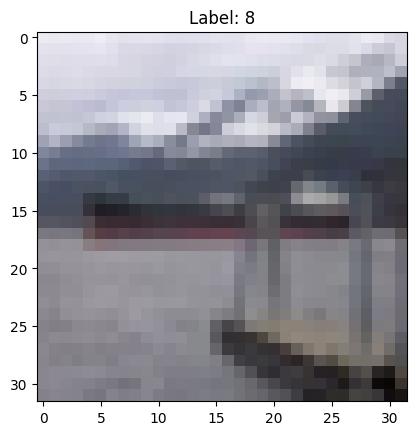

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


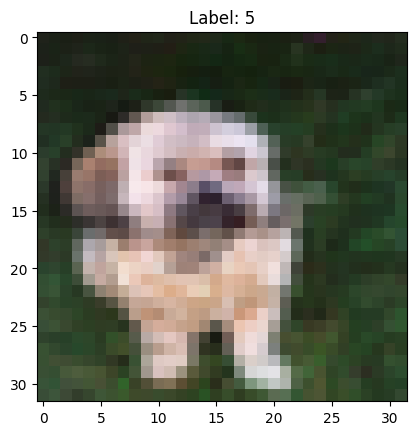

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


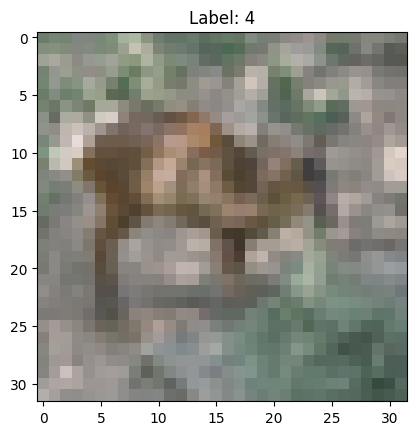

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


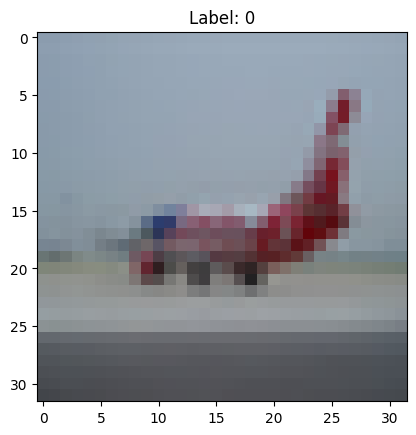

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


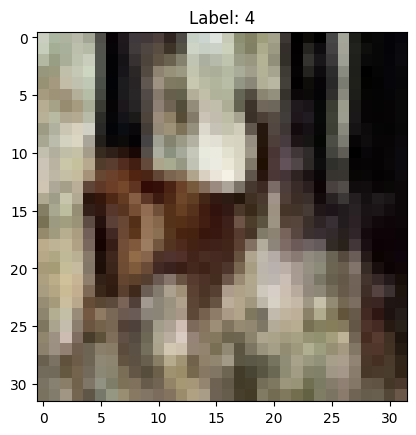

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


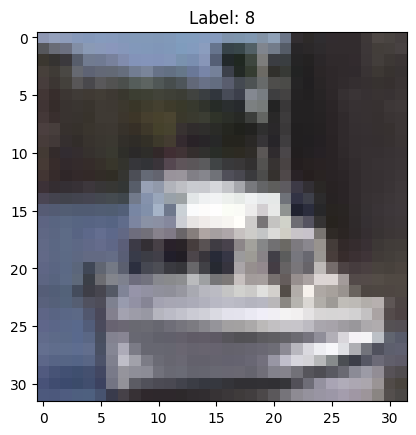

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


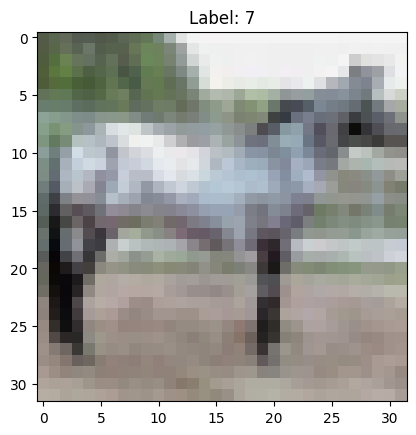

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


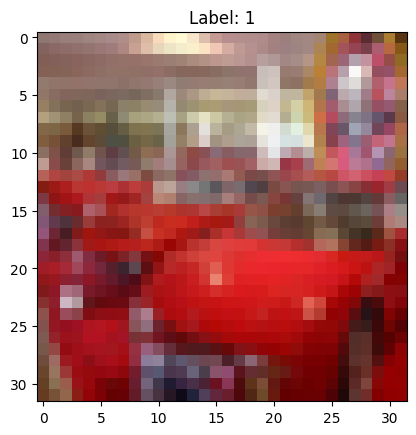

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


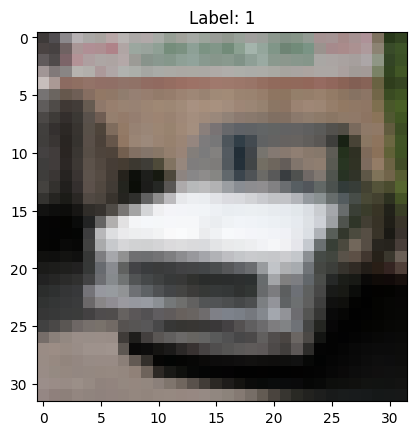

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


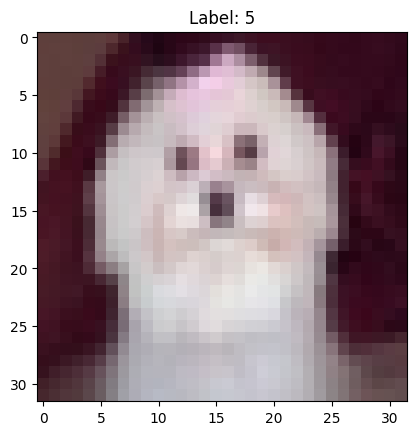

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


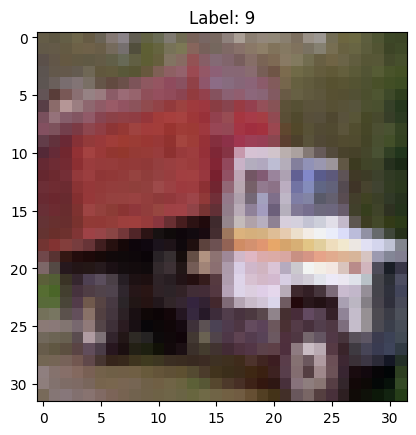

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


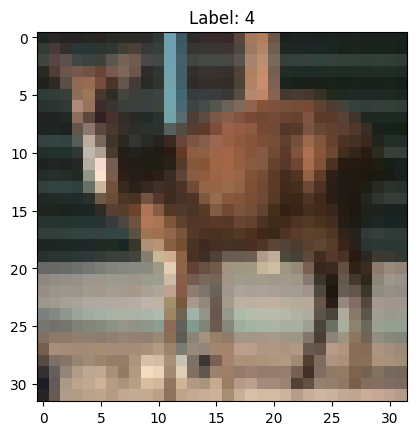

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


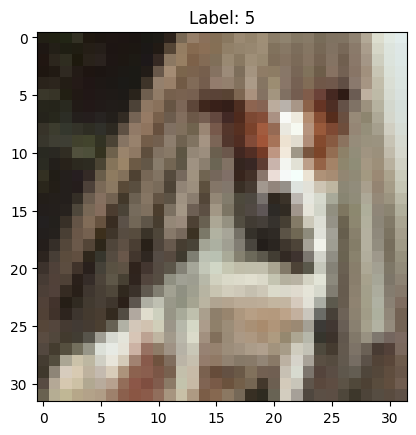

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


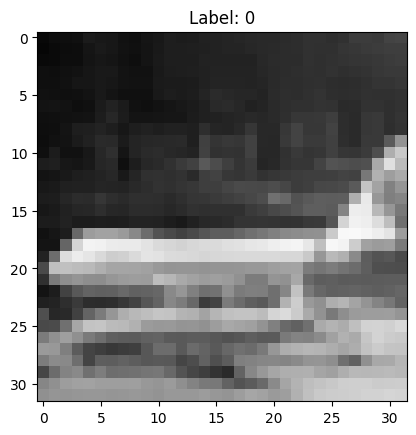

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


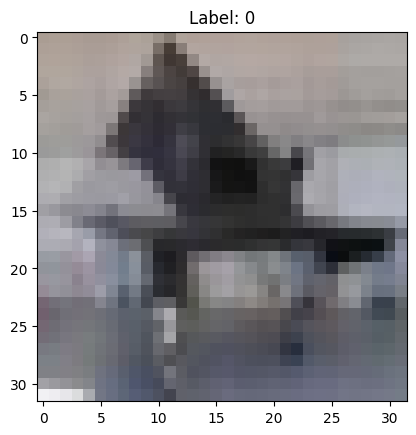

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


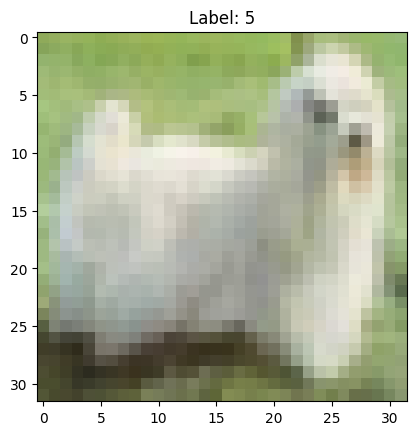

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


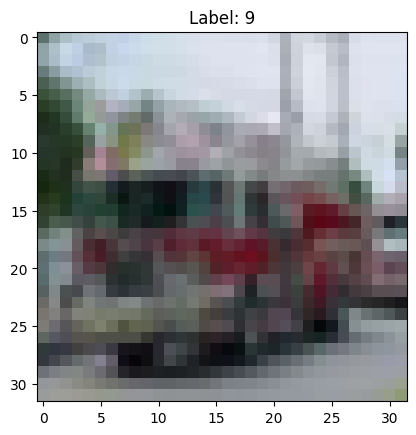

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


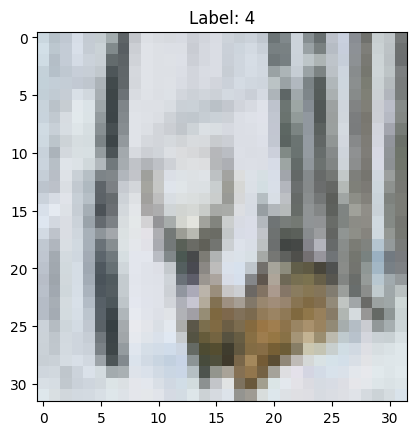

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


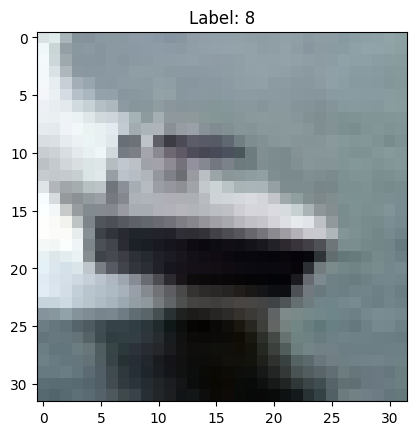

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


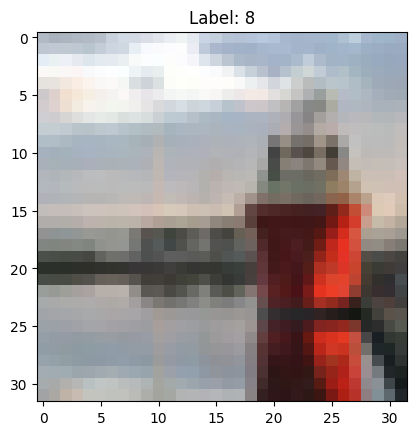

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


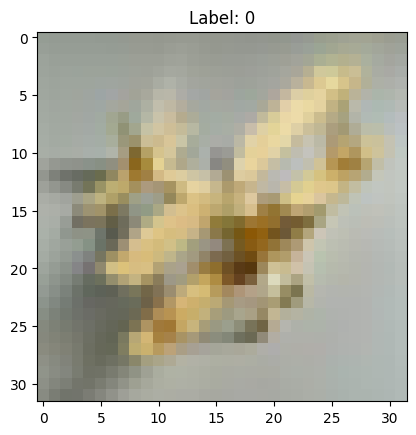

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


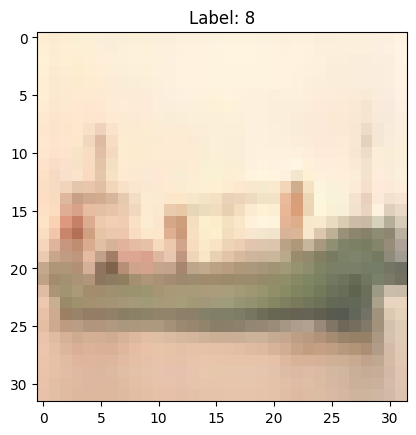

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


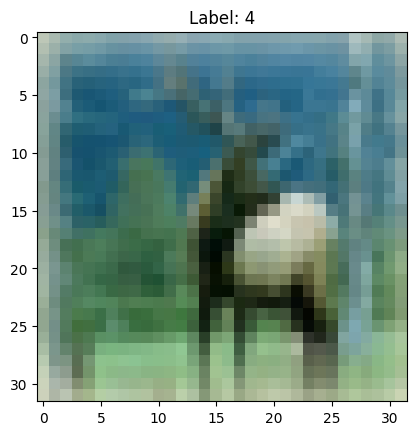

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


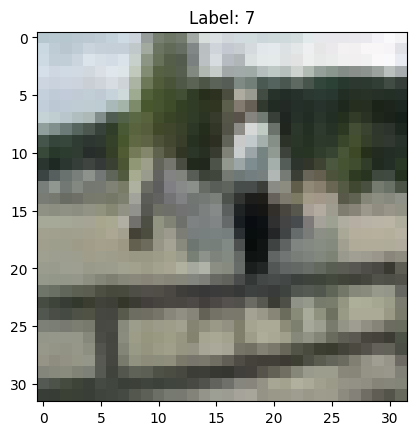

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


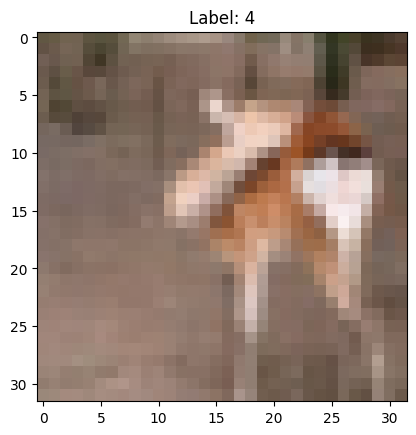

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


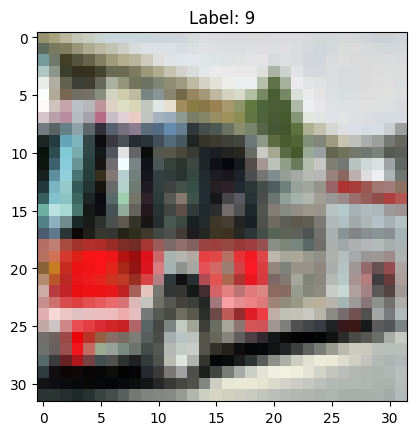

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


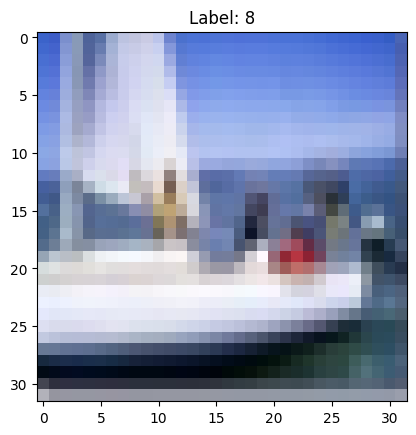

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


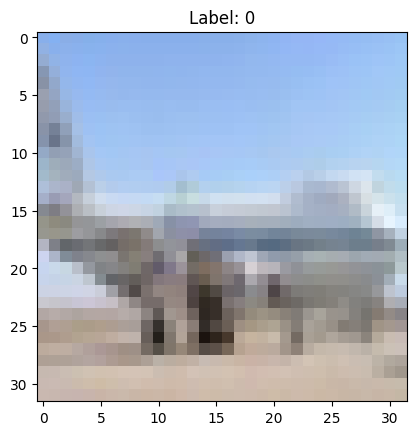

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


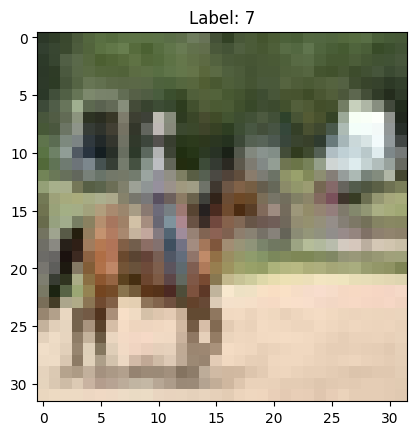

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


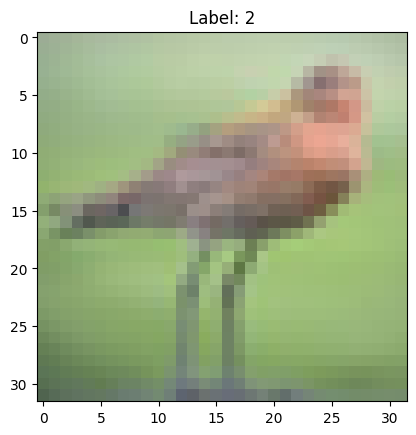

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


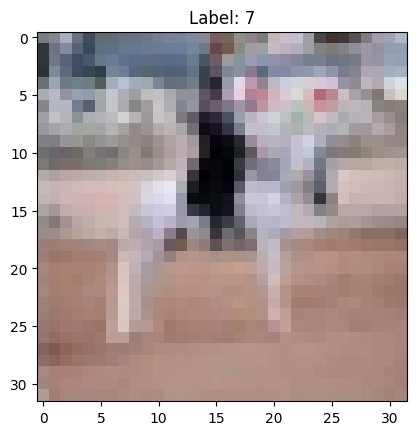

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


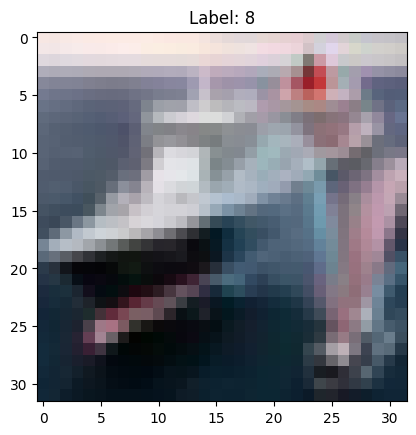

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


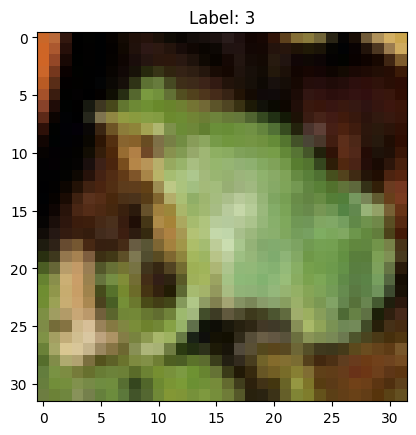

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


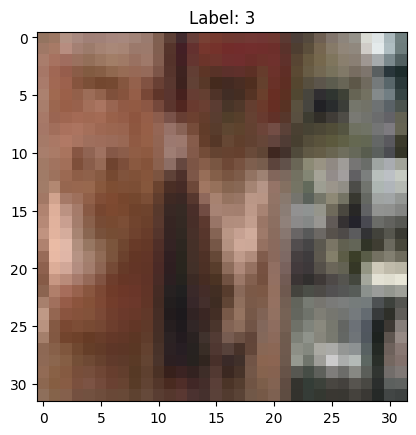

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


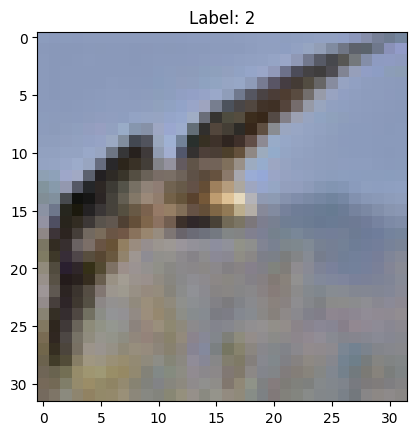

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


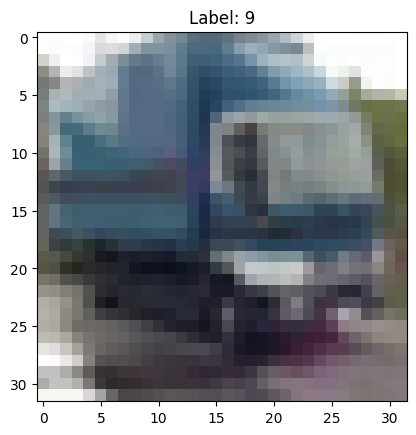

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


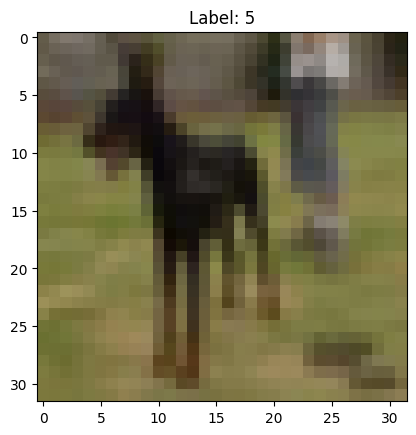

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


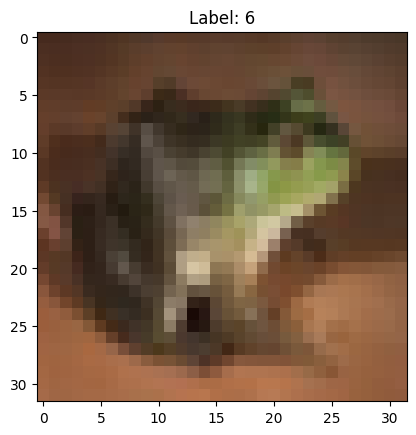

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


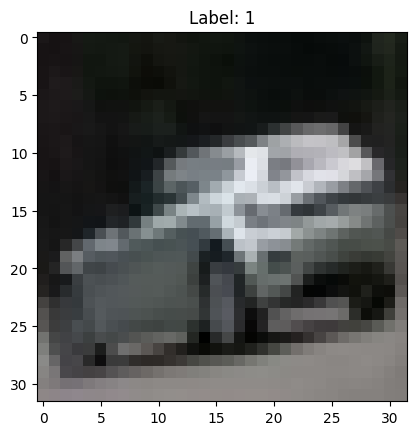

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


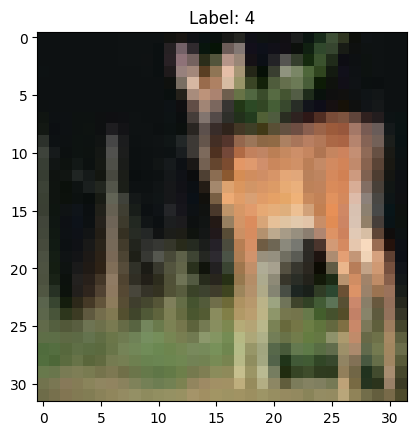

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


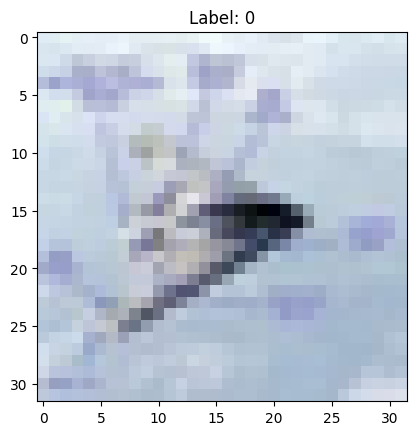

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


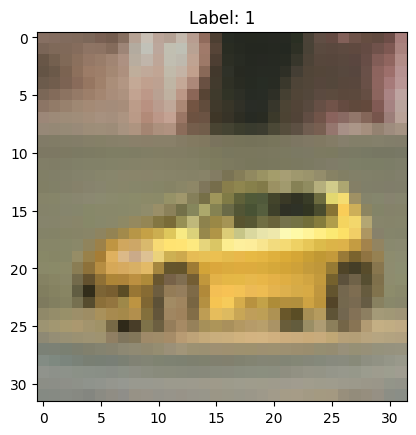

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


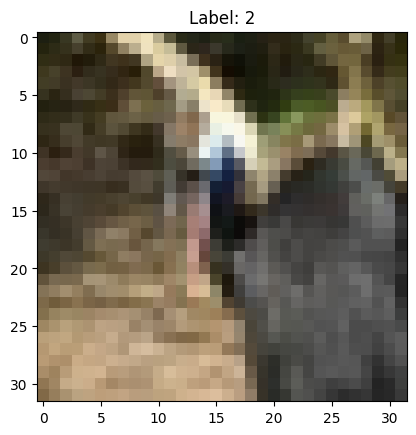

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


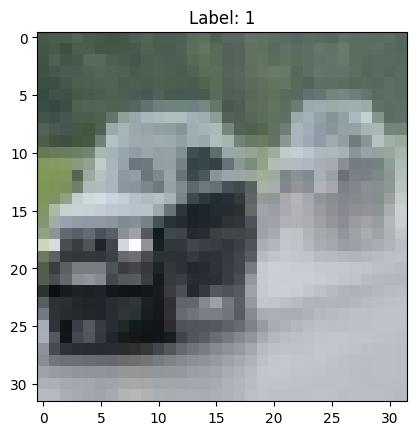

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


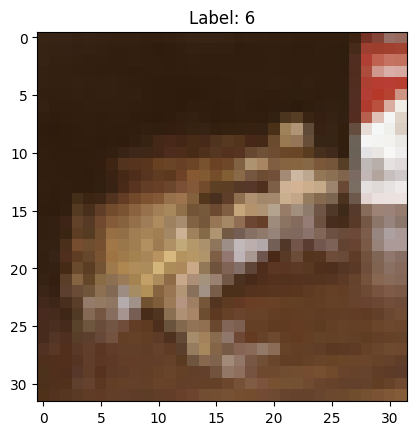

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


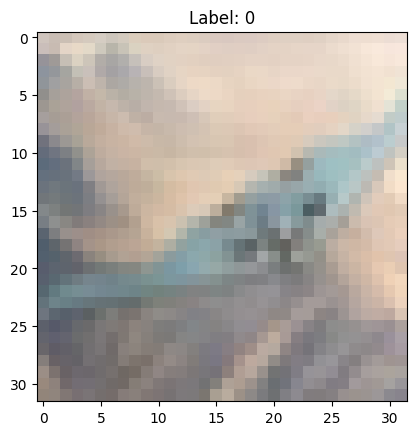

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


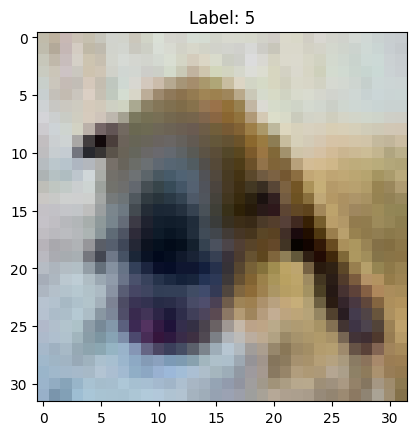

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


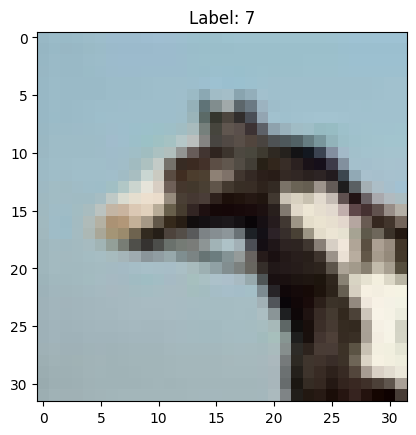

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


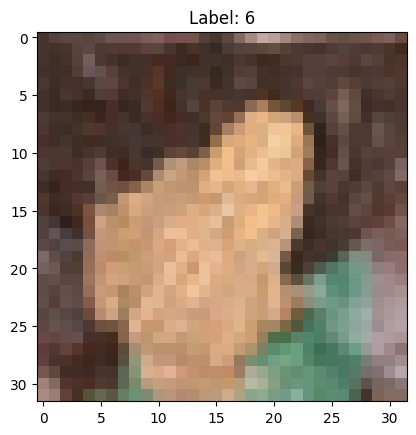

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


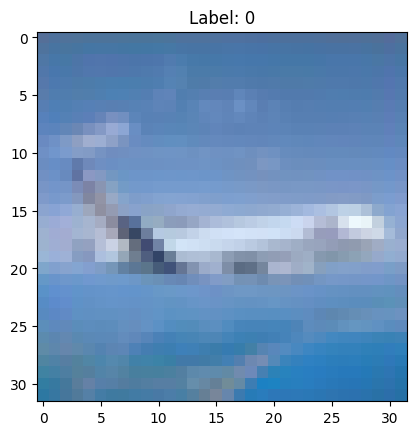

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


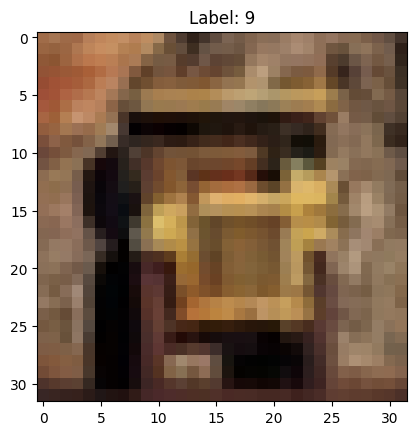

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


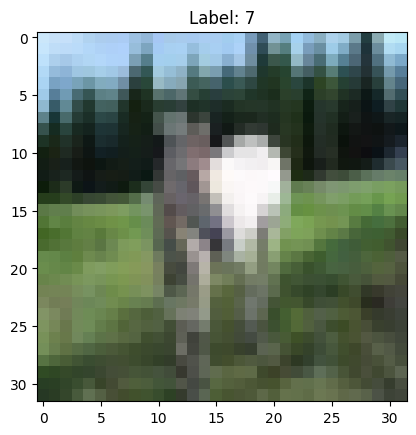

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


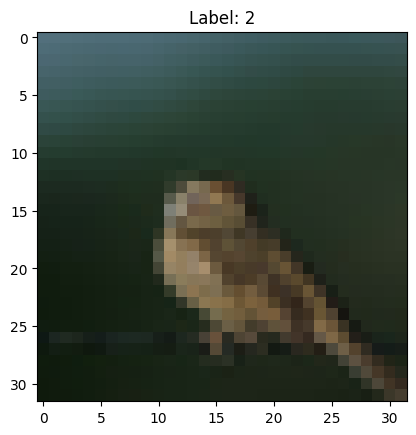

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


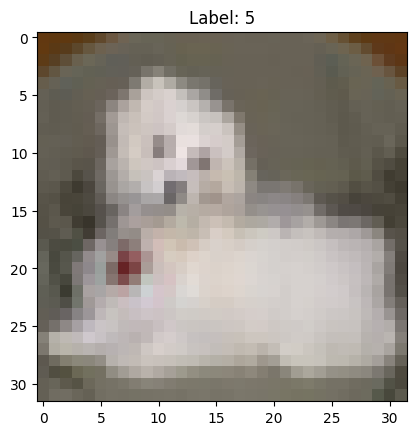

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


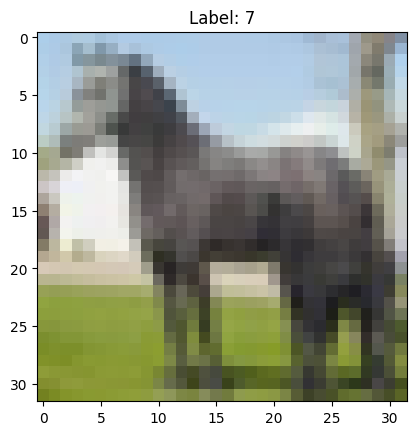

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


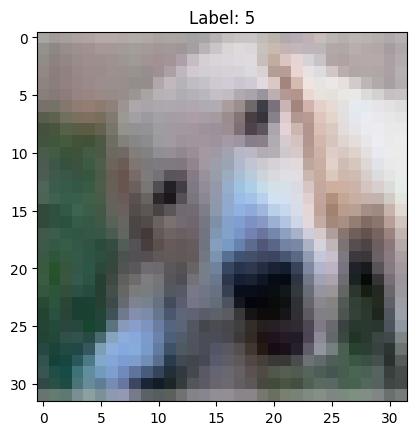

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


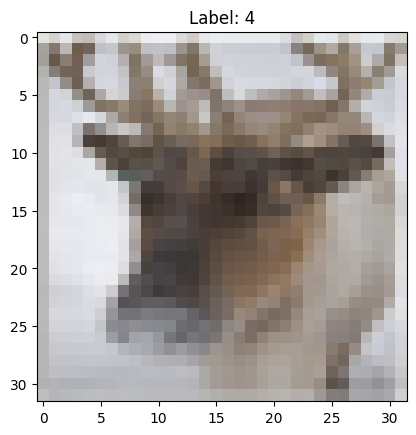

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


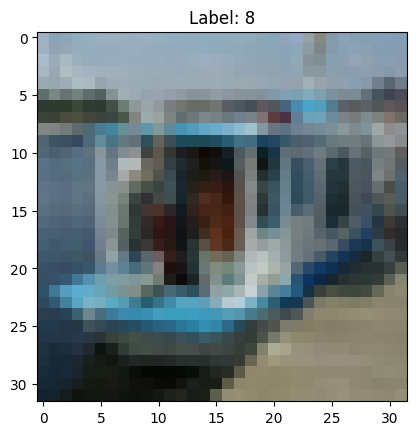

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


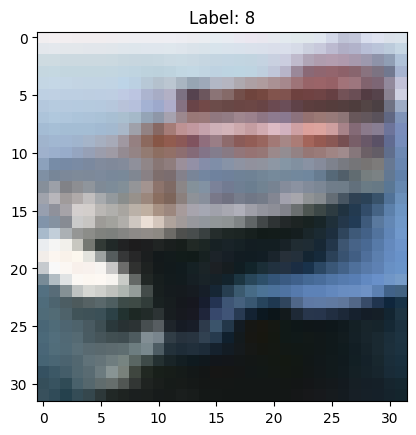

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


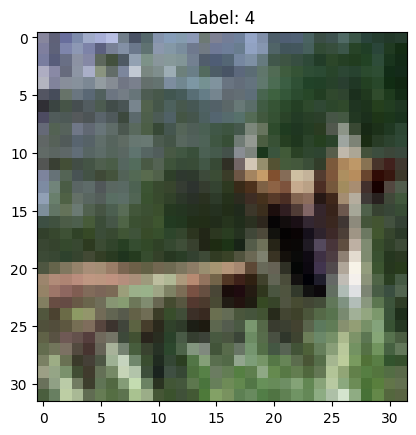

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


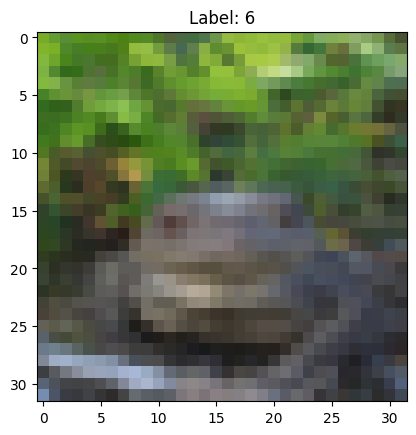

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


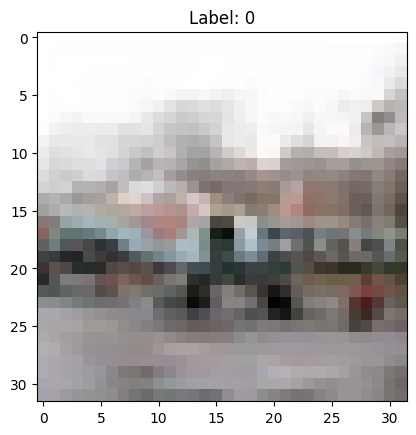

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


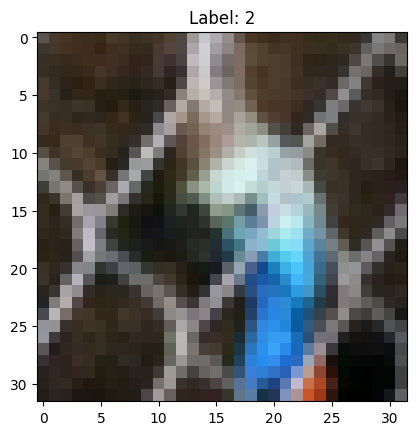

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


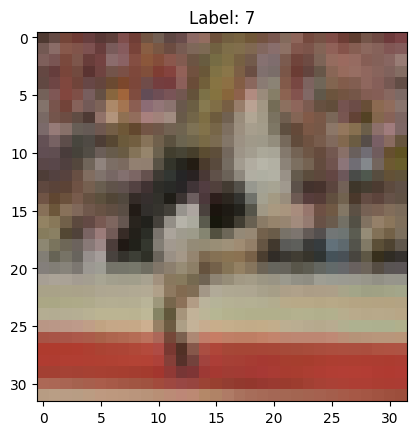

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


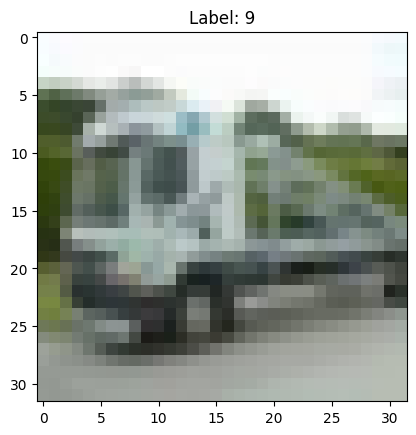

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


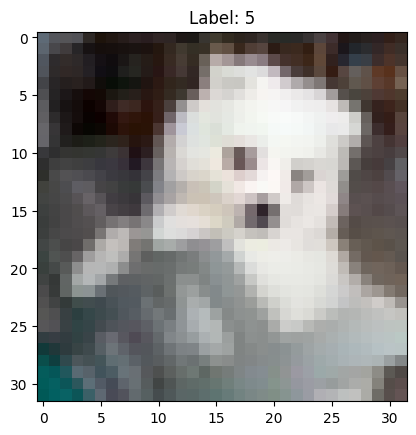

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


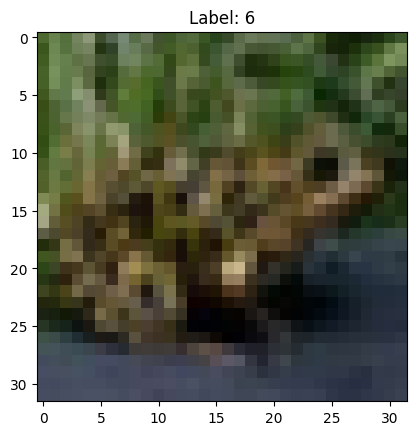

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


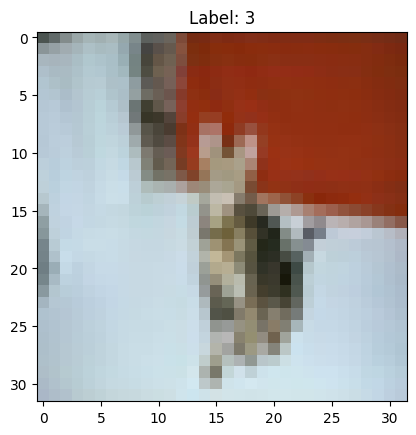

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


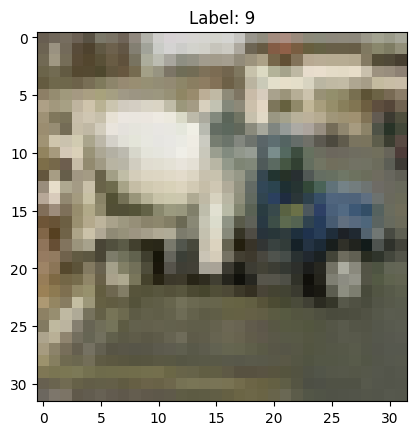

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


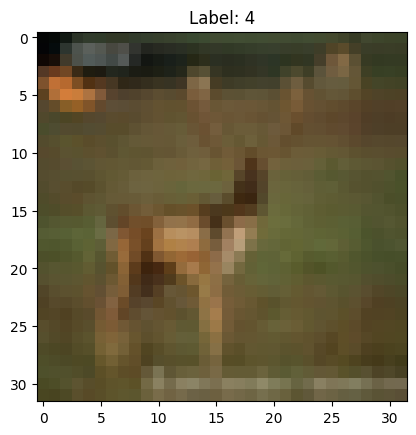

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


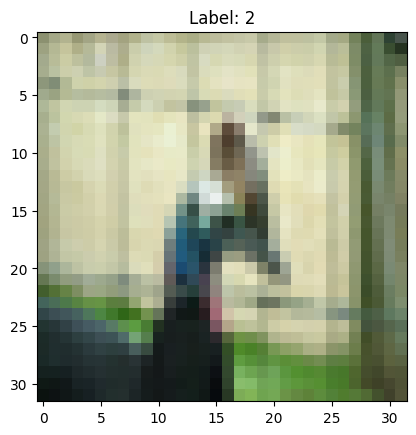

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


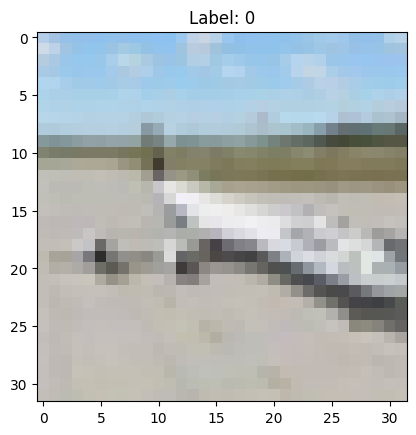

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


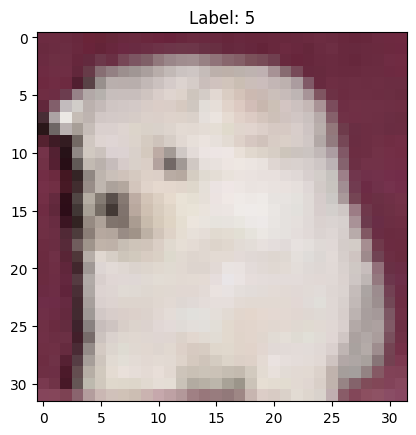

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


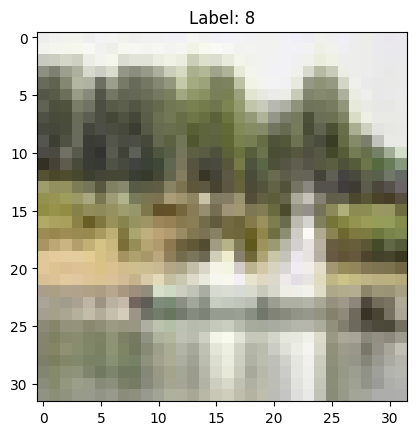

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


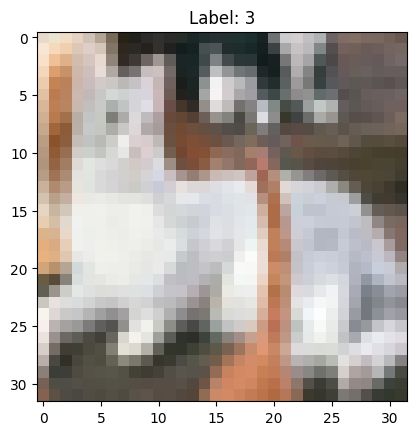

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


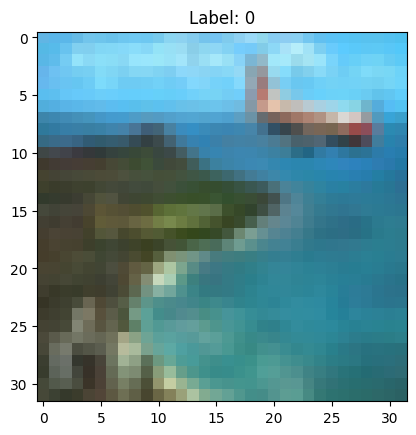

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


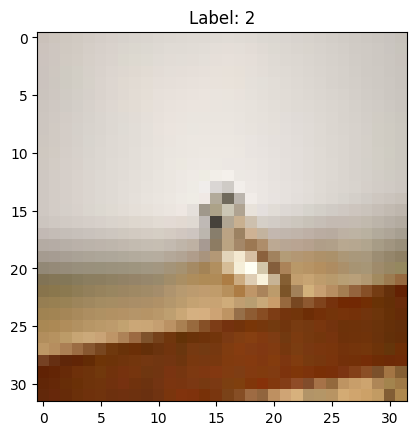

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


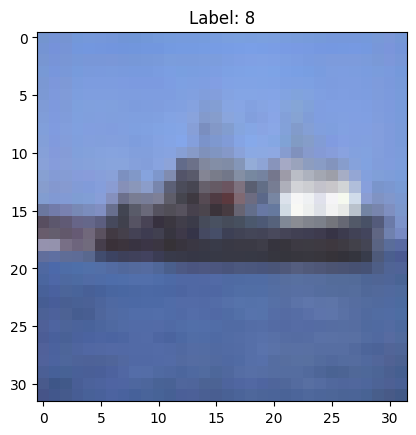

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


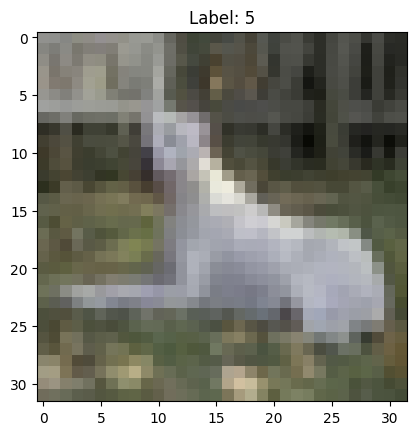

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


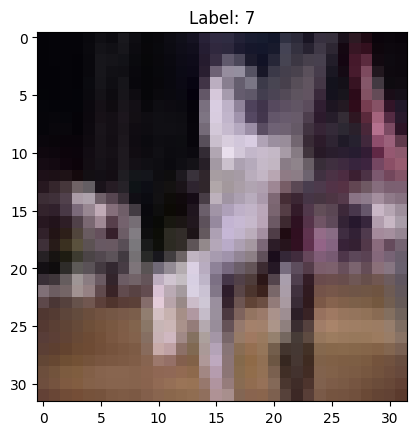

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


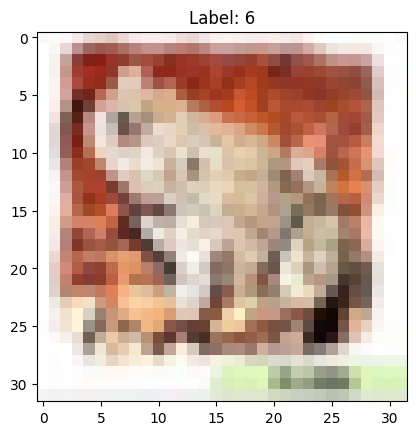

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


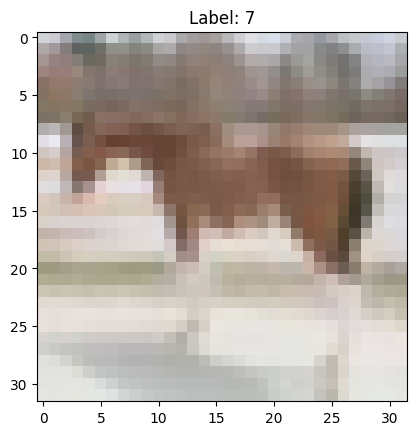

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


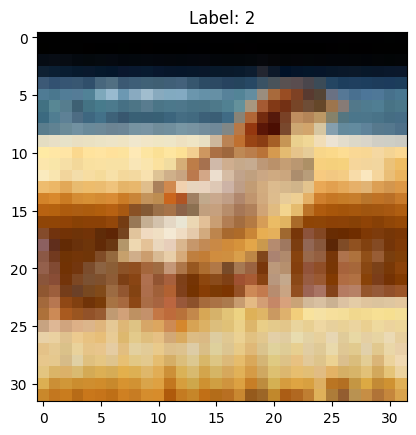

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


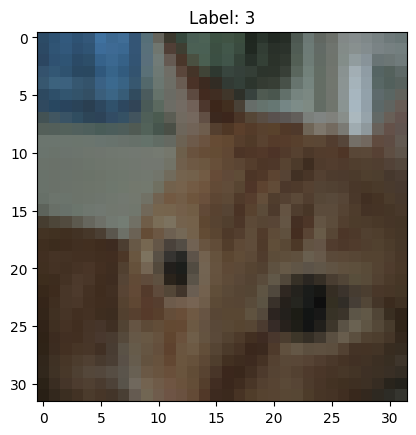

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


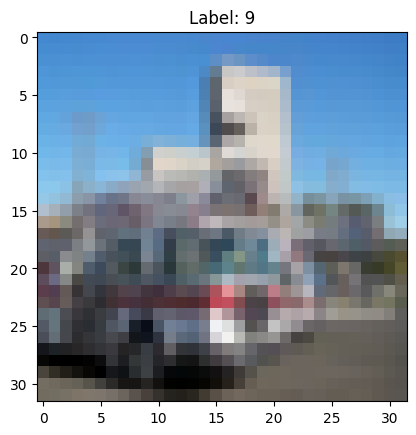

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


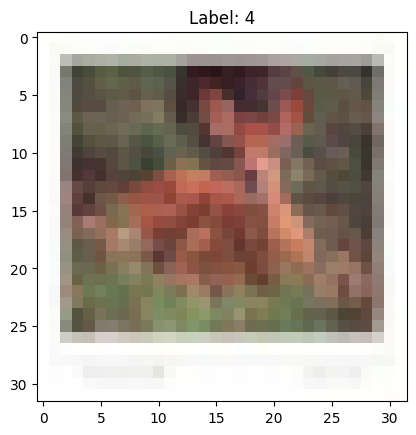

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


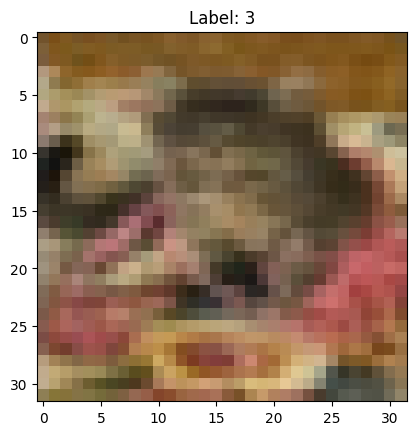

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


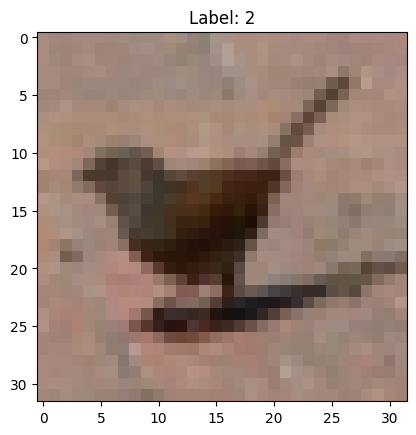

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


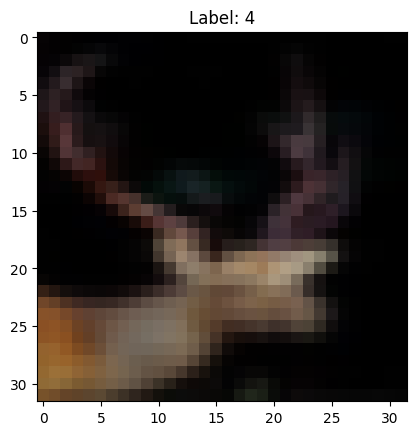

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


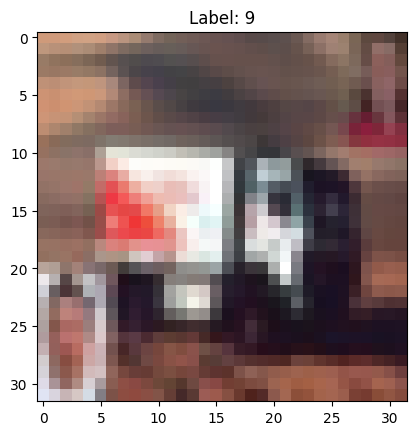

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


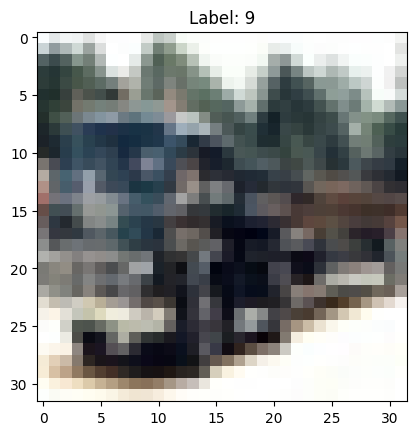

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


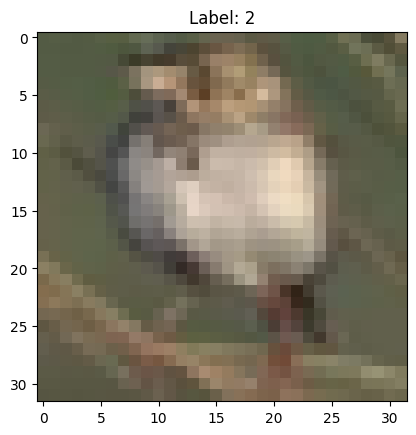

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


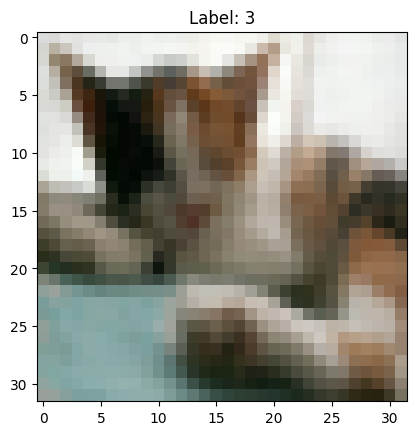

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Result:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


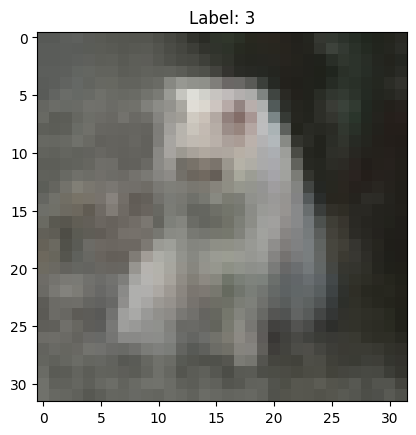

KeyboardInterrupt: 

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Initialize variables for accuracy calculation
total_images = 0
correct_predictions = 0

image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(32, 32),
    batch_size=1  # Batch size of 1 to load one image at a time
)

# Iterate over the dataset and display images
for images, labels in image_dataset:
    img_array = images[0].numpy()  # Convert to numpy array
    plt.imshow(img_array.astype("uint8"))  # Convert back to image
    plt.title("Label: {}".format(labels[0].numpy()))
    plt.show()

    # Prepare image array for prediction
    result = model.predict(images)
    predicted_label = tf.argmax(result, axis=1).numpy()[0]  # Get the predicted label
    true_label = labels[0].numpy()  # Get the true label
    print("Predicted Label: ", predicted_label)
    print("True Label: ", true_label)
    if predicted_label == true_label:
        correct_predictions += 1  # Increment correct predictions
    total_images += 1  # Increment total images

# Calculate accuracy
accuracy = (correct_predictions / total_images) * 100
print("Accuracy: {:.2f}%".format(accuracy))
